# IMPORT LIBRARIES

In [125]:
!pip3 install --upgrade tensorflow-gpu




Requirement already up-to-date: tensorflow-gpu in /home/purva/anaconda3/lib/python3.7/site-packages (1.14.0)


In [126]:
!pip install tensorflow

In [127]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1',
 '/job:localhost/replica:0/task:0/device:GPU:2',
 '/job:localhost/replica:0/task:0/device:GPU:3']

In [128]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import cv2
import tensorflow as tf

sess = tf.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))


os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12266007007648602930
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11162347151096292407
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1922611578701548593
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 598475121801136936
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:2"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2928902667095340891
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:3"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 18442391983692252124
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type:

In [129]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas
import os
import warnings
import numpy as np
import keras.backend as K
from keras.engine.topology import InputSpec
from keras.engine.topology import Layer

import sklearn.utils
from copy import deepcopy
from PIL import Image
from bs4 import BeautifulSoup
import time
import csv
import random
import sys
import pickle
from tqdm import tqdm, trange
from keras.optimizers import Adam, SGD

from keras.layers import Input, Lambda, Activation,SeparableConv2D, Conv2D, MaxPooling2D, ZeroPadding2D, Reshape, Concatenate
from keras.layers import Dropout,BatchNormalization,GaussianDropout,Flatten
from keras.models import Sequential, Model

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TerminateOnNaN, CSVLogger
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras.models import load_model
from math import ceil

from keras.layers import Activation
from keras.layers import Conv2D,SeparableConv2D
from keras.layers import Dropout,BatchNormalization
from keras.layers import AlphaDropout,GaussianDropout
from keras.layers import Flatten
from keras.layers import Input
from keras.layers import Activation
from keras.layers.merge import concatenate
from keras.layers import Reshape

from keras.applications import MobileNet

# DATA

In [130]:
cd /home/purva/Desktop/purva/Single_shot_detector

/home/purva/Desktop/purva/Single_shot_detector


In [131]:
#IMAGES DIRECTORY
VOC_2007_images_dir      = "./VOC2007/JPEGImages/"
VOC_2007_test_images_dir = './VOC2007_Test/JPEGImages/'
VOC_2012_images_dir      = './VOC2012/JPEGImages/'

In [132]:
#ANNOTATIONS DIRECTORY
VOC_2007_annotations_dir      = './VOC2007/Annotations/'
VOC_2007_test_annotations_dir = './VOC2007_Test/Annotations/'
VOC_2012_annotations_dir      = './VOC2012/Annotations/'



In [133]:


#IMAGESET DIRECTORIES
VOC_2007_train_image_set_filename    = './VOC2007/ImageSets/Main/train.txt'
VOC_2012_train_image_set_filename    = './VOC2012/ImageSets/Main/train.txt'

VOC_2007_val_image_set_filename      = './VOC2007/ImageSets/Main/val.txt'
VOC_2012_val_image_set_filename      = './VOC2012/ImageSets/Main/val.txt'

VOC_2007_trainval_image_set_filename = './VOC2007/ImageSets/Main/trainval.txt'
VOC_2012_trainval_image_set_filename = './VOC2012/ImageSets/Main/trainval.txt'

VOC_2007_test_image_set_filename     = './VOC2007_Test/ImageSets/Main/test.txt'

In [134]:
# CLASSES IN PASCAL VOC DATASET
classes = ['background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat',
           'chair', 'cow', 'diningtable', 'dog',
           'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

# PARAMETERS

(asper the paper https://www.cs.unc.edu/~wliu/papers/ssd.pdf)

In [135]:
img_height = 300 
img_width = 300 
img_channels = 3
subtract_mean = [123, 117, 104] 
swap_channels = True 
n_classes = 20 
scales= [0.1, 0.2, 0.37, 0.54, 0.71, 0.88, 1.05] 
aspect_ratios = [[1.0, 2.0, 0.5],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5],
                 [1.0, 2.0, 0.5]]
two_boxes_for_ar1 = True

steps = [8, 16, 32, 64, 100, 300]
offsets = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
limit_boxes = False 
variances = [0.1, 0.1, 0.2, 0.2]
coords = 'centroids' 
normalize_coords = True

# DATASET

In [137]:
#!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
#!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
#!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

--2019-07-25 03:38:44--  http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/x-tar]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  9.81MB/s    in 3m 28s  

2019-07-25 03:42:13 (9.15 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2019-07-25 03:42:13--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/x-tar]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[========

In [138]:
def convert_coordinates(tensor, start_index, conversion, border_pixels='half'):
    if border_pixels == 'half':
        d = 0
    elif border_pixels == 'include':
        d = 1
    elif border_pixels == 'exclude':
        d = -1

    ind = start_index
    tensor1 = np.copy(tensor).astype(np.float)
    if conversion == 'minmax2centroids':
        tensor1[..., ind] = (tensor[..., ind] + tensor[..., ind+1]) / 2.0 # Set cx
        tensor1[..., ind+1] = (tensor[..., ind+2] + tensor[..., ind+3]) / 2.0 # Set cy
        tensor1[..., ind+2] = tensor[..., ind+1] - tensor[..., ind] + d # Set w
        tensor1[..., ind+3] = tensor[..., ind+3] - tensor[..., ind+2] + d # Set h
    elif conversion == 'centroids2minmax':
        tensor1[..., ind] = tensor[..., ind] - tensor[..., ind+2] / 2.0 # Set xmin
        tensor1[..., ind+1] = tensor[..., ind] + tensor[..., ind+2] / 2.0 # Set xmax
        tensor1[..., ind+2] = tensor[..., ind+1] - tensor[..., ind+3] / 2.0 # Set ymin
        tensor1[..., ind+3] = tensor[..., ind+1] + tensor[..., ind+3] / 2.0 # Set ymax
    elif conversion == 'corners2centroids':
        tensor1[..., ind] = (tensor[..., ind] + tensor[..., ind+2]) / 2.0 # Set cx
        tensor1[..., ind+1] = (tensor[..., ind+1] + tensor[..., ind+3]) / 2.0 # Set cy
        tensor1[..., ind+2] = tensor[..., ind+2] - tensor[..., ind] + d # Set w
        tensor1[..., ind+3] = tensor[..., ind+3] - tensor[..., ind+1] + d # Set h
    elif conversion == 'centroids2corners':
        tensor1[..., ind] = tensor[..., ind] - tensor[..., ind+2] / 2.0 # Set xmin
        tensor1[..., ind+1] = tensor[..., ind+1] - tensor[..., ind+3] / 2.0 # Set ymin
        tensor1[..., ind+2] = tensor[..., ind] + tensor[..., ind+2] / 2.0 # Set xmax
        tensor1[..., ind+3] = tensor[..., ind+1] + tensor[..., ind+3] / 2.0 # Set ymax
    elif (conversion == 'minmax2corners') or (conversion == 'corners2minmax'):
        tensor1[..., ind+1] = tensor[..., ind+2]
        tensor1[..., ind+2] = tensor[..., ind+1]
    else:
        raise ValueError("Unexpected conversion value. Supported values are 'minmax2centroids', 'centroids2minmax', 'corners2centroids', 'centroids2corners', 'minmax2corners', and 'corners2minmax'.")

    return tensor1

In [139]:
def convert_coordinates2(tensor, start_index, conversion):
    
    ind = start_index
    tensor1 = np.copy(tensor).astype(np.float)
    if conversion == 'minmax2centroids':
        M = np.array([[0.5, 0. , -1.,  0.],
                      [0.5, 0. ,  1.,  0.],
                      [0. , 0.5,  0., -1.],
                      [0. , 0.5,  0.,  1.]])
        tensor1[..., ind:ind+4] = np.dot(tensor1[..., ind:ind+4], M)
    elif conversion == 'centroids2minmax':
        M = np.array([[ 1. , 1. ,  0. , 0. ],
                      [ 0. , 0. ,  1. , 1. ],
                      [-0.5, 0.5,  0. , 0. ],
                      [ 0. , 0. , -0.5, 0.5]]) # The multiplicative inverse of the matrix above
        tensor1[..., ind:ind+4] = np.dot(tensor1[..., ind:ind+4], M)
    else:
        raise ValueError("Unexpected conversion value. Supported values are 'minmax2centroids' and 'centroids2minmax'.")

    return tensor1


In [140]:
def intersection_area(boxes1, boxes2, coords='centroids', mode='outer_product', border_pixels='half'):
    
    # Make sure the boxes have the right shapes.
    if boxes1.ndim > 2: raise ValueError("boxes1 must have rank either 1 or 2, but has rank {}.".format(boxes1.ndim))
    if boxes2.ndim > 2: raise ValueError("boxes2 must have rank either 1 or 2, but has rank {}.".format(boxes2.ndim))

    if boxes1.ndim == 1: boxes1 = np.expand_dims(boxes1, axis=0)
    if boxes2.ndim == 1: boxes2 = np.expand_dims(boxes2, axis=0)

    if not (boxes1.shape[1] == boxes2.shape[1] == 4): raise ValueError("All boxes must consist of 4 coordinates, but the boxes in `boxes1` and `boxes2` have {} and {} coordinates, respectively.".format(boxes1.shape[1], boxes2.shape[1]))
    if not mode in {'outer_product', 'element-wise'}: raise ValueError("`mode` must be one of 'outer_product' and 'element-wise', but got '{}'.",format(mode))

    # Convert the coordinates if necessary.
    if coords == 'centroids':
        boxes1 = convert_coordinates(boxes1, start_index=0, conversion='centroids2corners')
        boxes2 = convert_coordinates(boxes2, start_index=0, conversion='centroids2corners')
        coords = 'corners'
    elif not (coords in {'minmax', 'corners'}):
        raise ValueError("Unexpected value for `coords`. Supported values are 'minmax', 'corners' and 'centroids'.")

    m = boxes1.shape[0] # The number of boxes in `boxes1`
    n = boxes2.shape[0] # The number of boxes in `boxes2`

    # Set the correct coordinate indices for the respective formats.
    if coords == 'corners':
        xmin = 0
        ymin = 1
        xmax = 2
        ymax = 3
    elif coords == 'minmax':
        xmin = 0
        xmax = 1
        ymin = 2
        ymax = 3

    if border_pixels == 'half':
        d = 0
    elif border_pixels == 'include':
        d = 1 # If border pixels are supposed to belong to the bounding boxes, we have to add one pixel to any difference `xmax - xmin` or `ymax - ymin`.
    elif border_pixels == 'exclude':
        d = -1 # If border pixels are not supposed to belong to the bounding boxes, we have to subtract one pixel from any difference `xmax - xmin` or `ymax - ymin`.

    # Compute the intersection areas.

    if mode == 'outer_product':

        # For all possible box combinations, get the greater xmin and ymin values.
        # This is a tensor of shape (m,n,2).
        min_xy = np.maximum(np.tile(np.expand_dims(boxes1[:,[xmin,ymin]], axis=1), reps=(1, n, 1)),
                            np.tile(np.expand_dims(boxes2[:,[xmin,ymin]], axis=0), reps=(m, 1, 1)))

        # For all possible box combinations, get the smaller xmax and ymax values.
        # This is a tensor of shape (m,n,2).
        max_xy = np.minimum(np.tile(np.expand_dims(boxes1[:,[xmax,ymax]], axis=1), reps=(1, n, 1)),
                            np.tile(np.expand_dims(boxes2[:,[xmax,ymax]], axis=0), reps=(m, 1, 1)))

        # Compute the side lengths of the intersection rectangles.
        side_lengths = np.maximum(0, max_xy - min_xy + d)

        return side_lengths[:,:,0] * side_lengths[:,:,1]

    elif mode == 'element-wise':

        min_xy = np.maximum(boxes1[:,[xmin,ymin]], boxes2[:,[xmin,ymin]])
        max_xy = np.minimum(boxes1[:,[xmax,ymax]], boxes2[:,[xmax,ymax]])

        # Compute the side lengths of the intersection rectangles.
        side_lengths = np.maximum(0, max_xy - min_xy + d)

        return side_lengths[:,0] * side_lengths[:,1]


In [141]:
def intersection_area_(boxes1, boxes2, coords='corners', mode='outer_product', border_pixels='half'):
    '''
    The same as 'intersection_area()' but for internal use, i.e. without all the safety checks.
    '''

    m = boxes1.shape[0] # The number of boxes in `boxes1`
    n = boxes2.shape[0] # The number of boxes in `boxes2`

    # Set the correct coordinate indices for the respective formats.
    if coords == 'corners':
        xmin = 0
        ymin = 1
        xmax = 2
        ymax = 3
    elif coords == 'minmax':
        xmin = 0
        xmax = 1
        ymin = 2
        ymax = 3

    if border_pixels == 'half':
        d = 0
    elif border_pixels == 'include':
        d = 1 # If border pixels are supposed to belong to the bounding boxes, we have to add one pixel to any difference `xmax - xmin` or `ymax - ymin`.
    elif border_pixels == 'exclude':
        d = -1 # If border pixels are not supposed to belong to the bounding boxes, we have to subtract one pixel from any difference `xmax - xmin` or `ymax - ymin`.

    # Compute the intersection areas.

    if mode == 'outer_product':

        # For all possible box combinations, get the greater xmin and ymin values.
        # This is a tensor of shape (m,n,2).
        min_xy = np.maximum(np.tile(np.expand_dims(boxes1[:,[xmin,ymin]], axis=1), reps=(1, n, 1)),
                            np.tile(np.expand_dims(boxes2[:,[xmin,ymin]], axis=0), reps=(m, 1, 1)))

        # For all possible box combinations, get the smaller xmax and ymax values.
        # This is a tensor of shape (m,n,2).
        max_xy = np.minimum(np.tile(np.expand_dims(boxes1[:,[xmax,ymax]], axis=1), reps=(1, n, 1)),
                            np.tile(np.expand_dims(boxes2[:,[xmax,ymax]], axis=0), reps=(m, 1, 1)))

        # Compute the side lengths of the intersection rectangles.
        side_lengths = np.maximum(0, max_xy - min_xy + d)

        return side_lengths[:,:,0] * side_lengths[:,:,1]

    elif mode == 'element-wise':

        min_xy = np.maximum(boxes1[:,[xmin,ymin]], boxes2[:,[xmin,ymin]])
        max_xy = np.minimum(boxes1[:,[xmax,ymax]], boxes2[:,[xmax,ymax]])

        # Compute the side lengths of the intersection rectangles.
        side_lengths = np.maximum(0, max_xy - min_xy + d)

        return side_lengths[:,0] * side_lengths[:,1]



In [142]:
def iou(boxes1, boxes2, coords='centroids', mode='outer_product', border_pixels='half'):
    
    # Make sure the boxes have the right shapes.
    if boxes1.ndim > 2: raise ValueError("boxes1 must have rank either 1 or 2, but has rank {}.".format(boxes1.ndim))
    if boxes2.ndim > 2: raise ValueError("boxes2 must have rank either 1 or 2, but has rank {}.".format(boxes2.ndim))

    if boxes1.ndim == 1: boxes1 = np.expand_dims(boxes1, axis=0)
    if boxes2.ndim == 1: boxes2 = np.expand_dims(boxes2, axis=0)

    if not (boxes1.shape[1] == boxes2.shape[1] == 4): raise ValueError("All boxes must consist of 4 coordinates, but the boxes in `boxes1` and `boxes2` have {} and {} coordinates, respectively.".format(boxes1.shape[1], boxes2.shape[1]))
    if not mode in {'outer_product', 'element-wise'}: raise ValueError("`mode` must be one of 'outer_product' and 'element-wise', but got '{}'.".format(mode))

    # Convert the coordinates if necessary.
    if coords == 'centroids':
        boxes1 = convert_coordinates(boxes1, start_index=0, conversion='centroids2corners')
        boxes2 = convert_coordinates(boxes2, start_index=0, conversion='centroids2corners')
        coords = 'corners'
    elif not (coords in {'minmax', 'corners'}):
        raise ValueError("Unexpected value for `coords`. Supported values are 'minmax', 'corners' and 'centroids'.")

    # Compute the IoU.

    # Compute the interesection areas.

    intersection_areas = intersection_area_(boxes1, boxes2, coords=coords, mode=mode)

    m = boxes1.shape[0] # The number of boxes in `boxes1`
    n = boxes2.shape[0] # The number of boxes in `boxes2`

    # Compute the union areas.

    # Set the correct coordinate indices for the respective formats.
    if coords == 'corners':
        xmin = 0
        ymin = 1
        xmax = 2
        ymax = 3
    elif coords == 'minmax':
        xmin = 0
        xmax = 1
        ymin = 2
        ymax = 3

    if border_pixels == 'half':
        d = 0
    elif border_pixels == 'include':
        d = 1 # If border pixels are supposed to belong to the bounding boxes, we have to add one pixel to any difference `xmax - xmin` or `ymax - ymin`.
    elif border_pixels == 'exclude':
        d = -1 # If border pixels are not supposed to belong to the bounding boxes, we have to subtract one pixel from any difference `xmax - xmin` or `ymax - ymin`.

    if mode == 'outer_product':

        boxes1_areas = np.tile(np.expand_dims((boxes1[:,xmax] - boxes1[:,xmin] + d) * (boxes1[:,ymax] - boxes1[:,ymin] + d), axis=1), reps=(1,n))
        boxes2_areas = np.tile(np.expand_dims((boxes2[:,xmax] - boxes2[:,xmin] + d) * (boxes2[:,ymax] - boxes2[:,ymin] + d), axis=0), reps=(m,1))

    elif mode == 'element-wise':

        boxes1_areas = (boxes1[:,xmax] - boxes1[:,xmin] + d) * (boxes1[:,ymax] - boxes1[:,ymin] + d)
        boxes2_areas = (boxes2[:,xmax] - boxes2[:,xmin] + d) * (boxes2[:,ymax] - boxes2[:,ymin] + d)

    union_areas = boxes1_areas + boxes2_areas - intersection_areas

    return intersection_areas / union_areas


# LAYERS

In [143]:
class L2Normalization(Layer):
    
    def __init__(self, gamma_init=20, **kwargs):
        if K.image_dim_ordering() == 'tf':
            self.axis = 3
        else:
            self.axis = 1
        self.gamma_init = gamma_init
        super(L2Normalization, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_spec = [InputSpec(shape=input_shape)]
        gamma = self.gamma_init * np.ones((input_shape[self.axis],))
        self.gamma = K.variable(gamma, name='{}_gamma'.format(self.name))
        self.trainable_weights = [self.gamma]
        super(L2Normalization, self).build(input_shape)

    def call(self, x, mask=None):
        output = K.l2_normalize(x, self.axis)
        return output * self.gamma

    def get_config(self):
        config = {
            'gamma_init': self.gamma_init
        }
        base_config = super(L2Normalization, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [144]:
class AnchorBoxes(Layer):
    

    def __init__(self,
                 img_height,
                 img_width,
                 this_scale,
                 next_scale,
                 aspect_ratios=[0.5, 1.0, 2.0],
                 two_boxes_for_ar1=True,
                 this_steps=None,
                 this_offsets=None,
                 clip_boxes=False,
                 variances=[0.1, 0.1, 0.2, 0.2],
                 coords='centroids',
                 normalize_coords=False,
                 **kwargs):
        
        if K.backend() != 'tensorflow':
            raise TypeError("This layer only supports TensorFlow at the moment, but you are using the {} backend.".format(K.backend()))

        if (this_scale < 0) or (next_scale < 0) or (this_scale > 1):
            raise ValueError("`this_scale` must be in [0, 1] and `next_scale` must be >0, but `this_scale` == {}, `next_scale` == {}".format(this_scale, next_scale))

        if len(variances) != 4:
            raise ValueError("4 variance values must be pased, but {} values were received.".format(len(variances)))
        variances = np.array(variances)
        if np.any(variances <= 0):
            raise ValueError("All variances must be >0, but the variances given are {}".format(variances))

        self.img_height = img_height
        self.img_width = img_width
        self.this_scale = this_scale
        self.next_scale = next_scale
        self.aspect_ratios = aspect_ratios
        self.two_boxes_for_ar1 = two_boxes_for_ar1
        self.this_steps = this_steps
        self.this_offsets = this_offsets
        self.clip_boxes = clip_boxes
        self.variances = variances
        self.coords = coords
        self.normalize_coords = normalize_coords
        # Compute the number of boxes per cell
        if (1 in aspect_ratios) and two_boxes_for_ar1:
            self.n_boxes = len(aspect_ratios) + 1
        else:
            self.n_boxes = len(aspect_ratios)
        super(AnchorBoxes, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_spec = [InputSpec(shape=input_shape)]
        super(AnchorBoxes, self).build(input_shape)

    def call(self, x, mask=None):
        
        # Compute box width and height for each aspect ratio
        # The shorter side of the image will be used to compute `w` and `h` using `scale` and `aspect_ratios`.
        size = min(self.img_height, self.img_width)
        # Compute the box widths and and heights for all aspect ratios
        wh_list = []
        for ar in self.aspect_ratios:
            if (ar == 1):
                # Compute the regular anchor box for aspect ratio 1.
                box_height = box_width = self.this_scale * size
                wh_list.append((box_width, box_height))
                if self.two_boxes_for_ar1:
                    # Compute one slightly larger version using the geometric mean of this scale value and the next.
                    box_height = box_width = np.sqrt(self.this_scale * self.next_scale) * size
                    wh_list.append((box_width, box_height))
            else:
                box_height = self.this_scale * size / np.sqrt(ar)
                box_width = self.this_scale * size * np.sqrt(ar)
                wh_list.append((box_width, box_height))
        wh_list = np.array(wh_list)

        # We need the shape of the input tensor
        if K.image_dim_ordering() == 'tf':
            batch_size, feature_map_height, feature_map_width, feature_map_channels = x._keras_shape
        else: # Not yet relevant since TensorFlow is the only supported backend right now, but it can't harm to have this in here for the future
            batch_size, feature_map_channels, feature_map_height, feature_map_width = x._keras_shape

        # Compute the grid of box center points. They are identical for all aspect ratios.

        # Compute the step sizes, i.e. how far apart the anchor box center points will be vertically and horizontally.
        if (self.this_steps is None):
            step_height = self.img_height / feature_map_height
            step_width = self.img_width / feature_map_width
        else:
            if isinstance(self.this_steps, (list, tuple)) and (len(self.this_steps) == 2):
                step_height = self.this_steps[0]
                step_width = self.this_steps[1]
            elif isinstance(self.this_steps, (int, float)):
                step_height = self.this_steps
                step_width = self.this_steps
        # Compute the offsets, i.e. at what pixel values the first anchor box center point will be from the top and from the left of the image.
        if (self.this_offsets is None):
            offset_height = 0.5
            offset_width = 0.5
        else:
            if isinstance(self.this_offsets, (list, tuple)) and (len(self.this_offsets) == 2):
                offset_height = self.this_offsets[0]
                offset_width = self.this_offsets[1]
            elif isinstance(self.this_offsets, (int, float)):
                offset_height = self.this_offsets
                offset_width = self.this_offsets
        # Now that we have the offsets and step sizes, compute the grid of anchor box center points.
        cy = np.linspace(offset_height * step_height, (offset_height + feature_map_height - 1) * step_height, feature_map_height)
        cx = np.linspace(offset_width * step_width, (offset_width + feature_map_width - 1) * step_width, feature_map_width)
        cx_grid, cy_grid = np.meshgrid(cx, cy)
        cx_grid = np.expand_dims(cx_grid, -1) # This is necessary for np.tile() to do what we want further down
        cy_grid = np.expand_dims(cy_grid, -1) # This is necessary for np.tile() to do what we want further down

        # Create a 4D tensor template of shape `(feature_map_height, feature_map_width, n_boxes, 4)`
        # where the last dimension will contain `(cx, cy, w, h)`
        boxes_tensor = np.zeros((feature_map_height, feature_map_width, self.n_boxes, 4))

        boxes_tensor[:, :, :, 0] = np.tile(cx_grid, (1, 1, self.n_boxes)) # Set cx
        boxes_tensor[:, :, :, 1] = np.tile(cy_grid, (1, 1, self.n_boxes)) # Set cy
        boxes_tensor[:, :, :, 2] = wh_list[:, 0] # Set w
        boxes_tensor[:, :, :, 3] = wh_list[:, 1] # Set h

        # Convert `(cx, cy, w, h)` to `(xmin, xmax, ymin, ymax)`
        boxes_tensor = convert_coordinates(boxes_tensor, start_index=0, conversion='centroids2corners')

        # If `clip_boxes` is enabled, clip the coordinates to lie within the image boundaries
        if self.clip_boxes:
            x_coords = boxes_tensor[:,:,:,[0, 2]]
            x_coords[x_coords >= self.img_width] = self.img_width - 1
            x_coords[x_coords < 0] = 0
            boxes_tensor[:,:,:,[0, 2]] = x_coords
            y_coords = boxes_tensor[:,:,:,[1, 3]]
            y_coords[y_coords >= self.img_height] = self.img_height - 1
            y_coords[y_coords < 0] = 0
            boxes_tensor[:,:,:,[1, 3]] = y_coords

        # If `normalize_coords` is enabled, normalize the coordinates to be within [0,1]
        if self.normalize_coords:
            boxes_tensor[:, :, :, [0, 2]] /= self.img_width
            boxes_tensor[:, :, :, [1, 3]] /= self.img_height

        # TODO: Implement box limiting directly for `(cx, cy, w, h)` so that we don't have to unnecessarily convert back and forth.
        if self.coords == 'centroids':
            # Convert `(xmin, ymin, xmax, ymax)` back to `(cx, cy, w, h)`.
            boxes_tensor = convert_coordinates(boxes_tensor, start_index=0, conversion='corners2centroids', border_pixels='half')
        elif self.coords == 'minmax':
            # Convert `(xmin, ymin, xmax, ymax)` to `(xmin, xmax, ymin, ymax).
            boxes_tensor = convert_coordinates(boxes_tensor, start_index=0, conversion='corners2minmax', border_pixels='half')

        # Create a tensor to contain the variances and append it to `boxes_tensor`. This tensor has the same shape
        # as `boxes_tensor` and simply contains the same 4 variance values for every position in the last axis.
        variances_tensor = np.zeros_like(boxes_tensor) # Has shape `(feature_map_height, feature_map_width, n_boxes, 4)`
        variances_tensor += self.variances # Long live broadcasting
        # Now `boxes_tensor` becomes a tensor of shape `(feature_map_height, feature_map_width, n_boxes, 8)`
        boxes_tensor = np.concatenate((boxes_tensor, variances_tensor), axis=-1)

        # Now prepend one dimension to `boxes_tensor` to account for the batch size and tile it along
        # The result will be a 5D tensor of shape `(batch_size, feature_map_height, feature_map_width, n_boxes, 8)`
        boxes_tensor = np.expand_dims(boxes_tensor, axis=0)
        boxes_tensor = K.tile(K.constant(boxes_tensor, dtype='float32'), (K.shape(x)[0], 1, 1, 1, 1))

        return boxes_tensor

    def compute_output_shape(self, input_shape):
        if K.image_dim_ordering() == 'tf':
            batch_size, feature_map_height, feature_map_width, feature_map_channels = input_shape
        else: # Not yet relevant since TensorFlow is the only supported backend right now, but it can't harm to have this in here for the future
            batch_size, feature_map_channels, feature_map_height, feature_map_width = input_shape
        return (batch_size, feature_map_height, feature_map_width, self.n_boxes, 8)

    def get_config(self):
        config = {
            'img_height': self.img_height,
            'img_width': self.img_width,
            'this_scale': self.this_scale,
            'next_scale': self.next_scale,
            'aspect_ratios': list(self.aspect_ratios),
            'two_boxes_for_ar1': self.two_boxes_for_ar1,
            'clip_boxes': self.clip_boxes,
            'variances': list(self.variances),
            'coords': self.coords,
            'normalize_coords': self.normalize_coords
        }
        base_config = super(AnchorBoxes, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


# MODEL

In [145]:
def ssd_mobilenet(image_size,
            n_classes,
            l2_regularization=0.0005,
            min_scale=None,
            max_scale=None,
            scales=None,
            aspect_ratios_global=None,
            aspect_ratios_per_layer=[[1.0, 2.0, 0.5],
                                     [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                                     [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                                     [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                                     [1.0, 2.0, 0.5],
                                     [1.0, 2.0, 0.5]],
            two_boxes_for_ar1=True,
            steps=[8, 16, 32, 64, 100, 300],
            offsets=None,clip_boxes=False,
            
            variances=[0.1, 0.1, 0.2, 0.2],
            coords='centroids',
            normalize_coords=True,
            subtract_mean=[123, 117, 104],
            divide_by_stddev=None,
            swap_channels=[2, 1, 0],
            confidence_thresh=0.01,
            iou_threshold=0.45,
            top_k=200,
            nms_max_output_size=400,
            return_predictor_sizes=False):
   

    n_predictor_layers = 6 # The number of predictor conv layers in the network is 6 for the original SSD300

    n_classes += 1 # Account for the background class.

    # Get a few exceptions out of the way first
    
    if len(variances) != 4:
        raise ValueError("4 variance values must be pased, but {} values were received.".format(len(variances)))
    variances = np.array(variances)
    
    # Set the aspect ratios for each predictor layer. These are only needed for the anchor box layers.
    if aspect_ratios_per_layer:
        aspect_ratios = aspect_ratios_per_layer
    else:
        aspect_ratios = [aspect_ratios_global] * n_predictor_layers

    # Compute the number of boxes to be predicted per cell for each predictor layer.
    # We need this so that we know how many channels the predictor layers need to have.
    if aspect_ratios_per_layer:
        n_boxes = []
        for ar in aspect_ratios_per_layer:
            if (1 in ar) & two_boxes_for_ar1:
                n_boxes.append(len(ar) + 1) # +1 for the second box for aspect ratio 1
            else:
                n_boxes.append(len(ar))
    else: # If only a global aspect ratio list was passed, then the number of boxes is the same for each predictor layer
        if (1 in aspect_ratios_global) & two_boxes_for_ar1:
            n_boxes = len(aspect_ratios_global) + 1
        else:
            n_boxes = len(aspect_ratios_global)
        n_boxes = [n_boxes] * n_predictor_layers

    if steps is None:
        steps = [None] * n_predictor_layers
    if offsets is None:
        offsets = [None] * n_predictor_layers

    l2_reg = l2_regularization
    input_shape=(300,300,300)
    img_size=(input_shape[1],input_shape[0])
    input_shape=(input_shape[1],input_shape[0],3)
    mobilenet_input_shape=(224,224,3)

    inputs = Input(input_shape)
    x1 = Lambda(lambda z: z,
                output_shape=(img_height, img_width, img_channels),
                name='idendity_layer')(inputs)
    if not (subtract_mean is None):
        x1 = Lambda(lambda z: z - np.array(subtract_mean),
                   output_shape=(img_height, img_width, img_channels),
                   name='input_mean_normalization')(x1)
    if not (divide_by_stddev is None):
        x1 = Lambda(lambda z: z / np.array(divide_by_stddev),
                   output_shape=(img_height, img_width, img_channels),
                   name='input_stddev_normalization')(x1)
    if swap_channels and (img_channels == 3):
        x1 = Lambda(lambda z: z[...,::-1],
                   output_shape=(img_height, img_width, img_channels),
                   name='input_channel_swap')(x1)

    mobilenet=MobileNet(input_shape=mobilenet_input_shape,include_top=False,weights='imagenet')
    FeatureExtractor=Model(inputs=mobilenet.input, outputs=mobilenet.get_layer('conv_dw_11_relu').output)
    mobilenet_conv_dw_11_relu= FeatureExtractor(x1)

    conv11 = Conv2D(512, (1, 1), activation='relu', padding='same',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg), name='conv11')(mobilenet_conv_dw_11_relu)
    conv11 = BatchNormalization( momentum=0.99, name='bn11')(conv11)
    conv11 = Activation('relu')(conv11)

    # Block
    #(19,19)
    conv12dw = SeparableConv2D(512, (3, 3),strides=(2, 2), activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg), padding='same', name='conv12dw')(conv11)
    conv12dw = BatchNormalization( momentum=0.99, name='bn12dw')(conv12dw)
    conv12dw = Activation('relu')(conv12dw)
    conv12 = Conv2D(1024, (1, 1), padding='same',activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg),name='conv12')(conv12dw)
    conv12 = BatchNormalization( momentum=0.99, name='bn12')(conv12)

    conv13dw = SeparableConv2D(1024, (3, 3), padding='same',activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg),name='conv13dw')(conv12)
    conv13dw = BatchNormalization( momentum=0.99, name='bn13dw')(conv13dw)
    conv13dw = Activation('relu')(conv13dw)
    
    conv13 = Conv2D(1024, (1, 1),activation='relu', padding='same',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg),name='conv13')(conv13dw)
    conv13 = BatchNormalization( momentum=0.99, name='bn13')(conv13)
    conv13 = Activation('relu')(conv13)
    
    conv14_1 = Conv2D(256, (1, 1),activation='relu', padding='same',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg), name='conv14_1')(conv13)
    conv14_1 = BatchNormalization( momentum=0.99, name='bn14_1')(conv14_1)
    conv14_1 = Activation('relu')(conv14_1)
    
    conv14_2 = Conv2D(512, (3, 3), strides=(2, 2),activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg),  padding='same', name='conv14_2')(conv14_1)
    conv14_2 = BatchNormalization( momentum=0.99, name='bn14_2')(conv14_2)
    conv14_2 = Activation('relu')(conv14_2)
    
    
    conv15_1 = Conv2D(128, (1, 1), padding='same',activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg),name='conv15_1')(conv14_2)
    conv15_1 = BatchNormalization( momentum=0.99, name='bn15_1')(conv15_1)
    conv15_1 = Activation('relu')(conv15_1)
    
    conv15_2 = Conv2D(256, (3, 3), strides=(2, 2), padding='same',activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg),name='conv15_2')(conv15_1)
    conv15_2 = BatchNormalization( momentum=0.99, name='bn15_2')(conv15_2)
    conv15_2 = Activation('relu')(conv15_2)
    
    conv16_1 = Conv2D(128, (1, 1),  padding='same',activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg), name='conv16_1')(conv15_2)
    conv16_1 = BatchNormalization( momentum=0.99, name='bn16_1')(conv16_1)
    conv16_1 = Activation('relu')(conv16_1)
    
    conv16_2 = Conv2D(256, (3, 3), strides=(2, 2),  padding='same',activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg), name='conv16_2')(conv16_1)
    conv16_2 = BatchNormalization( momentum=0.99, name='bn16_2')(conv16_2)
    conv16_2=Activation('relu')(conv16_2)
    
    conv17_1 = Conv2D(64, (1, 1),  activation='relu', padding='same',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg), name='conv17_1')(conv16_2)
    conv17_1 = BatchNormalization( momentum=0.99, name='bn17_1')(conv17_1)
    conv17_1 = Activation('relu')(conv17_1)
    
    conv17_2 = Conv2D(128, (3, 3), strides=(2, 2), activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(l2_reg), padding='same', name='conv17_2')(conv17_1)
    conv17_2 = BatchNormalization( momentum=0.99, name='bn17_2')(conv17_2)
    conv17_2 = Activation('relu')(conv17_2)

    conv11_mbox_loc=Conv2D(n_boxes[0] * 4, (1,1),kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), padding='same',name='conv11_mbox_loc')(conv11)
    conv13_mbox_loc=Conv2D(n_boxes[1] * 4, (1,1),kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), padding='same',name='conv13_mbox_loc')(conv13)
    conv14_2_mbox_loc=Conv2D(n_boxes[2] * 4, (1,1),kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), padding='same',name='conv14_2_mbox_loc')(conv14_2)
    conv15_2_mbox_loc=Conv2D(n_boxes[3] * 4, (1,1),kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), padding='same',name='conv15_2_mbox_loc')(conv15_2)
    conv16_2_mbox_loc=Conv2D(n_boxes[4] * 4, (1,1),kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), padding='same',name='conv16_2_mbox_loc')(conv16_2)
    conv17_2_mbox_loc=Conv2D(n_boxes[5] * 4, (1,1),kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), padding='same',name='conv17_2_mbox_loc')(conv17_2)

    conv11_mbox_loc_reshape = Reshape((-1, 4), name='conv11_norm_mbox_loc_reshape')(conv11_mbox_loc)
    conv13_mbox_loc_reshape = Reshape((-1, 4), name='conv13_mbox_loc_reshape')(conv13_mbox_loc)
    conv14_2_mbox_loc_reshape = Reshape((-1, 4), name='conv14_2_mbox_loc_reshape')(conv14_2_mbox_loc)
    conv15_2_mbox_loc_reshape = Reshape((-1, 4), name='conv15_2_mbox_loc_reshape')(conv15_2_mbox_loc)
    conv16_2_mbox_loc_reshape = Reshape((-1, 4), name='conv16_2_mbox_loc_reshape')(conv16_2_mbox_loc)
    conv17_2_mbox_loc_reshape = Reshape((-1, 4), name='conv17_2_mbox_loc_reshape')(conv17_2_mbox_loc)

    mbox_loc = Concatenate(axis=1, name='mbox_loc')([conv11_mbox_loc_reshape,
                                                 conv13_mbox_loc_reshape,
                                                 conv14_2_mbox_loc_reshape,
                                                 conv15_2_mbox_loc_reshape,
                                                 conv16_2_mbox_loc_reshape,
                                                 conv17_2_mbox_loc_reshape ])

    conv11_mbox_conf = Conv2D(n_boxes[0] * n_classes, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), name='conv11_mbox_conf')(conv11)
    conv13_mbox_conf = Conv2D(n_boxes[1] * n_classes, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), name='conv13_mbox_conf')(conv13)
    conv14_2_mbox_conf = Conv2D(n_boxes[2] * n_classes, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), name='conv14_2_mbox_conf')(conv14_2)
    conv15_2_mbox_conf = Conv2D(n_boxes[3] * n_classes, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), name='conv15_2_mbox_conf')(conv15_2)
    conv16_2_mbox_conf = Conv2D(n_boxes[4] * n_classes, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), name='conv16_2_mbox_conf')(conv16_2)
    conv17_2_mbox_conf = Conv2D(n_boxes[5] * n_classes, (3, 3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(l2_reg), name='conv17_2_mbox_conf')(conv17_2)


    conv11_mbox_conf_reshape = Reshape((-1, n_classes), name='conv11_mbox_conf_reshape')(conv11_mbox_conf)
    conv13_mbox_conf_reshape = Reshape((-1, n_classes), name='conv13_mbox_conf_reshape')(conv13_mbox_conf)
    conv14_2_mbox_conf_reshape = Reshape((-1, n_classes), name='conv14_2_mbox_conf_reshape')(conv14_2_mbox_conf)
    conv15_2_mbox_conf_reshape = Reshape((-1, n_classes), name='conv15_2_mbox_conf_reshape')(conv15_2_mbox_conf)
    conv16_2_mbox_conf_reshape = Reshape((-1, n_classes), name='conv16_2_mbox_conf_reshape')(conv16_2_mbox_conf)
    conv17_2_mbox_conf_reshape = Reshape((-1, n_classes), name='conv17_2_mbox_conf_reshape')(conv17_2_mbox_conf)






    # Output shape of `mbox_conf`: (batch, n_boxes_total, n_classes)
    mbox_conf = Concatenate(axis=1, name='mbox_conf')([conv11_mbox_conf_reshape,
                                                       conv13_mbox_conf_reshape,
                                                       conv14_2_mbox_conf_reshape,
                                                       conv15_2_mbox_conf_reshape,
                                                       conv16_2_mbox_conf_reshape,
                                                       conv17_2_mbox_conf_reshape])



    mbox_conf_softmax = Activation('softmax', name='mbox_conf_softmax')(mbox_conf)



    conv11_mbox_priorbox = AnchorBoxes(img_height, img_width, this_scale=scales[0], next_scale=scales[1], aspect_ratios=aspect_ratios[0],
                                         two_boxes_for_ar1=two_boxes_for_ar1, this_steps=steps[0], this_offsets=offsets[0],
                                         variances=variances, coords=coords, normalize_coords=normalize_coords, name='conv11_mbox_priorbox')(conv11_mbox_loc)
    conv13_mbox_priorbox = AnchorBoxes(img_height, img_width, this_scale=scales[1], next_scale=scales[2], aspect_ratios=aspect_ratios[1],
                                    two_boxes_for_ar1=two_boxes_for_ar1, this_steps=steps[1], this_offsets=offsets[1],
                                    variances=variances, coords=coords, normalize_coords=normalize_coords, name='conv13_mbox_priorbox')(conv13_mbox_loc)
    conv14_2_mbox_priorbox = AnchorBoxes(img_height, img_width, this_scale=scales[2], next_scale=scales[3], aspect_ratios=aspect_ratios[2],
                                        two_boxes_for_ar1=two_boxes_for_ar1, this_steps=steps[2], this_offsets=offsets[2],
                                        variances=variances, coords=coords, normalize_coords=normalize_coords, name='conv14_2_mbox_priorbox')(conv14_2_mbox_loc)
    conv15_2_mbox_priorbox = AnchorBoxes(img_height, img_width, this_scale=scales[3], next_scale=scales[4], aspect_ratios=aspect_ratios[3],
                                        two_boxes_for_ar1=two_boxes_for_ar1, this_steps=steps[3], this_offsets=offsets[3],
                                        variances=variances, coords=coords, normalize_coords=normalize_coords, name='conv15_2_mbox_priorbox')(conv15_2)
    conv16_2_mbox_priorbox = AnchorBoxes(img_height, img_width, this_scale=scales[4], next_scale=scales[5], aspect_ratios=aspect_ratios[4],
                                        two_boxes_for_ar1=two_boxes_for_ar1, this_steps=steps[4], this_offsets=offsets[4], 
                                        variances=variances, coords=coords, normalize_coords=normalize_coords, name='conv16_2_mbox_priorbox')(conv16_2_mbox_loc)
    conv17_2_mbox_priorbox = AnchorBoxes(img_height, img_width, this_scale=scales[5], next_scale=scales[6], aspect_ratios=aspect_ratios[5],
                                        two_boxes_for_ar1=two_boxes_for_ar1, this_steps=steps[5], this_offsets=offsets[5], 
                                        variances=variances, coords=coords, normalize_coords=normalize_coords, name='conv17_2_mbox_priorbox')(conv17_2_mbox_loc)
    # Reshape the anchor box tensors, yielding 3D tensors of shape `(batch, height * width * n_boxes, 8)`
    conv11_mbox_priorbox_reshape = Reshape((-1, 8), name='conv11_mbox_priorbox_reshape')(conv11_mbox_priorbox)
    conv13_mbox_priorbox_reshape = Reshape((-1, 8), name='conv13_mbox_priorbox_reshape')(conv13_mbox_priorbox)
    conv14_2_mbox_priorbox_reshape = Reshape((-1, 8), name='conv14_2_mbox_priorbox_reshape')(conv14_2_mbox_priorbox)
    conv15_2_mbox_priorbox_reshape = Reshape((-1, 8), name='conv15_2_mbox_priorbox_reshape')(conv15_2_mbox_priorbox)
    conv16_2_mbox_priorbox_reshape = Reshape((-1, 8), name='conv16_2_mbox_priorbox_reshape')(conv16_2_mbox_priorbox)
    conv17_2_mbox_priorbox_reshape = Reshape((-1, 8), name='conv17_2_mbox_priorbox_reshape')(conv17_2_mbox_priorbox)


    # Output shape of `mbox_priorbox`: (batch, n_boxes_total, 8)
    mbox_priorbox = Concatenate(axis=1, name='mbox_priorbox')([conv11_mbox_priorbox_reshape,
                                                               conv13_mbox_priorbox_reshape,
                                                               conv14_2_mbox_priorbox_reshape,
                                                               conv15_2_mbox_priorbox_reshape,
                                                               conv16_2_mbox_priorbox_reshape,
                                                               conv17_2_mbox_priorbox_reshape])


    predictions = concatenate(axis=2, name='predictions',inputs=[mbox_conf_softmax, mbox_loc, mbox_priorbox])
    model=Model(inputs=inputs, outputs=predictions)
    if return_predictor_sizes:
        predictor_sizes = np.array([conv11_mbox_conf._keras_shape[1:3],
                                     conv13_mbox_conf._keras_shape[1:3],
                                     conv14_2_mbox_conf._keras_shape[1:3],
                                     conv15_2_mbox_conf._keras_shape[1:3],
                                     conv16_2_mbox_conf._keras_shape[1:3],
                                     conv17_2_mbox_conf._keras_shape[1:3]])
        return model, predictor_sizes
    else:
        return model

# LOSS

In [146]:
class SSDLoss:
   
    def __init__(self,
                 neg_pos_ratio=3,
                 n_neg_min=0,
                 alpha=1.0):
        
        self.neg_pos_ratio = neg_pos_ratio
        self.n_neg_min = n_neg_min
        self.alpha = alpha

    def smooth_L1_loss(self, y_true, y_pred):
        
        absolute_loss = tf.abs(y_true - y_pred)
        square_loss = 0.5 * (y_true - y_pred)**2
        l1_loss = tf.where(tf.less(absolute_loss, 1.0), square_loss, absolute_loss - 0.5)
        return tf.reduce_sum(l1_loss, axis=-1)

    def log_loss(self, y_true, y_pred):
        
        # Make sure that `y_pred` doesn't contain any zeros (which would break the log function)
        y_pred = tf.maximum(y_pred, 1e-15)
        # Compute the log loss
        log_loss = -tf.reduce_sum(y_true * tf.log(y_pred), axis=-1)
        return log_loss

    def compute_loss(self, y_true, y_pred):
        
        self.neg_pos_ratio = tf.constant(self.neg_pos_ratio)
        self.n_neg_min = tf.constant(self.n_neg_min)
        self.alpha = tf.constant(self.alpha)

        batch_size = tf.shape(y_pred)[0] # Output dtype: tf.int32
        n_boxes = tf.shape(y_pred)[1] # Output dtype: tf.int32, note that `n_boxes` in this context denotes the total number of boxes per image, not the number of boxes per cell.

        # 1: Compute the losses for class and box predictions for every box.

        classification_loss = tf.to_float(self.log_loss(y_true[:,:,:-12], y_pred[:,:,:-12])) # Output shape: (batch_size, n_boxes)
        localization_loss = tf.to_float(self.smooth_L1_loss(y_true[:,:,-12:-8], y_pred[:,:,-12:-8])) # Output shape: (batch_size, n_boxes)

        # 2: Compute the classification losses for the positive and negative targets.

        # Create masks for the positive and negative ground truth classes.
        negatives = y_true[:,:,0] # Tensor of shape (batch_size, n_boxes)
        positives = tf.to_float(tf.reduce_max(y_true[:,:,1:-12], axis=-1)) # Tensor of shape (batch_size, n_boxes)

        # Count the number of positive boxes (classes 1 to n) in y_true across the whole batch.
        n_positive = tf.reduce_sum(positives)

        # Now mask all negative boxes and sum up the losses for the positive boxes PER batch item
        # (Keras loss functions must output one scalar loss value PER batch item, rather than just
        # one scalar for the entire batch, that's why we're not summing across all axes).
        pos_class_loss = tf.reduce_sum(classification_loss * positives, axis=-1) # Tensor of shape (batch_size,)

        # Compute the classification loss for the negative default boxes (if there are any).

        # First, compute the classification loss for all negative boxes.
        neg_class_loss_all = classification_loss * negatives # Tensor of shape (batch_size, n_boxes)
        n_neg_losses = tf.count_nonzero(neg_class_loss_all, dtype=tf.int32) # The number of non-zero loss entries in `neg_class_loss_all`
        n_negative_keep = tf.minimum(tf.maximum(self.neg_pos_ratio * tf.to_int32(n_positive), self.n_neg_min), n_neg_losses)

        def f1():
            return tf.zeros([batch_size])
        # Otherwise compute the negative loss.
        def f2():
            neg_class_loss_all_1D = tf.reshape(neg_class_loss_all, [-1]) # Tensor of shape (batch_size * n_boxes,)
            # ...and then we get the indices for the `n_negative_keep` boxes with the highest loss out of those...
            values, indices = tf.nn.top_k(neg_class_loss_all_1D,
                                          k=n_negative_keep,
                                          sorted=False) # We don't need them sorted.
            # ...and with these indices we'll create a mask...
            negatives_keep = tf.scatter_nd(indices=tf.expand_dims(indices, axis=1),
                                           updates=tf.ones_like(indices, dtype=tf.int32),
                                           shape=tf.shape(neg_class_loss_all_1D)) # Tensor of shape (batch_size * n_boxes,)
            negatives_keep = tf.to_float(tf.reshape(negatives_keep, [batch_size, n_boxes])) # Tensor of shape (batch_size, n_boxes)
            # ...and use it to keep only those boxes and mask all other classification losses
            neg_class_loss = tf.reduce_sum(classification_loss * negatives_keep, axis=-1) # Tensor of shape (batch_size,)
            return neg_class_loss

        neg_class_loss = tf.cond(tf.equal(n_neg_losses, tf.constant(0)), f1, f2)

        class_loss = pos_class_loss + neg_class_loss # Tensor of shape (batch_size,)

        # 3: Compute the localization loss for the positive targets.
        #    We don't compute a localization loss for negative predicted boxes (obviously: there are no ground truth boxes they would correspond to).

        loc_loss = tf.reduce_sum(localization_loss * positives, axis=-1) # Tensor of shape (batch_size,)

        # 4: Compute the total loss.

        total_loss = (class_loss + self.alpha * loc_loss) / tf.maximum(1.0, n_positive) # In case `n_positive == 0`
        total_loss = total_loss * tf.to_float(batch_size)

        return total_loss

# DATA PREPROCESSING

## box utils

In [147]:
class BoundGenerator:
    '''
    Generates pairs of floating point values that represent lower and upper bounds
    from a given sample space.
    '''
    def __init__(self,
                 sample_space=((0.1, None),
                               (0.3, None),
                               (0.5, None),
                               (0.7, None),
                               (0.9, None),
                               (None, None)),
                 weights=None):
        

        if (not (weights is None)) and len(weights) != len(sample_space):
            raise ValueError("`weights` must either be `None` for uniform distribution or have the same length as `sample_space`.")

        self.sample_space = []
        for bound_pair in sample_space:
            if len(bound_pair) != 2:
                raise ValueError("All elements of the sample space must be 2-tuples.")
            bound_pair = list(bound_pair)
            if bound_pair[0] is None: bound_pair[0] = 0.0
            if bound_pair[1] is None: bound_pair[1] = 1.0
            if bound_pair[0] > bound_pair[1]:
                raise ValueError("For all sample space elements, the lower bound cannot be greater than the upper bound.")
            self.sample_space.append(bound_pair)

        self.sample_space_size = len(self.sample_space)

        if weights is None:
            self.weights = [1.0/self.sample_space_size] * self.sample_space_size
        else:
            self.weights = weights

    def __call__(self):
        '''
        Returns:
            An item of the sample space, i.e. a 2-tuple of scalars.
        '''
        i = np.random.choice(self.sample_space_size, p=self.weights)
        return self.sample_space[i]

In [148]:
class BoxFilter:
    '''
    Returns all bounding boxes that are valid with respect to a the defined criteria.
    '''

    def __init__(self,
                 check_overlap=True,
                 check_min_area=True,
                 check_degenerate=True,
                 overlap_criterion='center_point',
                 overlap_bounds=(0.3, 1.0),
                 min_area=16,
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4},
                 border_pixels='half'):
        
        if not isinstance(overlap_bounds, (list, tuple, BoundGenerator)):
            raise ValueError("`overlap_bounds` must be either a 2-tuple of scalars or a `BoundGenerator` object.")
        if isinstance(overlap_bounds, (list, tuple)) and (overlap_bounds[0] > overlap_bounds[1]):
            raise ValueError("The lower bound must not be greater than the upper bound.")
        if not (overlap_criterion in {'iou', 'area', 'center_point'}):
            raise ValueError("`overlap_criterion` must be one of 'iou', 'area', or 'center_point'.")
        self.overlap_criterion = overlap_criterion
        self.overlap_bounds = overlap_bounds
        self.min_area = min_area
        self.check_overlap = check_overlap
        self.check_min_area = check_min_area
        self.check_degenerate = check_degenerate
        self.labels_format = labels_format
        self.border_pixels = border_pixels

    def __call__(self,
                 labels,
                 image_height=None,
                 image_width=None):
        

        labels = np.copy(labels)

        xmin = self.labels_format['xmin']
        ymin = self.labels_format['ymin']
        xmax = self.labels_format['xmax']
        ymax = self.labels_format['ymax']

        # Record the boxes that pass all checks here.
        requirements_met = np.ones(shape=labels.shape[0], dtype=np.bool)

        if self.check_degenerate:

            non_degenerate = (labels[:,xmax] > labels[:,xmin]) * (labels[:,ymax] > labels[:,ymin])
            requirements_met *= non_degenerate

        if self.check_min_area:

            min_area_met = (labels[:,xmax] - labels[:,xmin]) * (labels[:,ymax] - labels[:,ymin]) >= self.min_area
            requirements_met *= min_area_met

        if self.check_overlap:

            # Get the lower and upper bounds.
            if isinstance(self.overlap_bounds, BoundGenerator):
                lower, upper = self.overlap_bounds()
            else:
                lower, upper = self.overlap_bounds

            # Compute which boxes are valid.

            if self.overlap_criterion == 'iou':
                # Compute the patch coordinates.
                image_coords = np.array([0, 0, image_width, image_height])
                # Compute the IoU between the patch and all of the ground truth boxes.
                image_boxes_iou = iou(image_coords, labels[:, [xmin, ymin, xmax, ymax]], coords='corners', mode='element-wise', border_pixels=self.border_pixels)
                requirements_met *= (image_boxes_iou > lower) * (image_boxes_iou <= upper)

            elif self.overlap_criterion == 'area':
                if self.border_pixels == 'half':
                    d = 0
                elif self.border_pixels == 'include':
                    d = 1 # If border pixels are supposed to belong to the bounding boxes, we have to add one pixel to any difference `xmax - xmin` or `ymax - ymin`.
                elif self.border_pixels == 'exclude':
                    d = -1 # If border pixels are not supposed to belong to the bounding boxes, we have to subtract one pixel from any difference `xmax - xmin` or `ymax - ymin`.
                # Compute the areas of the boxes.
                box_areas = (labels[:,xmax] - labels[:,xmin] + d) * (labels[:,ymax] - labels[:,ymin] + d)
                # Compute the intersection area between the patch and all of the ground truth boxes.
                clipped_boxes = np.copy(labels)
                clipped_boxes[:,[ymin,ymax]] = np.clip(labels[:,[ymin,ymax]], a_min=0, a_max=image_height-1)
                clipped_boxes[:,[xmin,xmax]] = np.clip(labels[:,[xmin,xmax]], a_min=0, a_max=image_width-1)
                intersection_areas = (clipped_boxes[:,xmax] - clipped_boxes[:,xmin] + d) * (clipped_boxes[:,ymax] - clipped_boxes[:,ymin] + d) # +1 because the border pixels belong to the box areas.
                # Check which boxes meet the overlap requirements.
                if lower == 0.0:
                    mask_lower = intersection_areas > lower * box_areas # If `self.lower == 0`, we want to make sure that boxes with area 0 don't count, hence the ">" sign instead of the ">=" sign.
                else:
                    mask_lower = intersection_areas >= lower * box_areas # Especially for the case `self.lower == 1` we want the ">=" sign, otherwise no boxes would count at all.
                mask_upper = intersection_areas <= upper * box_areas
                requirements_met *= mask_lower * mask_upper

            elif self.overlap_criterion == 'center_point':
                # Compute the center points of the boxes.
                cy = (labels[:,ymin] + labels[:,ymax]) / 2
                cx = (labels[:,xmin] + labels[:,xmax]) / 2
                # Check which of the boxes have center points within the cropped patch remove those that don't.
                requirements_met *= (cy >= 0.0) * (cy <= image_height-1) * (cx >= 0.0) * (cx <= image_width-1)

        return labels[requirements_met]


In [149]:
class ImageValidator:
    '''
    Returns `True` if a given minimum number of bounding boxes meets given overlap
    requirements with an image of a given height and width.
    '''

    def __init__(self,
                 overlap_criterion='center_point',
                 bounds=(0.3, 1.0),
                 n_boxes_min=1,
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4},
                 border_pixels='half'):
        
        if not ((isinstance(n_boxes_min, int) and n_boxes_min > 0) or n_boxes_min == 'all'):
            raise ValueError("`n_boxes_min` must be a positive integer or 'all'.")
        self.overlap_criterion = overlap_criterion
        self.bounds = bounds
        self.n_boxes_min = n_boxes_min
        self.labels_format = labels_format
        self.border_pixels = border_pixels
        self.box_filter = BoxFilter(check_overlap=True,
                                    check_min_area=False,
                                    check_degenerate=False,
                                    overlap_criterion=self.overlap_criterion,
                                    overlap_bounds=self.bounds,
                                    labels_format=self.labels_format,
                                    border_pixels=self.border_pixels)

    def __call__(self,
                 labels,
                 image_height,
                 image_width):
        '''
        Arguments:
            labels (array): The labels to be tested. The box coordinates are expected
                to be in the image's coordinate system.
            image_height (int): The height of the image to compare the box coordinates to.
            image_width (int): The width of the image to compare the box coordinates to.

        Returns:
            A boolean indicating whether an imgae of the given height and width is
            valid with respect to the given bounding boxes.
        '''

        self.box_filter.overlap_bounds = self.bounds
        self.box_filter.labels_format = self.labels_format

        # Get all boxes that meet the overlap requirements.
        valid_labels = self.box_filter(labels=labels,
                                       image_height=image_height,
                                       image_width=image_width)

        # Check whether enough boxes meet the requirements.
        if isinstance(self.n_boxes_min, int):
            # The image is valid if at least `self.n_boxes_min` ground truth boxes meet the requirements.
            if len(valid_labels) >= self.n_boxes_min:
                return True
            else:
                return False
        elif self.n_boxes_min == 'all':
            # The image is valid if all ground truth boxes meet the requirements.
            if len(valid_labels) == len(labels):
                return True
            else:
                return False

## PHOTOMETRIC OPERATIONS

In [150]:
class ConvertColor:
    '''
    Converts images between RGB, HSV and grayscale color spaces. This is just a wrapper
    around `cv2.cvtColor()`.
    '''
    def __init__(self, current='RGB', to='HSV', keep_3ch=True):
        
        if not ((current in {'RGB', 'HSV'}) and (to in {'RGB', 'HSV', 'GRAY'})):
            raise NotImplementedError
        self.current = current
        self.to = to
        self.keep_3ch = keep_3ch

    def __call__(self, image, labels=None):
        if self.current == 'RGB' and self.to == 'HSV':
            image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        elif self.current == 'RGB' and self.to == 'GRAY':
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            if self.keep_3ch:
                image = np.stack([image] * 3, axis=-1)
        elif self.current == 'HSV' and self.to == 'RGB':
            image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
        elif self.current == 'HSV' and self.to == 'GRAY':
            image = cv2.cvtColor(image, cv2.COLOR_HSV2GRAY)
            if self.keep_3ch:
                image = np.stack([image] * 3, axis=-1)
        if labels is None:
            return image
        else:
            return image, labels


In [151]:
class ConvertDataType:
    '''
    Converts images represented as Numpy arrays between `uint8` and `float32`.
    Serves as a helper for certain photometric distortions. This is just a wrapper
    around `np.ndarray.astype()`.
    '''
    def __init__(self, to='uint8'):
        '''
        Arguments:
            to (string, optional): To which datatype to convert the input images.
                Can be either of 'uint8' and 'float32'.
        '''
        if not (to == 'uint8' or to == 'float32'):
            raise ValueError("`to` can be either of 'uint8' or 'float32'.")
        self.to = to

    def __call__(self, image, labels=None):
        if self.to == 'uint8':
            image = np.round(image, decimals=0).astype(np.uint8)
        else:
            image = image.astype(np.float32)
        if labels is None:
            return image
        else:
            return image, labels


In [152]:
class ConvertTo3Channels:
    
    def __init__(self):
        pass

    def __call__(self, image, labels=None):
        if image.ndim == 2:
            image = np.stack([image] * 3, axis=-1)
        elif image.ndim == 3:
            if image.shape[2] == 1:
                image = np.concatenate([image] * 3, axis=-1)
            elif image.shape[2] == 4:
                image = image[:,:,:3]
        if labels is None:
            return image
        else:
            return image, labels


In [153]:
class Hue:
    '''
    Changes the hue of HSV images.

    Important:
        - Expects HSV input.
        - Expects input array to be of `dtype` `float`.
    '''
    def __init__(self, delta):
        '''
        Arguments:
            delta (int): An integer in the closed interval `[-180, 180]` that determines the hue change, where
                a change by integer `delta` means a change by `2 * delta` degrees. Read up on the HSV color format
                if you need more information.
        '''
        if not (-180 <= delta <= 180): raise ValueError("`delta` must be in the closed interval `[-180, 180]`.")
        self.delta = delta

    def __call__(self, image, labels=None):
        image[:, :, 0] = (image[:, :, 0] + self.delta) % 180.0
        if labels is None:
            return image
        else:
            return image, labels


In [154]:
class RandomHue:
    '''
    Randomly changes the hue of HSV images.

    Important:
        - Expects HSV input.
        - Expects input array to be of `dtype` `float`.
    '''
    def __init__(self, max_delta=18, prob=0.5):
        '''
        Arguments:
            max_delta (int): An integer in the closed interval `[0, 180]` that determines the maximal absolute
                hue change.
            prob (float, optional): `(1 - prob)` determines the probability with which the original,
                unaltered image is returned.
        '''
        if not (0 <= max_delta <= 180): raise ValueError("`max_delta` must be in the closed interval `[0, 180]`.")
        self.max_delta = max_delta
        self.prob = prob
        self.change_hue = Hue(delta=0)

    def __call__(self, image, labels=None):
        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):
            self.change_hue.delta = np.random.uniform(-self.max_delta, self.max_delta)
            return self.change_hue(image, labels)
        elif labels is None:
            return image
        else:
            return image, labels


In [155]:
class Saturation:
    '''
    Changes the saturation of HSV images.

    Important:
        - Expects HSV input.
        - Expects input array to be of `dtype` `float`.
    '''
    def __init__(self, factor):
        
        if factor <= 0.0: raise ValueError("It must be `factor > 0`.")
        self.factor = factor

    def __call__(self, image, labels=None):
        image[:,:,1] = np.clip(image[:,:,1] * self.factor, 0, 255)
        if labels is None:
            return image
        else:
            return image, labels


In [156]:
class RandomSaturation:
    '''
    Randomly changes the saturation of HSV images.

    Important:
        - Expects HSV input.
        - Expects input array to be of `dtype` `float`.
    '''
    def __init__(self, lower=0.3, upper=2.0, prob=0.5):
        
        if lower >= upper: raise ValueError("`upper` must be greater than `lower`.")
        self.lower = lower
        self.upper = upper
        self.prob = prob
        self.change_saturation = Saturation(factor=1.0)

    def __call__(self, image, labels=None):
        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):
            self.change_saturation.factor = np.random.uniform(self.lower, self.upper)
            return self.change_saturation(image, labels)
        elif labels is None:
            return image
        else:
            return image, labels


In [157]:
class Brightness:
    '''
    Changes the brightness of RGB images.

    Important:
        - Expects RGB input.
        - Expects input array to be of `dtype` `float`.
    '''
    def __init__(self, delta):
        '''
        Arguments:
            delta (int): An integer, the amount to add to or subtract from the intensity
                of every pixel.
        '''
        self.delta = delta

    def __call__(self, image, labels=None):
        image = np.clip(image + self.delta, 0, 255)
        if labels is None:
            return image
        else:
            return image, labels

In [158]:
class RandomBrightness:
    '''
    Randomly changes the brightness of RGB images.

    Important:
        - Expects RGB input.
        - Expects input array to be of `dtype` `float`.
    '''
    def __init__(self, lower=-84, upper=84, prob=0.5):
        
        if lower >= upper: raise ValueError("`upper` must be greater than `lower`.")
        self.lower = float(lower)
        self.upper = float(upper)
        self.prob = prob
        self.change_brightness = Brightness(delta=0)

    def __call__(self, image, labels=None):
        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):
            self.change_brightness.delta = np.random.uniform(self.lower, self.upper)
            return self.change_brightness(image, labels)
        elif labels is None:
            return image
        else:
            return image, labels


In [159]:
class Contrast:
    '''
    Changes the contrast of RGB images.

    Important:
        - Expects RGB input.
        - Expects input array to be of `dtype` `float`.
    '''
    def __init__(self, factor):
        
        if factor <= 0.0: raise ValueError("It must be `factor > 0`.")
        self.factor = factor

    def __call__(self, image, labels=None):
        image = np.clip(127.5 + self.factor * (image - 127.5), 0, 255)
        if labels is None:
            return image
        else:
            return image, labels


In [160]:
class RandomContrast:
    
    def __init__(self, lower=0.5, upper=1.5, prob=0.5):
        
        
        if lower >= upper: raise ValueError("`upper` must be greater than `lower`.")
        self.lower = lower
        self.upper = upper
        self.prob = prob
        self.change_contrast = Contrast(factor=1.0)

    def __call__(self, image, labels=None):
        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):
            self.change_contrast.factor = np.random.uniform(self.lower, self.upper)
            return self.change_contrast(image, labels)
        elif labels is None:
            return image
        else:
            return image, labels


In [161]:
class Gamma:
    
    def __init__(self, gamma):
        
        
        if gamma <= 0.0: raise ValueError("It must be `gamma > 0`.")
        self.gamma = gamma
        self.gamma_inv = 1.0 / gamma
        # Build a lookup table mapping the pixel values [0, 255] to
        # their adjusted gamma values.
        self.table = np.array([((i / 255.0) ** self.gamma_inv) * 255 for i in np.arange(0, 256)]).astype("uint8")

    def __call__(self, image, labels=None):
        image = cv2.LUT(image, table)
        if labels is None:
            return image
        else:
            return image, labels


In [162]:
class RandomGamma:
    '''
    Randomly changes the gamma value of RGB images.

    Important: Expects RGB input.
    '''
    def __init__(self, lower=0.25, upper=2.0, prob=0.5):
        
        if lower >= upper: raise ValueError("`upper` must be greater than `lower`.")
        self.lower = lower
        self.upper = upper
        self.prob = prob

    def __call__(self, image, labels=None):
        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):
            gamma = np.random.uniform(self.lower, self.upper)
            change_gamma = Gamma(gamma=gamma)
            return change_gamma(image, labels)
        elif labels is None:
            return image
        else:
            return image, labels


In [163]:
class HistogramEqualization:
    '''
    Performs histogram equalization on HSV images.

    Importat: Expects HSV input.
    '''
    def __init__(self):
        pass

    def __call__(self, image, labels=None):
        image[:,:,2] = cv2.equalizeHist(image[:,:,2])
        if labels is None:
            return image
        else:
            return image, labels


In [164]:
class RandomHistogramEqualization:
    
    def __init__(self, prob=0.5):
        
        self.prob = prob
        self.equalize = HistogramEqualization()

    def __call__(self, image, labels=None):
        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):
            return self.equalize(image, labels)
        elif labels is None:
            return image
        else:
            return image, labels


In [165]:

class ChannelSwap:
    '''
    Swaps the channels of images.
    '''
    def __init__(self, order):
        
        self.order = order

    def __call__(self, image, labels=None):
        image = image[:,:,self.order]
        if labels is None:
            return image
        else:
            return image, labels


In [166]:
class RandomChannelSwap:
    '''
    Randomly swaps the channels of RGB images.

    Important: Expects RGB input.
    '''
    def __init__(self, prob=0.5):
        
        self.prob = prob
        # All possible permutations of the three image channels except the original order.
        self.permutations = ((0, 2, 1),
                             (1, 0, 2), (1, 2, 0),
                             (2, 0, 1), (2, 1, 0))
        self.swap_channels = ChannelSwap(order=(0, 1, 2))

    def __call__(self, image, labels=None):
        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):
            i = np.random.randint(5) # There are 6 possible permutations.
            self.swap_channels.order = self.permutations[i]
            return self.swap_channels(image, labels)
        elif labels is None:
            return image
        else:
            return image, labels

# GEOMETRIC OPERATIONS

In [167]:
class Resize:
    '''
    Resizes images to a specified height and width in pixels.
    '''

    def __init__(self,
                 height,
                 width,
                 interpolation_mode=cv2.INTER_LINEAR,
                 box_filter=None,
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        
        if not (isinstance(box_filter, BoxFilter) or box_filter is None):
            raise ValueError("`box_filter` must be either `None` or a `BoxFilter` object.")
        self.out_height = height
        self.out_width = width
        self.interpolation_mode = interpolation_mode
        self.box_filter = box_filter
        self.labels_format = labels_format

    def __call__(self, image, labels=None, return_inverter=False):

        img_height, img_width = image.shape[:2]

        xmin = self.labels_format['xmin']
        ymin = self.labels_format['ymin']
        xmax = self.labels_format['xmax']
        ymax = self.labels_format['ymax']

        image = cv2.resize(image,
                           dsize=(self.out_width, self.out_height),
                           interpolation=self.interpolation_mode)

        if return_inverter:
            def inverter(labels):
                labels = np.copy(labels)
                labels[:, [ymin+1, ymax+1]] = np.round(labels[:, [ymin+1, ymax+1]] * (img_height / self.out_height), decimals=0)
                labels[:, [xmin+1, xmax+1]] = np.round(labels[:, [xmin+1, xmax+1]] * (img_width / self.out_width), decimals=0)
                return labels

        if labels is None:
            if return_inverter:
                return image, inverter
            else:
                return image
        else:
            labels = np.copy(labels)
            labels[:, [ymin, ymax]] = np.round(labels[:, [ymin, ymax]] * (self.out_height / img_height), decimals=0)
            labels[:, [xmin, xmax]] = np.round(labels[:, [xmin, xmax]] * (self.out_width / img_width), decimals=0)

            if not (self.box_filter is None):
                self.box_filter.labels_format = self.labels_format
                labels = self.box_filter(labels=labels,
                                         image_height=self.out_height,
                                         image_width=self.out_width)

            if return_inverter:
                return image, labels, inverter
            else:
                return image, labels


In [168]:
class ResizeRandomInterp:
    '''
    Resizes images to a specified height and width in pixels using a radnomly
    selected interpolation mode.
    '''

    def __init__(self,
                 height,
                 width,
                 interpolation_modes=[cv2.INTER_NEAREST,
                                      cv2.INTER_LINEAR,
                                      cv2.INTER_CUBIC,
                                      cv2.INTER_AREA,
                                      cv2.INTER_LANCZOS4],
                 box_filter=None,
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        if not (isinstance(interpolation_modes, (list, tuple))):
            raise ValueError("`interpolation_mode` must be a list or tuple.")
        self.height = height
        self.width = width
        self.interpolation_modes = interpolation_modes
        self.box_filter = box_filter
        self.labels_format = labels_format
        self.resize = Resize(height=self.height,
                             width=self.width,
                             box_filter=self.box_filter,
                             labels_format=self.labels_format)

    def __call__(self, image, labels=None, return_inverter=False):
        self.resize.interpolation_mode = np.random.choice(self.interpolation_modes)
        self.resize.labels_format = self.labels_format
        return self.resize(image, labels, return_inverter)


In [169]:
class Flip:
    '''
    Flips images horizontally or vertically.
    '''
    def __init__(self,
                 dim='horizontal',
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        
        if not (dim in {'horizontal', 'vertical'}): raise ValueError("`dim` can be one of 'horizontal' and 'vertical'.")
        self.dim = dim
        self.labels_format = labels_format

    def __call__(self, image, labels=None, return_inverter=False):

        img_height, img_width = image.shape[:2]

        xmin = self.labels_format['xmin']
        ymin = self.labels_format['ymin']
        xmax = self.labels_format['xmax']
        ymax = self.labels_format['ymax']

        if self.dim == 'horizontal':
            image = image[:,::-1]
            if labels is None:
                return image
            else:
                labels = np.copy(labels)
                labels[:, [xmin, xmax]] = img_width - labels[:, [xmax, xmin]]
                return image, labels
        else:
            image = image[::-1]
            if labels is None:
                return image
            else:
                labels = np.copy(labels)
                labels[:, [ymin, ymax]] = img_height - labels[:, [ymax, ymin]]
                return image, labels


In [170]:
class RandomFlip:
    '''
    Randomly flips images horizontally or vertically. The randomness only refers
    to whether or not the image will be flipped.
    '''
    def __init__(self,
                 dim='horizontal',
                 prob=0.5,
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        
        self.dim = dim
        self.prob = prob
        self.labels_format = labels_format
        self.flip = Flip(dim=self.dim, labels_format=self.labels_format)

    def __call__(self, image, labels=None):
        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):
            self.flip.labels_format = self.labels_format
            return self.flip(image, labels)
        elif labels is None:
            return image
        else:
            return image, labels


In [171]:
class Translate:
    '''
    Translates images horizontally and/or vertically.
    '''

    def __init__(self,
                 dy,
                 dx,
                 clip_boxes=True,
                 box_filter=None,
                 background=(0,0,0),
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        

        if not (isinstance(box_filter, BoxFilter) or box_filter is None):
            raise ValueError("`box_filter` must be either `None` or a `BoxFilter` object.")
        self.dy_rel = dy
        self.dx_rel = dx
        self.clip_boxes = clip_boxes
        self.box_filter = box_filter
        self.background = background
        self.labels_format = labels_format

    def __call__(self, image, labels=None):

        img_height, img_width = image.shape[:2]

        # Compute the translation matrix.
        dy_abs = int(round(img_height * self.dy_rel))
        dx_abs = int(round(img_width * self.dx_rel))
        M = np.float32([[1, 0, dx_abs],
                        [0, 1, dy_abs]])

        # Translate the image.
        image = cv2.warpAffine(image,
                               M=M,
                               dsize=(img_width, img_height),
                               borderMode=cv2.BORDER_CONSTANT,
                               borderValue=self.background)

        if labels is None:
            return image
        else:
            xmin = self.labels_format['xmin']
            ymin = self.labels_format['ymin']
            xmax = self.labels_format['xmax']
            ymax = self.labels_format['ymax']

            labels = np.copy(labels)
            # Translate the box coordinates to the translated image's coordinate system.
            labels[:,[xmin,xmax]] += dx_abs
            labels[:,[ymin,ymax]] += dy_abs

            # Compute all valid boxes for this patch.
            if not (self.box_filter is None):
                self.box_filter.labels_format = self.labels_format
                labels = self.box_filter(labels=labels,
                                         image_height=img_height,
                                         image_width=img_width)

            if self.clip_boxes:
                labels[:,[ymin,ymax]] = np.clip(labels[:,[ymin,ymax]], a_min=0, a_max=img_height-1)
                labels[:,[xmin,xmax]] = np.clip(labels[:,[xmin,xmax]], a_min=0, a_max=img_width-1)

            return image, labels


In [172]:
class RandomTranslate:
    '''
    Randomly translates images horizontally and/or vertically.
    '''

    def __init__(self,
                 dy_minmax=(0.03,0.3),
                 dx_minmax=(0.03,0.3),
                 prob=0.5,
                 clip_boxes=True,
                 box_filter=None,
                 image_validator=None,
                 n_trials_max=3,
                 background=(0,0,0),
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        
        if dy_minmax[0] > dy_minmax[1]:
            raise ValueError("It must be `dy_minmax[0] <= dy_minmax[1]`.")
        if dx_minmax[0] > dx_minmax[1]:
            raise ValueError("It must be `dx_minmax[0] <= dx_minmax[1]`.")
        if dy_minmax[0] < 0 or dx_minmax[0] < 0:
            raise ValueError("It must be `dy_minmax[0] >= 0` and `dx_minmax[0] >= 0`.")
        if not (isinstance(image_validator, ImageValidator) or image_validator is None):
            raise ValueError("`image_validator` must be either `None` or an `ImageValidator` object.")
        self.dy_minmax = dy_minmax
        self.dx_minmax = dx_minmax
        self.prob = prob
        self.clip_boxes = clip_boxes
        self.box_filter = box_filter
        self.image_validator = image_validator
        self.n_trials_max = n_trials_max
        self.background = background
        self.labels_format = labels_format
        self.translate = Translate(dy=0,
                                   dx=0,
                                   clip_boxes=self.clip_boxes,
                                   box_filter=self.box_filter,
                                   background=self.background,
                                   labels_format=self.labels_format)

    def __call__(self, image, labels=None):

        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):

            img_height, img_width = image.shape[:2]

            xmin = self.labels_format['xmin']
            ymin = self.labels_format['ymin']
            xmax = self.labels_format['xmax']
            ymax = self.labels_format['ymax']

            # Override the preset labels format.
            if not self.image_validator is None:
                self.image_validator.labels_format = self.labels_format
            self.translate.labels_format = self.labels_format

            for _ in range(max(1, self.n_trials_max)):

                # Pick the relative amount by which to translate.
                dy_abs = np.random.uniform(self.dy_minmax[0], self.dy_minmax[1])
                dx_abs = np.random.uniform(self.dx_minmax[0], self.dx_minmax[1])
                # Pick the direction in which to translate.
                dy = np.random.choice([-dy_abs, dy_abs])
                dx = np.random.choice([-dx_abs, dx_abs])
                self.translate.dy_rel = dy
                self.translate.dx_rel = dx

                if (labels is None) or (self.image_validator is None):
                    # We either don't have any boxes or if we do, we will accept any outcome as valid.
                    return self.translate(image, labels)
                else:
                    # Translate the box coordinates to the translated image's coordinate system.
                    new_labels = np.copy(labels)
                    new_labels[:, [ymin, ymax]] += int(round(img_height * dy))
                    new_labels[:, [xmin, xmax]] += int(round(img_width * dx))

                    # Check if the patch is valid.
                    if self.image_validator(labels=new_labels,
                                            image_height=img_height,
                                            image_width=img_width):
                        return self.translate(image, labels)

            # If all attempts failed, return the unaltered input image.
            if labels is None:
                return image

            else:
                return image, labels

        elif labels is None:
            return image

        else:
            return image, labels


In [173]:
class Scale:
    '''
    Scales images, i.e. zooms in or out.
    '''

    def __init__(self,
                 factor,
                 clip_boxes=True,
                 box_filter=None,
                 background=(0,0,0),
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
       

        if factor <= 0:
            raise ValueError("It must be `factor > 0`.")
        if not (isinstance(box_filter, BoxFilter) or box_filter is None):
            raise ValueError("`box_filter` must be either `None` or a `BoxFilter` object.")
        self.factor = factor
        self.clip_boxes = clip_boxes
        self.box_filter = box_filter
        self.background = background
        self.labels_format = labels_format

    def __call__(self, image, labels=None):

        img_height, img_width = image.shape[:2]

        # Compute the rotation matrix.
        M = cv2.getRotationMatrix2D(center=(img_width / 2, img_height / 2),
                                    angle=0,
                                    scale=self.factor)

        # Scale the image.
        image = cv2.warpAffine(image,
                               M=M,
                               dsize=(img_width, img_height),
                               borderMode=cv2.BORDER_CONSTANT,
                               borderValue=self.background)

        if labels is None:
            return image
        else:
            xmin = self.labels_format['xmin']
            ymin = self.labels_format['ymin']
            xmax = self.labels_format['xmax']
            ymax = self.labels_format['ymax']

            labels = np.copy(labels)
            # Scale the bounding boxes accordingly.
            # Transform two opposite corner points of the rectangular boxes using the rotation matrix `M`.
            toplefts = np.array([labels[:,xmin], labels[:,ymin], np.ones(labels.shape[0])])
            bottomrights = np.array([labels[:,xmax], labels[:,ymax], np.ones(labels.shape[0])])
            new_toplefts = (np.dot(M, toplefts)).T
            new_bottomrights = (np.dot(M, bottomrights)).T
            labels[:,[xmin,ymin]] = np.round(new_toplefts, decimals=0).astype(np.int)
            labels[:,[xmax,ymax]] = np.round(new_bottomrights, decimals=0).astype(np.int)

            # Compute all valid boxes for this patch.
            if not (self.box_filter is None):
                self.box_filter.labels_format = self.labels_format
                labels = self.box_filter(labels=labels,
                                         image_height=img_height,
                                         image_width=img_width)

            if self.clip_boxes:
                labels[:,[ymin,ymax]] = np.clip(labels[:,[ymin,ymax]], a_min=0, a_max=img_height-1)
                labels[:,[xmin,xmax]] = np.clip(labels[:,[xmin,xmax]], a_min=0, a_max=img_width-1)

            return image, labels


In [174]:
class RandomScale:
    '''
    Randomly scales images.
    '''

    def __init__(self,
                 min_factor=0.5,
                 max_factor=1.5,
                 prob=0.5,
                 clip_boxes=True,
                 box_filter=None,
                 image_validator=None,
                 n_trials_max=3,
                 background=(0,0,0),
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        
        if not (0 < min_factor <= max_factor):
            raise ValueError("It must be `0 < min_factor <= max_factor`.")
        if not (isinstance(image_validator, ImageValidator) or image_validator is None):
            raise ValueError("`image_validator` must be either `None` or an `ImageValidator` object.")
        self.min_factor = min_factor
        self.max_factor = max_factor
        self.prob = prob
        self.clip_boxes = clip_boxes
        self.box_filter = box_filter
        self.image_validator = image_validator
        self.n_trials_max = n_trials_max
        self.background = background
        self.labels_format = labels_format
        self.scale = Scale(factor=1.0,
                           clip_boxes=self.clip_boxes,
                           box_filter=self.box_filter,
                           background=self.background,
                           labels_format=self.labels_format)

    def __call__(self, image, labels=None):

        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):

            img_height, img_width = image.shape[:2]

            xmin = self.labels_format['xmin']
            ymin = self.labels_format['ymin']
            xmax = self.labels_format['xmax']
            ymax = self.labels_format['ymax']

            # Override the preset labels format.
            if not self.image_validator is None:
                self.image_validator.labels_format = self.labels_format
            self.scale.labels_format = self.labels_format

            for _ in range(max(1, self.n_trials_max)):

                # Pick a scaling factor.
                factor = np.random.uniform(self.min_factor, self.max_factor)
                self.scale.factor = factor

                if (labels is None) or (self.image_validator is None):
                    # We either don't have any boxes or if we do, we will accept any outcome as valid.
                    return self.scale(image, labels)
                else:
                    # Scale the bounding boxes accordingly.
                    # Transform two opposite corner points of the rectangular boxes using the rotation matrix `M`.
                    toplefts = np.array([labels[:,xmin], labels[:,ymin], np.ones(labels.shape[0])])
                    bottomrights = np.array([labels[:,xmax], labels[:,ymax], np.ones(labels.shape[0])])

                    # Compute the rotation matrix.
                    M = cv2.getRotationMatrix2D(center=(img_width / 2, img_height / 2),
                                                angle=0,
                                                scale=factor)

                    new_toplefts = (np.dot(M, toplefts)).T
                    new_bottomrights = (np.dot(M, bottomrights)).T

                    new_labels = np.copy(labels)
                    new_labels[:,[xmin,ymin]] = np.around(new_toplefts, decimals=0).astype(np.int)
                    new_labels[:,[xmax,ymax]] = np.around(new_bottomrights, decimals=0).astype(np.int)

                    # Check if the patch is valid.
                    if self.image_validator(labels=new_labels,
                                            image_height=img_height,
                                            image_width=img_width):
                        return self.scale(image, labels)

            # If all attempts failed, return the unaltered input image.
            if labels is None:
                return image

            else:
                return image, labels

        elif labels is None:
            return image

        else:
            return image, labels


In [175]:
class Rotate:
    '''
    Rotates images counter-clockwise by 90, 180, or 270 degrees.
    '''

    def __init__(self,
                 angle,
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        
        if not angle in {90, 180, 270}:
            raise ValueError("`angle` must be in the set {90, 180, 270}.")
        self.angle = angle
        self.labels_format = labels_format

    def __call__(self, image, labels=None):

        img_height, img_width = image.shape[:2]

        # Compute the rotation matrix.
        M = cv2.getRotationMatrix2D(center=(img_width / 2, img_height / 2),
                                    angle=self.angle,
                                    scale=1)

        # Get the sine and cosine from the rotation matrix.
        cos_angle = np.abs(M[0, 0])
        sin_angle = np.abs(M[0, 1])

        # Compute the new bounding dimensions of the image.
        img_width_new = int(img_height * sin_angle + img_width * cos_angle)
        img_height_new = int(img_height * cos_angle + img_width * sin_angle)

        # Adjust the rotation matrix to take into account the translation.
        M[1, 2] += (img_height_new - img_height) / 2
        M[0, 2] += (img_width_new - img_width) / 2

        # Rotate the image.
        image = cv2.warpAffine(image,
                               M=M,
                               dsize=(img_width_new, img_height_new))

        if labels is None:
            return image
        else:
            xmin = self.labels_format['xmin']
            ymin = self.labels_format['ymin']
            xmax = self.labels_format['xmax']
            ymax = self.labels_format['ymax']

            labels = np.copy(labels)
            # Rotate the bounding boxes accordingly.
            # Transform two opposite corner points of the rectangular boxes using the rotation matrix `M`.
            toplefts = np.array([labels[:,xmin], labels[:,ymin], np.ones(labels.shape[0])])
            bottomrights = np.array([labels[:,xmax], labels[:,ymax], np.ones(labels.shape[0])])
            new_toplefts = (np.dot(M, toplefts)).T
            new_bottomrights = (np.dot(M, bottomrights)).T
            labels[:,[xmin,ymin]] = np.round(new_toplefts, decimals=0).astype(np.int)
            labels[:,[xmax,ymax]] = np.round(new_bottomrights, decimals=0).astype(np.int)

            if self.angle == 90:
                # ymin and ymax were switched by the rotation.
                labels[:,[ymax,ymin]] = labels[:,[ymin,ymax]]
            elif self.angle == 180:
                # ymin and ymax were switched by the rotation,
                # and also xmin and xmax were switched.
                labels[:,[ymax,ymin]] = labels[:,[ymin,ymax]]
                labels[:,[xmax,xmin]] = labels[:,[xmin,xmax]]
            elif self.angle == 270:
                # xmin and xmax were switched by the rotation.
                labels[:,[xmax,xmin]] = labels[:,[xmin,xmax]]

            return image, labels

In [176]:
class RandomRotate:
    '''
    Randomly rotates images counter-clockwise.
    '''

    def __init__(self,
                 angles=[90, 180, 270],
                 prob=0.5,
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        
        for angle in angles:
            if not angle in {90, 180, 270}:
                raise ValueError("`angles` can only contain the values 90, 180, and 270.")
        self.angles = angles
        self.prob = prob
        self.labels_format = labels_format
        self.rotate = Rotate(angle=90, labels_format=self.labels_format)

    def __call__(self, image, labels=None):

        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):
            # Pick a rotation angle.
            self.rotate.angle = random.choice(self.angles)
            self.rotate.labels_format = self.labels_format
            return self.rotate(image, labels)

        elif labels is None:
            return image

        else:
            return image, labels

## PATCH SAMPLING

In [177]:
class PatchCoordinateGenerator:
    '''
    Generates random patch coordinates that meet specified requirements.
    '''

    def __init__(self,
                 img_height=None,
                 img_width=None,
                 must_match='h_w',
                 min_scale=0.3,
                 max_scale=1.0,
                 scale_uniformly=False,
                 min_aspect_ratio = 0.5,
                 max_aspect_ratio = 2.0,
                 patch_ymin=None,
                 patch_xmin=None,
                 patch_height=None,
                 patch_width=None,
                 patch_aspect_ratio=None):
        

        if not (must_match in {'h_w', 'h_ar', 'w_ar'}):
            raise ValueError("`must_match` must be either of 'h_w', 'h_ar' and 'w_ar'.")
        if min_scale >= max_scale:
            raise ValueError("It must be `min_scale < max_scale`.")
        if min_aspect_ratio >= max_aspect_ratio:
            raise ValueError("It must be `min_aspect_ratio < max_aspect_ratio`.")
        if scale_uniformly and not ((patch_height is None) and (patch_width is None)):
            raise ValueError("If `scale_uniformly == True`, `patch_height` and `patch_width` must both be `None`.")
        self.img_height = img_height
        self.img_width = img_width
        self.must_match = must_match
        self.min_scale = min_scale
        self.max_scale = max_scale
        self.scale_uniformly = scale_uniformly
        self.min_aspect_ratio = min_aspect_ratio
        self.max_aspect_ratio = max_aspect_ratio
        self.patch_ymin = patch_ymin
        self.patch_xmin = patch_xmin
        self.patch_height = patch_height
        self.patch_width = patch_width
        self.patch_aspect_ratio = patch_aspect_ratio

    def __call__(self):
        '''
        Returns:
            A 4-tuple `(ymin, xmin, height, width)` that represents the coordinates
            of the generated patch.
        '''

        # Get the patch height and width.

        if self.must_match == 'h_w': # Aspect is the dependent variable.
            if not self.scale_uniformly:
                # Get the height.
                if self.patch_height is None:
                    patch_height = int(np.random.uniform(self.min_scale, self.max_scale) * self.img_height)
                else:
                    patch_height = self.patch_height
                # Get the width.
                if self.patch_width is None:
                    patch_width = int(np.random.uniform(self.min_scale, self.max_scale) * self.img_width)
                else:
                    patch_width = self.patch_width
            else:
                scaling_factor = np.random.uniform(self.min_scale, self.max_scale)
                patch_height = int(scaling_factor * self.img_height)
                patch_width = int(scaling_factor * self.img_width)

        elif self.must_match == 'h_ar': # Width is the dependent variable.
            # Get the height.
            if self.patch_height is None:
                patch_height = int(np.random.uniform(self.min_scale, self.max_scale) * self.img_height)
            else:
                patch_height = self.patch_height
            # Get the aspect ratio.
            if self.patch_aspect_ratio is None:
                patch_aspect_ratio = np.random.uniform(self.min_aspect_ratio, self.max_aspect_ratio)
            else:
                patch_aspect_ratio = self.patch_aspect_ratio
            # Get the width.
            patch_width = int(patch_height * patch_aspect_ratio)

        elif self.must_match == 'w_ar': # Height is the dependent variable.
            # Get the width.
            if self.patch_width is None:
                patch_width = int(np.random.uniform(self.min_scale, self.max_scale) * self.img_width)
            else:
                patch_width = self.patch_width
            # Get the aspect ratio.
            if self.patch_aspect_ratio is None:
                patch_aspect_ratio = np.random.uniform(self.min_aspect_ratio, self.max_aspect_ratio)
            else:
                patch_aspect_ratio = self.patch_aspect_ratio
            # Get the height.
            patch_height = int(patch_width / patch_aspect_ratio)

        # Get the top left corner coordinates of the patch.

        if self.patch_ymin is None:
            # Compute how much room we have along the vertical axis to place the patch.
            # A negative number here means that we want to sample a patch that is larger than the original image
            # in the vertical dimension, in which case the patch will be placed such that it fully contains the
            # image in the vertical dimension.
            y_range = self.img_height - patch_height
            # Select a random top left corner for the sample position from the possible positions.
            if y_range >= 0: patch_ymin = np.random.randint(0, y_range + 1) # There are y_range + 1 possible positions for the crop in the vertical dimension.
            else: patch_ymin = np.random.randint(y_range, 1) # The possible positions for the image on the background canvas in the vertical dimension.
        else:
            patch_ymin = self.patch_ymin

        if self.patch_xmin is None:
            # Compute how much room we have along the horizontal axis to place the patch.
            # A negative number here means that we want to sample a patch that is larger than the original image
            # in the horizontal dimension, in which case the patch will be placed such that it fully contains the
            # image in the horizontal dimension.
            x_range = self.img_width - patch_width
            # Select a random top left corner for the sample position from the possible positions.
            if x_range >= 0: patch_xmin = np.random.randint(0, x_range + 1) # There are x_range + 1 possible positions for the crop in the horizontal dimension.
            else: patch_xmin = np.random.randint(x_range, 1) # The possible positions for the image on the background canvas in the horizontal dimension.
        else:
            patch_xmin = self.patch_xmin

        return (patch_ymin, patch_xmin, patch_height, patch_width)


In [178]:
class CropPad:
    
    def __init__(self,
                 patch_ymin,
                 patch_xmin,
                 patch_height,
                 patch_width,
                 clip_boxes=True,
                 box_filter=None,
                 background=(0,0,0),
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        if not (isinstance(box_filter, BoxFilter) or box_filter is None):
            raise ValueError("`box_filter` must be either `None` or a `BoxFilter` object.")
        self.patch_height = patch_height
        self.patch_width = patch_width
        self.patch_ymin = patch_ymin
        self.patch_xmin = patch_xmin
        self.clip_boxes = clip_boxes
        self.box_filter = box_filter
        self.background = background
        self.labels_format = labels_format

    def __call__(self, image, labels=None, return_inverter=False):

        img_height, img_width = image.shape[:2]

        if (self.patch_ymin > img_height) or (self.patch_xmin > img_width):
            raise ValueError("The given patch doesn't overlap with the input image.")

        labels = np.copy(labels)

        xmin = self.labels_format['xmin']
        ymin = self.labels_format['ymin']
        xmax = self.labels_format['xmax']
        ymax = self.labels_format['ymax']

        # Top left corner of the patch relative to the image coordinate system:
        patch_ymin = self.patch_ymin
        patch_xmin = self.patch_xmin

        # Create a canvas of the size of the patch we want to end up with.
        if image.ndim == 3:
            canvas = np.zeros(shape=(self.patch_height, self.patch_width, 3), dtype=np.uint8)
            canvas[:, :] = self.background
        elif image.ndim == 2:
            canvas = np.zeros(shape=(self.patch_height, self.patch_width), dtype=np.uint8)
            canvas[:, :] = self.background[0]

        # Perform the crop.
        if patch_ymin < 0 and patch_xmin < 0: # Pad the image at the top and on the left.
            image_crop_height = min(img_height, self.patch_height + patch_ymin)  # The number of pixels of the image that will end up on the canvas in the vertical direction.
            image_crop_width = min(img_width, self.patch_width + patch_xmin) # The number of pixels of the image that will end up on the canvas in the horizontal direction.
            canvas[-patch_ymin:-patch_ymin + image_crop_height, -patch_xmin:-patch_xmin + image_crop_width] = image[:image_crop_height, :image_crop_width]

        elif patch_ymin < 0 and patch_xmin >= 0: # Pad the image at the top and crop it on the left.
            image_crop_height = min(img_height, self.patch_height + patch_ymin)  # The number of pixels of the image that will end up on the canvas in the vertical direction.
            image_crop_width = min(self.patch_width, img_width - patch_xmin) # The number of pixels of the image that will end up on the canvas in the horizontal direction.
            canvas[-patch_ymin:-patch_ymin + image_crop_height, :image_crop_width] = image[:image_crop_height, patch_xmin:patch_xmin + image_crop_width]

        elif patch_ymin >= 0 and patch_xmin < 0: # Crop the image at the top and pad it on the left.
            image_crop_height = min(self.patch_height, img_height - patch_ymin) # The number of pixels of the image that will end up on the canvas in the vertical direction.
            image_crop_width = min(img_width, self.patch_width + patch_xmin) # The number of pixels of the image that will end up on the canvas in the horizontal direction.
            canvas[:image_crop_height, -patch_xmin:-patch_xmin + image_crop_width] = image[patch_ymin:patch_ymin + image_crop_height, :image_crop_width]

        elif patch_ymin >= 0 and patch_xmin >= 0: # Crop the image at the top and on the left.
            image_crop_height = min(self.patch_height, img_height - patch_ymin) # The number of pixels of the image that will end up on the canvas in the vertical direction.
            image_crop_width = min(self.patch_width, img_width - patch_xmin) # The number of pixels of the image that will end up on the canvas in the horizontal direction.
            canvas[:image_crop_height, :image_crop_width] = image[patch_ymin:patch_ymin + image_crop_height, patch_xmin:patch_xmin + image_crop_width]

        image = canvas

        if return_inverter:
            def inverter(labels):
                labels = np.copy(labels)
                labels[:, [ymin+1, ymax+1]] += patch_ymin
                labels[:, [xmin+1, xmax+1]] += patch_xmin
                return labels

        if not (labels is None):

            # Translate the box coordinates to the patch's coordinate system.
            labels[:, [ymin, ymax]] -= patch_ymin
            labels[:, [xmin, xmax]] -= patch_xmin

            # Compute all valid boxes for this patch.
            if not (self.box_filter is None):
                self.box_filter.labels_format = self.labels_format
                labels = self.box_filter(labels=labels,
                                         image_height=self.patch_height,
                                         image_width=self.patch_width)

            if self.clip_boxes:
                labels[:,[ymin,ymax]] = np.clip(labels[:,[ymin,ymax]], a_min=0, a_max=self.patch_height-1)
                labels[:,[xmin,xmax]] = np.clip(labels[:,[xmin,xmax]], a_min=0, a_max=self.patch_width-1)

            if return_inverter:
                return image, labels, inverter
            else:
                return image, labels

        else:
            if return_inverter:
                return image, inverter
            else:
                return image


In [179]:
class Crop:
    '''
    Crops off the specified numbers of pixels from the borders of images.

    This is just a convenience interface for `CropPad`.
    '''

    def __init__(self,
                 crop_top,
                 crop_bottom,
                 crop_left,
                 crop_right,
                 clip_boxes=True,
                 box_filter=None,
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        self.crop_top = crop_top
        self.crop_bottom = crop_bottom
        self.crop_left = crop_left
        self.crop_right = crop_right
        self.clip_boxes = clip_boxes
        self.box_filter = box_filter
        self.labels_format = labels_format
        self.crop = CropPad(patch_ymin=self.crop_top,
                            patch_xmin=self.crop_left,
                            patch_height=None,
                            patch_width=None,
                            clip_boxes=self.clip_boxes,
                            box_filter=self.box_filter,
                            labels_format=self.labels_format)

    def __call__(self, image, labels=None, return_inverter=False):

        img_height, img_width = image.shape[:2]

        self.crop.patch_height = img_height - self.crop_top - self.crop_bottom
        self.crop.patch_width = img_width - self.crop_left - self.crop_right
        self.crop.labels_format = self.labels_format

        return self.crop(image, labels, return_inverter)


In [180]:
class Pad:
    '''
    Pads images by the specified numbers of pixels on each side.

    This is just a convenience interface for `CropPad`.
    '''

    def __init__(self,
                 pad_top,
                 pad_bottom,
                 pad_left,
                 pad_right,
                 background=(0,0,0),
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        self.pad_top = pad_top
        self.pad_bottom = pad_bottom
        self.pad_left = pad_left
        self.pad_right = pad_right
        self.background = background
        self.labels_format = labels_format
        self.pad = CropPad(patch_ymin=-self.pad_top,
                           patch_xmin=-self.pad_left,
                           patch_height=None,
                           patch_width=None,
                           clip_boxes=False,
                           box_filter=None,
                           background=self.background,
                           labels_format=self.labels_format)

    def __call__(self, image, labels=None, return_inverter=False):

        img_height, img_width = image.shape[:2]

        self.pad.patch_height = img_height + self.pad_top + self.pad_bottom
        self.pad.patch_width = img_width + self.pad_left + self.pad_right
        self.pad.labels_format = self.labels_format

        return self.pad(image, labels, return_inverter)

In [181]:
class RandomPatch:
    

    def __init__(self,
                 patch_coord_generator,
                 box_filter=None,
                 image_validator=None,
                 n_trials_max=3,
                 clip_boxes=True,
                 prob=1.0,
                 background=(0,0,0),
                 can_fail=False,
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        
        if not isinstance(patch_coord_generator, PatchCoordinateGenerator):
            raise ValueError("`patch_coord_generator` must be an instance of `PatchCoordinateGenerator`.")
        if not (isinstance(image_validator, ImageValidator) or image_validator is None):
            raise ValueError("`image_validator` must be either `None` or an `ImageValidator` object.")
        self.patch_coord_generator = patch_coord_generator
        self.box_filter = box_filter
        self.image_validator = image_validator
        self.n_trials_max = n_trials_max
        self.clip_boxes = clip_boxes
        self.prob = prob
        self.background = background
        self.can_fail = can_fail
        self.labels_format = labels_format
        self.sample_patch = CropPad(patch_ymin=None,
                                    patch_xmin=None,
                                    patch_height=None,
                                    patch_width=None,
                                    clip_boxes=self.clip_boxes,
                                    box_filter=self.box_filter,
                                    background=self.background,
                                    labels_format=self.labels_format)

    def __call__(self, image, labels=None, return_inverter=False):

        p = np.random.uniform(0,1)
        if p >= (1.0-self.prob):

            img_height, img_width = image.shape[:2]
            self.patch_coord_generator.img_height = img_height
            self.patch_coord_generator.img_width = img_width

            xmin = self.labels_format['xmin']
            ymin = self.labels_format['ymin']
            xmax = self.labels_format['xmax']
            ymax = self.labels_format['ymax']

            # Override the preset labels format.
            if not self.image_validator is None:
                self.image_validator.labels_format = self.labels_format
            self.sample_patch.labels_format = self.labels_format

            for _ in range(max(1, self.n_trials_max)):

                # Generate patch coordinates.
                patch_ymin, patch_xmin, patch_height, patch_width = self.patch_coord_generator()

                self.sample_patch.patch_ymin = patch_ymin
                self.sample_patch.patch_xmin = patch_xmin
                self.sample_patch.patch_height = patch_height
                self.sample_patch.patch_width = patch_width

                if (labels is None) or (self.image_validator is None):
                    # We either don't have any boxes or if we do, we will accept any outcome as valid.
                    return self.sample_patch(image, labels, return_inverter)
                else:
                    # Translate the box coordinates to the patch's coordinate system.
                    new_labels = np.copy(labels)
                    new_labels[:, [ymin, ymax]] -= patch_ymin
                    new_labels[:, [xmin, xmax]] -= patch_xmin
                    # Check if the patch is valid.
                    if self.image_validator(labels=new_labels,
                                            image_height=patch_height,
                                            image_width=patch_width):
                        return self.sample_patch(image, labels, return_inverter)

            # If we weren't able to sample a valid patch...
            if self.can_fail:
                # ...return `None`.
                if labels is None:
                    if return_inverter:
                        return None, None
                    else:
                        return None
                else:
                    if return_inverter:
                        return None, None, None
                    else:
                        return None, None
            else:
                # ...return the unaltered input image.
                if labels is None:
                    if return_inverter:
                        return image, None
                    else:
                        return image
                else:
                    if return_inverter:
                        return image, labels, None
                    else:
                        return image, labels

        else:
            if return_inverter:
                def inverter(labels):
                    return labels

            if labels is None:
                if return_inverter:
                    return image, inverter
                else:
                    return image
            else:
                if return_inverter:
                    return image, labels, inverter
                else:
                    return image, labels


In [182]:
class RandomPatchInf:
    

    def __init__(self,
                 patch_coord_generator,
                 box_filter=None,
                 image_validator=None,
                 bound_generator=None,
                 n_trials_max=50,
                 clip_boxes=True,
                 prob=0.857,
                 background=(0,0,0),
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        

        if not isinstance(patch_coord_generator, PatchCoordinateGenerator):
            raise ValueError("`patch_coord_generator` must be an instance of `PatchCoordinateGenerator`.")
        if not (isinstance(image_validator, ImageValidator) or image_validator is None):
            raise ValueError("`image_validator` must be either `None` or an `ImageValidator` object.")
        if not (isinstance(bound_generator, BoundGenerator) or bound_generator is None):
            raise ValueError("`bound_generator` must be either `None` or a `BoundGenerator` object.")
        self.patch_coord_generator = patch_coord_generator
        self.box_filter = box_filter
        self.image_validator = image_validator
        self.bound_generator = bound_generator
        self.n_trials_max = n_trials_max
        self.clip_boxes = clip_boxes
        self.prob = prob
        self.background = background
        self.labels_format = labels_format
        self.sample_patch = CropPad(patch_ymin=None,
                                    patch_xmin=None,
                                    patch_height=None,
                                    patch_width=None,
                                    clip_boxes=self.clip_boxes,
                                    box_filter=self.box_filter,
                                    background=self.background,
                                    labels_format=self.labels_format)

    def __call__(self, image, labels=None, return_inverter=False):

        img_height, img_width = image.shape[:2]
        self.patch_coord_generator.img_height = img_height
        self.patch_coord_generator.img_width = img_width

        xmin = self.labels_format['xmin']
        ymin = self.labels_format['ymin']
        xmax = self.labels_format['xmax']
        ymax = self.labels_format['ymax']

        # Override the preset labels format.
        if not self.image_validator is None:
            self.image_validator.labels_format = self.labels_format
        self.sample_patch.labels_format = self.labels_format

        while True: # Keep going until we either find a valid patch or return the original image.

            p = np.random.uniform(0,1)
            if p >= (1.0-self.prob):

                # In case we have a bound generator, pick a lower and upper bound for the patch validator.
                if not ((self.image_validator is None) or (self.bound_generator is None)):
                    self.image_validator.bounds = self.bound_generator()

                # Use at most `self.n_trials_max` attempts to find a crop
                # that meets our requirements.
                for _ in range(max(1, self.n_trials_max)):

                    # Generate patch coordinates.
                    patch_ymin, patch_xmin, patch_height, patch_width = self.patch_coord_generator()

                    self.sample_patch.patch_ymin = patch_ymin
                    self.sample_patch.patch_xmin = patch_xmin
                    self.sample_patch.patch_height = patch_height
                    self.sample_patch.patch_width = patch_width

                    # Check if the resulting patch meets the aspect ratio requirements.
                    aspect_ratio = patch_width / patch_height
                    if not (self.patch_coord_generator.min_aspect_ratio <= aspect_ratio <= self.patch_coord_generator.max_aspect_ratio):
                        continue

                    if (labels is None) or (self.image_validator is None):
                        # We either don't have any boxes or if we do, we will accept any outcome as valid.
                        return self.sample_patch(image, labels, return_inverter)
                    else:
                        # Translate the box coordinates to the patch's coordinate system.
                        new_labels = np.copy(labels)
                        new_labels[:, [ymin, ymax]] -= patch_ymin
                        new_labels[:, [xmin, xmax]] -= patch_xmin
                        # Check if the patch contains the minimum number of boxes we require.
                        if self.image_validator(labels=new_labels,
                                                image_height=patch_height,
                                                image_width=patch_width):
                            return self.sample_patch(image, labels, return_inverter)
            else:
                if return_inverter:
                    def inverter(labels):
                        return labels

                if labels is None:
                    if return_inverter:
                        return image, inverter
                    else:
                        return image
                else:
                    if return_inverter:
                        return image, labels, inverter
                    else:
                        return image, labels


In [183]:
class RandomMaxCropFixedAR:
    
    def __init__(self,
                 patch_aspect_ratio,
                 box_filter=None,
                 image_validator=None,
                 n_trials_max=3,
                 clip_boxes=True,
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        

        self.patch_aspect_ratio = patch_aspect_ratio
        self.box_filter = box_filter
        self.image_validator = image_validator
        self.n_trials_max = n_trials_max
        self.clip_boxes = clip_boxes
        self.labels_format = labels_format
        self.random_patch = RandomPatch(patch_coord_generator=PatchCoordinateGenerator(), # Just a dummy object
                                        box_filter=self.box_filter,
                                        image_validator=self.image_validator,
                                        n_trials_max=self.n_trials_max,
                                        clip_boxes=self.clip_boxes,
                                        prob=1.0,
                                        can_fail=False,
                                        labels_format=self.labels_format)

    def __call__(self, image, labels=None, return_inverter=False):

        img_height, img_width = image.shape[:2]

        # The ratio of the input image aspect ratio and patch aspect ratio determines the maximal possible crop.
        image_aspect_ratio = img_width / img_height

        if image_aspect_ratio < self.patch_aspect_ratio:
            patch_width = img_width
            patch_height = int(round(patch_width / self.patch_aspect_ratio))
        else:
            patch_height = img_height
            patch_width = int(round(patch_height * self.patch_aspect_ratio))

        # Now that we know the desired height and width for the patch,
        # instantiate an appropriate patch coordinate generator.
        patch_coord_generator = PatchCoordinateGenerator(img_height=img_height,
                                                         img_width=img_width,
                                                         must_match='h_w',
                                                         patch_height=patch_height,
                                                         patch_width=patch_width)

        # The rest of the work is done by `RandomPatch`.
        self.random_patch.patch_coord_generator = patch_coord_generator
        self.random_patch.labels_format = self.labels_format
        return self.random_patch(image, labels, return_inverter)


In [184]:
class RandomPadFixedAR:
    

    def __init__(self,
                 patch_aspect_ratio,
                 background=(0,0,0),
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        

        self.patch_aspect_ratio = patch_aspect_ratio
        self.background = background
        self.labels_format = labels_format
        self.random_patch = RandomPatch(patch_coord_generator=PatchCoordinateGenerator(), # Just a dummy object
                                        box_filter=None,
                                        image_validator=None,
                                        n_trials_max=1,
                                        clip_boxes=False,
                                        background=self.background,
                                        prob=1.0,
                                        labels_format=self.labels_format)

    def __call__(self, image, labels=None, return_inverter=False):

        img_height, img_width = image.shape[:2]

        if img_width < img_height:
            patch_height = img_height
            patch_width = int(round(patch_height * self.patch_aspect_ratio))
        else:
            patch_width = img_width
            patch_height = int(round(patch_width / self.patch_aspect_ratio))

        # Now that we know the desired height and width for the patch,
        # instantiate an appropriate patch coordinate generator.
        patch_coord_generator = PatchCoordinateGenerator(img_height=img_height,
                                                         img_width=img_width,
                                                         must_match='h_w',
                                                         patch_height=patch_height,
                                                         patch_width=patch_width)

        # The rest of the work is done by `RandomPatch`.
        self.random_patch.patch_coord_generator = patch_coord_generator
        self.random_patch.labels_format = self.labels_format
        return self.random_patch(image, labels, return_inverter)

# SSD OPERATIONS

In [185]:
class SSDRandomCrop:
   

    def __init__(self, labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        

        self.labels_format = labels_format

        # This randomly samples one of the lower IoU bounds defined
        # by the `sample_space` every time it is called.
        self.bound_generator = BoundGenerator(sample_space=((None, None),
                                                            (0.1, None),
                                                            (0.3, None),
                                                            (0.5, None),
                                                            (0.7, None),
                                                            (0.9, None)),
                                              weights=None)

        # Produces coordinates for candidate patches such that the height
        # and width of the patches are between 0.3 and 1.0 of the height
        # and width of the respective image and the aspect ratio of the
        # patches is between 0.5 and 2.0.
        self.patch_coord_generator = PatchCoordinateGenerator(must_match='h_w',
                                                              min_scale=0.3,
                                                              max_scale=1.0,
                                                              scale_uniformly=False,
                                                              min_aspect_ratio = 0.5,
                                                              max_aspect_ratio = 2.0)

        # Filters out boxes whose center point does not lie within the
        # chosen patches.
        self.box_filter = BoxFilter(check_overlap=True,
                                    check_min_area=False,
                                    check_degenerate=False,
                                    overlap_criterion='center_point',
                                    labels_format=self.labels_format)

        # Determines whether a given patch is considered a valid patch.
        # Defines a patch to be valid if at least one ground truth bounding box
        # (n_boxes_min == 1) has an IoU overlap with the patch that
        # meets the requirements defined by `bound_generator`.
        self.image_validator = ImageValidator(overlap_criterion='iou',
                                              n_boxes_min=1,
                                              labels_format=self.labels_format,
                                              border_pixels='half')

        # Performs crops according to the parameters set in the objects above.
        # Runs until either a valid patch is found or the original input image
        # is returned unaltered. Runs a maximum of 50 trials to find a valid
        # patch for each new sampled IoU threshold. Every 50 trials, the original
        # image is returned as is with probability (1 - prob) = 0.143.
        self.random_crop = RandomPatchInf(patch_coord_generator=self.patch_coord_generator,
                                          box_filter=self.box_filter,
                                          image_validator=self.image_validator,
                                          bound_generator=self.bound_generator,
                                          n_trials_max=50,
                                          clip_boxes=True,
                                          prob=0.857,
                                          labels_format=self.labels_format)

    def __call__(self, image, labels=None, return_inverter=False):
        self.random_crop.labels_format = self.labels_format
        return self.random_crop(image, labels, return_inverter)


In [186]:
class SSDExpand:
    

    def __init__(self, background=(123, 117, 104), labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        
        self.labels_format = labels_format

        # Generate coordinates for patches that are between 1.0 and 4.0 times
        # the size of the input image in both spatial dimensions.
        self.patch_coord_generator = PatchCoordinateGenerator(must_match='h_w',
                                                              min_scale=1.0,
                                                              max_scale=4.0,
                                                              scale_uniformly=True)

        # With probability 0.5, place the input image randomly on a canvas filled with
        # mean color values according to the parameters set above. With probability 0.5,
        # return the input image unaltered.
        self.expand = RandomPatch(patch_coord_generator=self.patch_coord_generator,
                                  box_filter=None,
                                  image_validator=None,
                                  n_trials_max=1,
                                  clip_boxes=False,
                                  prob=0.5,
                                  background=background,
                                  labels_format=self.labels_format)

    def __call__(self, image, labels=None, return_inverter=False):
        self.expand.labels_format = self.labels_format
        return self.expand(image, labels, return_inverter)

In [187]:
class SSDPhotometricDistortions:
    

    def __init__(self):

        self.convert_RGB_to_HSV = ConvertColor(current='RGB', to='HSV')
        self.convert_HSV_to_RGB = ConvertColor(current='HSV', to='RGB')
        self.convert_to_float32 = ConvertDataType(to='float32')
        self.convert_to_uint8 = ConvertDataType(to='uint8')
        self.convert_to_3_channels = ConvertTo3Channels()
        self.random_brightness = RandomBrightness(lower=-32, upper=32, prob=0.5)
        self.random_contrast = RandomContrast(lower=0.5, upper=1.5, prob=0.5)
        self.random_saturation = RandomSaturation(lower=0.5, upper=1.5, prob=0.5)
        self.random_hue = RandomHue(max_delta=18, prob=0.5)
        self.random_channel_swap = RandomChannelSwap(prob=0.0)

        self.sequence1 = [self.convert_to_3_channels,
                          self.convert_to_float32,
                          self.random_brightness,
                          self.random_contrast,
                          self.convert_to_uint8,
                          self.convert_RGB_to_HSV,
                          self.convert_to_float32,
                          self.random_saturation,
                          self.random_hue,
                          self.convert_to_uint8,
                          self.convert_HSV_to_RGB,
                          self.random_channel_swap]

        self.sequence2 = [self.convert_to_3_channels,
                          self.convert_to_float32,
                          self.random_brightness,
                          self.convert_to_uint8,
                          self.convert_RGB_to_HSV,
                          self.convert_to_float32,
                          self.random_saturation,
                          self.random_hue,
                          self.convert_to_uint8,
                          self.convert_HSV_to_RGB,
                          self.convert_to_float32,
                          self.random_contrast,
                          self.convert_to_uint8,
                          self.random_channel_swap]

    def __call__(self, image, labels):

        # Choose sequence 1 with probability 0.5.
        if np.random.choice(2):

            for transform in self.sequence1:
                image, labels = transform(image, labels)
            return image, labels
        # Choose sequence 2 with probability 0.5.
        else:

            for transform in self.sequence2:
                image, labels = transform(image, labels)
            return image, labels


In [188]:
class SSDDataAugmentation:
    

    def __init__(self,
                 img_height=300,
                 img_width=300,
                 background=(123, 117, 104),
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):
        

        self.labels_format = labels_format

        self.photometric_distortions = SSDPhotometricDistortions()
        self.expand = SSDExpand(background=background, labels_format=self.labels_format)
        self.random_crop = SSDRandomCrop(labels_format=self.labels_format)
        self.random_flip = RandomFlip(dim='horizontal', prob=0.5, labels_format=self.labels_format)

        # This box filter makes sure that the resized images don't contain any degenerate boxes.
        # Resizing the images could lead the boxes to becomes smaller. For boxes that are already
        # pretty small, that might result in boxes with height and/or width zero, which we obviously
        # cannot allow.
        self.box_filter = BoxFilter(check_overlap=False,
                                    check_min_area=False,
                                    check_degenerate=True,
                                    labels_format=self.labels_format)

        self.resize = ResizeRandomInterp(height=img_height,
                                         width=img_width,
                                         interpolation_modes=[cv2.INTER_NEAREST,
                                                              cv2.INTER_LINEAR,
                                                              cv2.INTER_CUBIC,
                                                              cv2.INTER_AREA,
                                                              cv2.INTER_LANCZOS4],
                                         box_filter=self.box_filter,
                                         labels_format=self.labels_format)

        self.sequence = [self.photometric_distortions,
                         self.expand,
                         self.random_crop,
                         self.random_flip,
                         self.resize]

    def __call__(self, image, labels, return_inverter=False):
        self.expand.labels_format = self.labels_format
        self.random_crop.labels_format = self.labels_format
        self.random_flip.labels_format = self.labels_format
        self.resize.labels_format = self.labels_format

        inverters = []

        for transform in self.sequence:
            if return_inverter and ('return_inverter' in inspect.signature(transform).parameters):
                image, labels, inverter = transform(image, labels, return_inverter=True)
                inverters.append(inverter)
            else:
                image, labels = transform(image, labels)

        if return_inverter:
            return image, labels, inverters[::-1]
        else:
            return image, labels

# INVERSE TRANSFORMS

In [189]:
def apply_inverse_transforms(y_pred_decoded, inverse_transforms):
    

    if isinstance(y_pred_decoded, list):

        y_pred_decoded_inv = []

        for i in range(len(y_pred_decoded)):
            y_pred_decoded_inv.append(np.copy(y_pred_decoded[i]))
            if y_pred_decoded_inv[i].size > 0: # If there are any predictions for this batch item.
                for inverter in inverse_transforms[i]:
                    if not (inverter is None):
                        y_pred_decoded_inv[i] = inverter(y_pred_decoded_inv[i])

    elif isinstance(y_pred_decoded, np.ndarray):

        y_pred_decoded_inv = np.copy(y_pred_decoded)

        for i in range(len(y_pred_decoded)):
            if y_pred_decoded_inv[i].size > 0: # If there are any predictions for this batch item.
                for inverter in inverse_transforms[i]:
                    if not (inverter is None):
                        y_pred_decoded_inv[i] = inverter(y_pred_decoded_inv[i])

    else:
        raise ValueError("`y_pred_decoded` must be either a list or a Numpy array.")

    return y_pred_decoded_inv

# DATA GENERATOR

In [190]:
import numpy as np
import inspect
from collections import defaultdict
import warnings
import sklearn.utils
from copy import deepcopy
from PIL import Image
import cv2
import csv
import os
import sys
from tqdm import tqdm, trange
try:
    import h5py
except ImportError:
    warnings.warn("'h5py' module is missing. The fast HDF5 dataset option will be unavailable.")
try:
    import json
except ImportError:
    warnings.warn("'json' module is missing. The JSON-parser will be unavailable.")
try:
    from bs4 import BeautifulSoup
except ImportError:
    warnings.warn("'BeautifulSoup' module is missing. The XML-parser will be unavailable.")
try:
    import pickle
except ImportError:
    warnings.warn("'pickle' module is missing. You won't be able to save parsed file lists and annotations as pickled files.")




class DataGenerator:
    

    def __init__(self,
                 load_images_into_memory=False,
                 hdf5_dataset_path=None,
                 filenames=None,
                 filenames_type='text',
                 images_dir=None,
                 labels=None,
                 image_ids=None,
                 eval_neutral=None,
                 labels_output_format=('class_id', 'xmin', 'ymin', 'xmax', 'ymax'),
                 verbose=True):
        
        self.labels_output_format = labels_output_format
        self.labels_format={'class_id': labels_output_format.index('class_id'),
                            'xmin': labels_output_format.index('xmin'),
                            'ymin': labels_output_format.index('ymin'),
                            'xmax': labels_output_format.index('xmax'),
                            'ymax': labels_output_format.index('ymax')} # This dictionary is for internal use.

        self.dataset_size = 0 # As long as we haven't loaded anything yet, the dataset size is zero.
        self.load_images_into_memory = load_images_into_memory
        self.images = None # The only way that this list will not stay `None` is if `load_images_into_memory == True`.

        if not filenames is None:
            if isinstance(filenames, (list, tuple)):
                self.filenames = filenames
            elif isinstance(filenames, str):
                with open(filenames, 'rb') as f:
                    if filenames_type == 'pickle':
                        self.filenames = pickle.load(f)
                    elif filenames_type == 'text':
                        self.filenames = [os.path.join(images_dir, line.strip()) for line in f]
                    else:
                        raise ValueError("`filenames_type` can be either 'text' or 'pickle'.")
            else:
                raise ValueError("`filenames` must be either a Python list/tuple or a string representing a filepath (to a pickled or text file). The value you passed is neither of the two.")
            self.dataset_size = len(self.filenames)
            self.dataset_indices = np.arange(self.dataset_size, dtype=np.int32)
            if load_images_into_memory:
                self.images = []
                if verbose: it = tqdm(self.filenames, desc='Loading images into memory', file=sys.stdout)
                else: it = self.filenames
                for filename in it:
                    with Image.open(filename) as image:
                        self.images.append(np.array(image, dtype=np.uint8))
        else:
            self.filenames = None

        # In case ground truth is available, `self.labels` is a list containing for each image a list (or NumPy array)
        # of ground truth bounding boxes for that image.
        if not labels is None:
            if isinstance(labels, str):
                with open(labels, 'rb') as f:
                    self.labels = pickle.load(f)
            elif isinstance(labels, (list, tuple)):
                self.labels = labels
            else:
                raise ValueError("`labels` must be either a Python list/tuple or a string representing the path to a pickled file containing a list/tuple. The value you passed is neither of the two.")
        else:
            self.labels = None

        if not image_ids is None:
            if isinstance(image_ids, str):
                with open(image_ids, 'rb') as f:
                    self.image_ids = pickle.load(f)
            elif isinstance(image_ids, (list, tuple)):
                self.image_ids = image_ids
            else:
                raise ValueError("`image_ids` must be either a Python list/tuple or a string representing the path to a pickled file containing a list/tuple. The value you passed is neither of the two.")
        else:
            self.image_ids = None

        if not eval_neutral is None:
            if isinstance(eval_neutral, str):
                with open(eval_neutral, 'rb') as f:
                    self.eval_neutral = pickle.load(f)
            elif isinstance(eval_neutral, (list, tuple)):
                self.eval_neutral = eval_neutral
            else:
                raise ValueError("`image_ids` must be either a Python list/tuple or a string representing the path to a pickled file containing a list/tuple. The value you passed is neither of the two.")
        else:
            self.eval_neutral = None

        if not hdf5_dataset_path is None:
            self.hdf5_dataset_path = hdf5_dataset_path
            self.load_hdf5_dataset(verbose=verbose)
        else:
            self.hdf5_dataset = None

    def load_hdf5_dataset(self, verbose=True):
        

        self.hdf5_dataset = h5py.File(self.hdf5_dataset_path, 'r')
        self.dataset_size = len(self.hdf5_dataset['images'])
        self.dataset_indices = np.arange(self.dataset_size, dtype=np.int32) # Instead of shuffling the HDF5 dataset or images in memory, we will shuffle this index list.

        if self.load_images_into_memory:
            self.images = []
            if verbose: tr = trange(self.dataset_size, desc='Loading images into memory', file=sys.stdout)
            else: tr = range(self.dataset_size)
            for i in tr:
                self.images.append(self.hdf5_dataset['images'][i].reshape(self.hdf5_dataset['image_shapes'][i]))

        if self.hdf5_dataset.attrs['has_labels']:
            self.labels = []
            labels = self.hdf5_dataset['labels']
            label_shapes = self.hdf5_dataset['label_shapes']
            if verbose: tr = trange(self.dataset_size, desc='Loading labels', file=sys.stdout)
            else: tr = range(self.dataset_size)
            for i in tr:
                self.labels.append(labels[i].reshape(label_shapes[i]))

        if self.hdf5_dataset.attrs['has_image_ids']:
            self.image_ids = []
            image_ids = self.hdf5_dataset['image_ids']
            if verbose: tr = trange(self.dataset_size, desc='Loading image IDs', file=sys.stdout)
            else: tr = range(self.dataset_size)
            for i in tr:
                self.image_ids.append(image_ids[i])

        if self.hdf5_dataset.attrs['has_eval_neutral']:
            self.eval_neutral = []
            eval_neutral = self.hdf5_dataset['eval_neutral']
            if verbose: tr = trange(self.dataset_size, desc='Loading evaluation-neutrality annotations', file=sys.stdout)
            else: tr = range(self.dataset_size)
            for i in tr:
                self.eval_neutral.append(eval_neutral[i])

    
    def parse_xml(self,
                  images_dirs,
                  image_set_filenames,
                  annotations_dirs=[],
                  classes=['background',
                           'aeroplane', 'bicycle', 'bird', 'boat',
                           'bottle', 'bus', 'car', 'cat',
                           'chair', 'cow', 'diningtable', 'dog',
                           'horse', 'motorbike', 'person', 'pottedplant',
                           'sheep', 'sofa', 'train', 'tvmonitor'],
                  include_classes = 'all',
                  exclude_truncated=False,
                  exclude_difficult=False,
                  ret=False,
                  verbose=True):
        
        # Set class members.
        self.images_dirs = images_dirs
        self.annotations_dirs = annotations_dirs
        self.image_set_filenames = image_set_filenames
        self.classes = classes
        self.include_classes = include_classes

        # Erase data that might have been parsed before.
        self.filenames = []
        self.image_ids = []
        self.labels = []
        self.eval_neutral = []
        if not annotations_dirs:
            self.labels = None
            self.eval_neutral = None
            annotations_dirs = [None] * len(images_dirs)

        for images_dir, image_set_filename, annotations_dir in zip(images_dirs, image_set_filenames, annotations_dirs):
            # Read the image set file that so that we know all the IDs of all the images to be included in the dataset.
            with open(image_set_filename) as f:
                image_ids = [line.strip() for line in f] # Note: These are strings, not integers.
                self.image_ids += image_ids

            if verbose: it = tqdm(image_ids, desc="Processing image set '{}'".format(os.path.basename(image_set_filename)), file=sys.stdout)
            else: it = image_ids

            # Loop over all images in this dataset.
            for image_id in it:

                filename = '{}'.format(image_id) + '.jpg'
                self.filenames.append(os.path.join(images_dir, filename))

                if not annotations_dir is None:
                    # Parse the XML file for this image.
                    with open(os.path.join(annotations_dir, image_id + '.xml')) as f:
                        soup = BeautifulSoup(f, 'xml')

                    folder = soup.folder.text # In case we want to return the folder in addition to the image file name. Relevant for determining which dataset an image belongs to.
                    #filename = soup.filename.text

                    boxes = [] # We'll store all boxes for this image here.
                    eval_neutr = [] # We'll store whether a box is annotated as "difficult" here.
                    objects = soup.find_all('object') # Get a list of all objects in this image.

                    # Parse the data for each object.
                    for obj in objects:
                        class_name = obj.find('name', recursive=False).text
                        class_id = self.classes.index(class_name)
                        # Check whether this class is supposed to be included in the dataset.
                        if (not self.include_classes == 'all') and (not class_id in self.include_classes): continue
                        pose = obj.find('pose', recursive=False).text
                        truncated = int(obj.find('truncated', recursive=False).text)
                        if exclude_truncated and (truncated == 1): continue
                        difficult = int(obj.find('difficult', recursive=False).text)
                        if exclude_difficult and (difficult == 1): continue
                        # Get the bounding box coordinates.
                        bndbox = obj.find('bndbox', recursive=False)
                        xmin = int(bndbox.xmin.text)
                        ymin = int(bndbox.ymin.text)
                        xmax = int(bndbox.xmax.text)
                        ymax = int(bndbox.ymax.text)
                        item_dict = {'folder': folder,
                                     'image_name': filename,
                                     'image_id': image_id,
                                     'class_name': class_name,
                                     'class_id': class_id,
                                     'pose': pose,
                                     'truncated': truncated,
                                     'difficult': difficult,
                                     'xmin': xmin,
                                     'ymin': ymin,
                                     'xmax': xmax,
                                     'ymax': ymax}
                        box = []
                        for item in self.labels_output_format:
                            box.append(item_dict[item])
                        boxes.append(box)
                        if difficult: eval_neutr.append(True)
                        else: eval_neutr.append(False)

                    self.labels.append(boxes)
                    self.eval_neutral.append(eval_neutr)

        self.dataset_size = len(self.filenames)
        self.dataset_indices = np.arange(self.dataset_size, dtype=np.int32)
        if self.load_images_into_memory:
            self.images = []
            if verbose: it = tqdm(self.filenames, desc='Loading images into memory', file=sys.stdout)
            else: it = self.filenames
            for filename in it:
                with Image.open(filename) as image:
                    self.images.append(np.array(image, dtype=np.uint8))

        if ret:
            return self.images, self.filenames, self.labels, self.image_ids, self.eval_neutral

    
    def create_hdf5_dataset(self,
                            file_path='dataset.h5',
                            resize=False,
                            variable_image_size=True,
                            verbose=True):
        

        self.hdf5_dataset_path = file_path

        dataset_size = len(self.filenames)

        # Create the HDF5 file.
        hdf5_dataset = h5py.File(file_path, 'w')

        # Create a few attributes that tell us what this dataset contains.
        # The dataset will obviously always contain images, but maybe it will
        # also contain labels, image IDs, etc.
        hdf5_dataset.attrs.create(name='has_labels', data=False, shape=None, dtype=np.bool_)
        hdf5_dataset.attrs.create(name='has_image_ids', data=False, shape=None, dtype=np.bool_)
        hdf5_dataset.attrs.create(name='has_eval_neutral', data=False, shape=None, dtype=np.bool_)
        # It's useful to be able to quickly check whether the images in a dataset all
        # have the same size or not, so add a boolean attribute for that.
        if variable_image_size and not resize:
            hdf5_dataset.attrs.create(name='variable_image_size', data=True, shape=None, dtype=np.bool_)
        else:
            hdf5_dataset.attrs.create(name='variable_image_size', data=False, shape=None, dtype=np.bool_)

        # Create the dataset in which the images will be stored as flattened arrays.
        # This allows us, among other things, to store images of variable size.
        hdf5_images = hdf5_dataset.create_dataset(name='images',
                                                  shape=(dataset_size,),
                                                  maxshape=(None),
                                                  dtype=h5py.special_dtype(vlen=np.uint8))

        # Create the dataset that will hold the image heights, widths and channels that
        # we need in order to reconstruct the images from the flattened arrays later.
        hdf5_image_shapes = hdf5_dataset.create_dataset(name='image_shapes',
                                                        shape=(dataset_size, 3),
                                                        maxshape=(None, 3),
                                                        dtype=np.int32)

        if not (self.labels is None):

            # Create the dataset in which the labels will be stored as flattened arrays.
            hdf5_labels = hdf5_dataset.create_dataset(name='labels',
                                                      shape=(dataset_size,),
                                                      maxshape=(None),
                                                      dtype=h5py.special_dtype(vlen=np.int32))

            # Create the dataset that will hold the dimensions of the labels arrays for
            # each image so that we can restore the labels from the flattened arrays later.
            hdf5_label_shapes = hdf5_dataset.create_dataset(name='label_shapes',
                                                            shape=(dataset_size, 2),
                                                            maxshape=(None, 2),
                                                            dtype=np.int32)

            hdf5_dataset.attrs.modify(name='has_labels', value=True)

        if not (self.image_ids is None):

            hdf5_image_ids = hdf5_dataset.create_dataset(name='image_ids',
                                                         shape=(dataset_size,),
                                                         maxshape=(None),
                                                         dtype=h5py.special_dtype(vlen=str))

            hdf5_dataset.attrs.modify(name='has_image_ids', value=True)

        if not (self.eval_neutral is None):

            # Create the dataset in which the labels will be stored as flattened arrays.
            hdf5_eval_neutral = hdf5_dataset.create_dataset(name='eval_neutral',
                                                            shape=(dataset_size,),
                                                            maxshape=(None),
                                                            dtype=h5py.special_dtype(vlen=np.bool_))

            hdf5_dataset.attrs.modify(name='has_eval_neutral', value=True)

        if verbose:
            tr = trange(dataset_size, desc='Creating HDF5 dataset', file=sys.stdout)
        else:
            tr = range(dataset_size)

        # Iterate over all images in the dataset.
        for i in tr:

            # Store the image.
            with Image.open(self.filenames[i]) as image:

                image = np.asarray(image, dtype=np.uint8)

                # Make sure all images end up having three channels.
                if image.ndim == 2:
                    image = np.stack([image] * 3, axis=-1)
                elif image.ndim == 3:
                    if image.shape[2] == 1:
                        image = np.concatenate([image] * 3, axis=-1)
                    elif image.shape[2] == 4:
                        image = image[:,:,:3]

                if resize:
                    image = cv2.resize(image, dsize=(resize[1], resize[0]))

                # Flatten the image array and write it to the images dataset.
                hdf5_images[i] = image.reshape(-1)
                # Write the image's shape to the image shapes dataset.
                hdf5_image_shapes[i] = image.shape

            # Store the ground truth if we have any.
            if not (self.labels is None):

                labels = np.asarray(self.labels[i])
                # Flatten the labels array and write it to the labels dataset.
                hdf5_labels[i] = labels.reshape(-1)
                # Write the labels' shape to the label shapes dataset.
                hdf5_label_shapes[i] = labels.shape

            # Store the image ID if we have one.
            if not (self.image_ids is None):

                hdf5_image_ids[i] = self.image_ids[i]

            # Store the evaluation-neutrality annotations if we have any.
            if not (self.eval_neutral is None):

                hdf5_eval_neutral[i] = self.eval_neutral[i]

        hdf5_dataset.close()
        self.hdf5_dataset = h5py.File(file_path, 'r')
        self.hdf5_dataset_path = file_path
        self.dataset_size = len(self.hdf5_dataset['images'])
        self.dataset_indices = np.arange(self.dataset_size, dtype=np.int32) # Instead of shuffling the HDF5 dataset, we will shuffle this index list.

    def generate(self,
                 batch_size=32,
                 shuffle=True,
                 transformations=[],
                 label_encoder=None,
                 returns={'processed_images', 'encoded_labels'},
                 keep_images_without_gt=False,
                 degenerate_box_handling='remove'):
        

        if self.dataset_size == 0:
            raise DatasetError("Cannot generate batches because you did not load a dataset.")

       
        if shuffle:
            objects_to_shuffle = [self.dataset_indices]
            if not (self.filenames is None):
                objects_to_shuffle.append(self.filenames)
            if not (self.labels is None):
                objects_to_shuffle.append(self.labels)
            if not (self.image_ids is None):
                objects_to_shuffle.append(self.image_ids)
            if not (self.eval_neutral is None):
                objects_to_shuffle.append(self.eval_neutral)
            shuffled_objects = sklearn.utils.shuffle(*objects_to_shuffle)
            for i in range(len(objects_to_shuffle)):
                objects_to_shuffle[i][:] = shuffled_objects[i]

        if degenerate_box_handling == 'remove':
            box_filter = BoxFilter(check_overlap=False,
                                   check_min_area=False,
                                   check_degenerate=True,
                                   labels_format=self.labels_format)

        # Override the labels formats of all the transformations to make sure they are set correctly.
        if not (self.labels is None):
            for transform in transformations:
                transform.labels_format = self.labels_format

        #############################################################################################
        # Generate mini batches.
        #############################################################################################

        current = 0

        while True:

            batch_X, batch_y = [], []

            if current >= self.dataset_size:
                current = 0

            #########################################################################################
            # Maybe shuffle the dataset if a full pass over the dataset has finished.
            #########################################################################################

                if shuffle:
                    objects_to_shuffle = [self.dataset_indices]
                    if not (self.filenames is None):
                        objects_to_shuffle.append(self.filenames)
                    if not (self.labels is None):
                        objects_to_shuffle.append(self.labels)
                    if not (self.image_ids is None):
                        objects_to_shuffle.append(self.image_ids)
                    if not (self.eval_neutral is None):
                        objects_to_shuffle.append(self.eval_neutral)
                    shuffled_objects = sklearn.utils.shuffle(*objects_to_shuffle)
                    for i in range(len(objects_to_shuffle)):
                        objects_to_shuffle[i][:] = shuffled_objects[i]

            #########################################################################################
            # Get the images, (maybe) image IDs, (maybe) labels, etc. for this batch.
            #########################################################################################

            # We prioritize our options in the following order:
            # 1) If we have the images already loaded in memory, get them from there.
            # 2) Else, if we have an HDF5 dataset, get the images from there.
            # 3) Else, if we have neither of the above, we'll have to load the individual image
            #    files from disk.
            batch_indices = self.dataset_indices[current:current+batch_size]
            if not (self.images is None):
                for i in batch_indices:
                    batch_X.append(self.images[i])
                if not (self.filenames is None):
                    batch_filenames = self.filenames[current:current+batch_size]
                else:
                    batch_filenames = None
            elif not (self.hdf5_dataset is None):
                for i in batch_indices:
                    batch_X.append(self.hdf5_dataset['images'][i].reshape(self.hdf5_dataset['image_shapes'][i]))
                if not (self.filenames is None):
                    batch_filenames = self.filenames[current:current+batch_size]
                else:
                    batch_filenames = None
            else:
                batch_filenames = self.filenames[current:current+batch_size]
                for filename in batch_filenames:
                    with Image.open(filename) as image:
                        batch_X.append(np.array(image, dtype=np.uint8))

            # Get the labels for this batch (if there are any).
            if not (self.labels is None):
                batch_y = deepcopy(self.labels[current:current+batch_size])
            else:
                batch_y = None

            if not (self.eval_neutral is None):
                batch_eval_neutral = self.eval_neutral[current:current+batch_size]
            else:
                batch_eval_neutral = None

            # Get the image IDs for this batch (if there are any).
            if not (self.image_ids is None):
                batch_image_ids = self.image_ids[current:current+batch_size]
            else:
                batch_image_ids = None

            if 'original_images' in returns:
                batch_original_images = deepcopy(batch_X) # The original, unaltered images
            if 'original_labels' in returns:
                batch_original_labels = deepcopy(batch_y) # The original, unaltered labels

            current += batch_size

            #########################################################################################
            # Maybe perform image transformations.
            #########################################################################################

            batch_items_to_remove = [] # In case we need to remove any images from the batch, store their indices in this list.
            batch_inverse_transforms = []

            for i in range(len(batch_X)):

                if not (self.labels is None):
                    # Convert the labels for this image to an array (in case they aren't already).
                    batch_y[i] = np.array(batch_y[i])
                    # If this image has no ground truth boxes, maybe we don't want to keep it in the batch.
                    if (batch_y[i].size == 0) and not keep_images_without_gt:
                        batch_items_to_remove.append(i)
                        batch_inverse_transforms.append([])
                        continue

                # Apply any image transformations we may have received.
                if transformations:

                    inverse_transforms = []

                    for transform in transformations:

                        if not (self.labels is None):

                            if ('inverse_transform' in returns) and ('return_inverter' in inspect.signature(transform).parameters):
                                batch_X[i], batch_y[i], inverse_transform = transform(batch_X[i], batch_y[i], return_inverter=True)
                                inverse_transforms.append(inverse_transform)
                            else:
                                batch_X[i], batch_y[i] = transform(batch_X[i], batch_y[i])

                            if batch_X[i] is None: # In case the transform failed to produce an output image, which is possible for some random transforms.
                                batch_items_to_remove.append(i)
                                batch_inverse_transforms.append([])
                                continue

                        else:

                            if ('inverse_transform' in returns) and ('return_inverter' in inspect.signature(transform).parameters):
                                batch_X[i], inverse_transform = transform(batch_X[i], return_inverter=True)
                                inverse_transforms.append(inverse_transform)
                            else:
                                batch_X[i] = transform(batch_X[i])

                    batch_inverse_transforms.append(inverse_transforms[::-1])

                #########################################################################################
                # Check for degenerate boxes in this batch item.
                #########################################################################################

                if not (self.labels is None):

                    xmin = self.labels_format['xmin']
                    ymin = self.labels_format['ymin']
                    xmax = self.labels_format['xmax']
                    ymax = self.labels_format['ymax']

                    if np.any(batch_y[i][:,xmax] - batch_y[i][:,xmin] <= 0) or np.any(batch_y[i][:,ymax] - batch_y[i][:,ymin] <= 0):
                        if degenerate_box_handling == 'warn':
                            warnings.warn("Detected degenerate ground truth bounding boxes for batch item {} with bounding boxes {}, ".format(i, batch_y[i]) +
                                          "i.e. bounding boxes where xmax <= xmin and/or ymax <= ymin. " +
                                          "This could mean that your dataset contains degenerate ground truth boxes, or that any image transformations you may apply might " +
                                          "result in degenerate ground truth boxes, or that you are parsing the ground truth in the wrong coordinate format." +
                                          "Degenerate ground truth bounding boxes may lead to NaN errors during the training.")
                        elif degenerate_box_handling == 'remove':
                            batch_y[i] = box_filter(batch_y[i])
                            if (batch_y[i].size == 0) and not keep_images_without_gt:
                                batch_items_to_remove.append(i)

            #########################################################################################
            # Remove any items we might not want to keep from the batch.
            #########################################################################################

            if batch_items_to_remove:
                for j in sorted(batch_items_to_remove, reverse=True):
                    # This isn't efficient, but it hopefully shouldn't need to be done often anyway.
                    batch_X.pop(j)
                    batch_filenames.pop(j)
                    if batch_inverse_transforms: batch_inverse_transforms.pop(j)
                    if not (self.labels is None): batch_y.pop(j)
                    if not (self.image_ids is None): batch_image_ids.pop(j)
                    if not (self.eval_neutral is None): batch_eval_neutral.pop(j)
                    if 'original_images' in returns: batch_original_images.pop(j)
                    if 'original_labels' in returns and not (self.labels is None): batch_original_labels.pop(j)

            #########################################################################################

            # CAUTION: Converting `batch_X` into an array will result in an empty batch if the images have varying sizes
            #          or varying numbers of channels. At this point, all images must have the same size and the same
            #          number of channels.
            batch_X = np.array(batch_X)
            if (batch_X.size == 0):
                raise DegenerateBatchError("You produced an empty batch. This might be because the images in the batch vary " +
                                           "in their size and/or number of channels. Note that after all transformations " +
                                           "(if any were given) have been applied to all images in the batch, all images " +
                                           "must be homogenous in size along all axes.")

            #########################################################################################
            # If we have a label encoder, encode our labels.
            #########################################################################################

            if not (label_encoder is None or self.labels is None):

                if ('matched_anchors' in returns) and isinstance(label_encoder, SSDInputEncoder):
                    batch_y_encoded, batch_matched_anchors = label_encoder(batch_y, diagnostics=True)
                else:
                    batch_y_encoded = label_encoder(batch_y, diagnostics=False)
                    batch_matched_anchors = None

            else:
                batch_y_encoded = None
                batch_matched_anchors = None

            #########################################################################################
            # Compose the output.
            #########################################################################################

            ret = []
            if 'processed_images' in returns: ret.append(batch_X)
            if 'encoded_labels' in returns: ret.append(batch_y_encoded)
            if 'matched_anchors' in returns: ret.append(batch_matched_anchors)
            if 'processed_labels' in returns: ret.append(batch_y)
            if 'filenames' in returns: ret.append(batch_filenames)
            if 'image_ids' in returns: ret.append(batch_image_ids)
            if 'evaluation-neutral' in returns: ret.append(batch_eval_neutral)
            if 'inverse_transform' in returns: ret.append(batch_inverse_transforms)
            if 'original_images' in returns: ret.append(batch_original_images)
            if 'original_labels' in returns: ret.append(batch_original_labels)

            yield ret

    def save_dataset(self,
                     filenames_path='filenames.pkl',
                     labels_path=None,
                     image_ids_path=None,
                     eval_neutral_path=None):
       
        with open(filenames_path, 'wb') as f:
            pickle.dump(self.filenames, f)
        if not labels_path is None:
            with open(labels_path, 'wb') as f:
                pickle.dump(self.labels, f)
        if not image_ids_path is None:
            with open(image_ids_path, 'wb') as f:
                pickle.dump(self.image_ids, f)
        if not eval_neutral_path is None:
            with open(eval_neutral_path, 'wb') as f:
                pickle.dump(self.eval_neutral, f)

    def get_dataset(self):
        '''
        Returns:
            4-tuple containing lists and/or `None` for the filenames, labels, image IDs,
            and evaluation-neutrality annotations.
        '''
        return self.filenames, self.labels, self.image_ids, self.eval_neutral

    def get_dataset_size(self):
        '''
        Returns:
            The number of images in the dataset.
        '''
        return self.dataset_size

In [191]:
class DataAugmentationConstantInputSize:
    '''
    Applies a chain of photometric and geometric image transformations. For documentation, please refer
    to the documentation of the individual transformations involved.

    Important: This augmentation chain is suitable for constant-size images only.
    '''

    def __init__(self,
                 random_brightness=(-48, 48, 0.5),
                 random_contrast=(0.5, 1.8, 0.5),
                 random_saturation=(0.5, 1.8, 0.5),
                 random_hue=(18, 0.5),
                 random_flip=0.5,
                 random_translate=((0.03,0.5), (0.03,0.5), 0.5),
                 random_scale=(0.5, 2.0, 0.5),
                 n_trials_max=3,
                 clip_boxes=True,
                 overlap_criterion='area',
                 bounds_box_filter=(0.3, 1.0),
                 bounds_validator=(0.5, 1.0),
                 n_boxes_min=1,
                 background=(0,0,0),
                 labels_format={'class_id': 0, 'xmin': 1, 'ymin': 2, 'xmax': 3, 'ymax': 4}):

        if (random_scale[0] >= 1) or (random_scale[1] <= 1):
            raise ValueError("This sequence of transformations only makes sense if the minimum scaling factor is <1 and the maximum scaling factor is >1.")

        self.n_trials_max = n_trials_max
        self.clip_boxes = clip_boxes
        self.overlap_criterion = overlap_criterion
        self.bounds_box_filter = bounds_box_filter
        self.bounds_validator = bounds_validator
        self.n_boxes_min = n_boxes_min
        self.background = background
        self.labels_format = labels_format

        # Determines which boxes are kept in an image after the transformations have been applied.
        self.box_filter = BoxFilter(check_overlap=True,
                                    check_min_area=True,
                                    check_degenerate=True,
                                    overlap_criterion=self.overlap_criterion,
                                    overlap_bounds=self.bounds_box_filter,
                                    min_area=16,
                                    labels_format=self.labels_format)

        # Determines whether the result of the transformations is a valid training image.
        self.image_validator = ImageValidator(overlap_criterion=self.overlap_criterion,
                                              bounds=self.bounds_validator,
                                              n_boxes_min=self.n_boxes_min,
                                              labels_format=self.labels_format)

        # Utility distortions
        self.convert_RGB_to_HSV = ConvertColor(current='RGB', to='HSV')
        self.convert_HSV_to_RGB = ConvertColor(current='HSV', to='RGB')
        self.convert_to_float32 = ConvertDataType(to='float32')
        self.convert_to_uint8 = ConvertDataType(to='uint8')
        self.convert_to_3_channels = ConvertTo3Channels() # Make sure all images end up having 3 channels.

        # Photometric transformations
        self.random_brightness = RandomBrightness(lower=random_brightness[0], upper=random_brightness[1], prob=random_brightness[2])
        self.random_contrast = RandomContrast(lower=random_contrast[0], upper=random_contrast[1], prob=random_contrast[2])
        self.random_saturation = RandomSaturation(lower=random_saturation[0], upper=random_saturation[1], prob=random_saturation[2])
        self.random_hue = RandomHue(max_delta=random_hue[0], prob=random_hue[1])

        # Geometric transformations
        self.random_flip = RandomFlip(dim='horizontal', prob=random_flip, labels_format=self.labels_format)
        self.random_translate = RandomTranslate(dy_minmax=random_translate[0],
                                                dx_minmax=random_translate[1],
                                                prob=random_translate[2],
                                                clip_boxes=self.clip_boxes,
                                                box_filter=self.box_filter,
                                                image_validator=self.image_validator,
                                                n_trials_max=self.n_trials_max,
                                                background=self.background,
                                                labels_format=self.labels_format)
        self.random_zoom_in = RandomScale(min_factor=1.0,
                                          max_factor=random_scale[1],
                                          prob=random_scale[2],
                                          clip_boxes=self.clip_boxes,
                                          box_filter=self.box_filter,
                                          image_validator=self.image_validator,
                                          n_trials_max=self.n_trials_max,
                                          background=self.background,
                                          labels_format=self.labels_format)
        self.random_zoom_out = RandomScale(min_factor=random_scale[0],
                                           max_factor=1.0,
                                           prob=random_scale[2],
                                           clip_boxes=self.clip_boxes,
                                           box_filter=self.box_filter,
                                           image_validator=self.image_validator,
                                           n_trials_max=self.n_trials_max,
                                           background=self.background,
                                           labels_format=self.labels_format)

        # If we zoom in, do translation before scaling.
        self.sequence1 = [self.convert_to_3_channels,
                          self.convert_to_float32,
                          self.random_brightness,
                          self.random_contrast,
                          self.convert_to_uint8,
                          self.convert_RGB_to_HSV,
                          self.convert_to_float32,
                          self.random_saturation,
                          self.random_hue,
                          self.convert_to_uint8,
                          self.convert_HSV_to_RGB,
                          self.random_translate,
                          self.random_zoom_in,
                          self.random_flip]

        # If we zoom out, do scaling before translation.
        self.sequence2 = [self.convert_to_3_channels,
                          self.convert_to_float32,
                          self.random_brightness,
                          self.convert_to_uint8,
                          self.convert_RGB_to_HSV,
                          self.convert_to_float32,
                          self.random_saturation,
                          self.random_hue,
                          self.convert_to_uint8,
                          self.convert_HSV_to_RGB,
                          self.convert_to_float32,
                          self.random_contrast,
                          self.convert_to_uint8,
                          self.random_zoom_out,
                          self.random_translate,
                          self.random_flip]

    def __call__(self, image, labels=None):

        self.random_translate.labels_format = self.labels_format
        self.random_zoom_in.labels_format = self.labels_format
        self.random_zoom_out.labels_format = self.labels_format
        self.random_flip.labels_format = self.labels_format

        # Choose sequence 1 with probability 0.5.
        if np.random.choice(2):

            if not (labels is None):
                for transform in self.sequence1:
                    image, labels = transform(image, labels)
                return image, labels
            else:
                for transform in self.sequence1:
                    image = transform(image)
                return image
        # Choose sequence 2 with probability 0.5.
        else:

            if not (labels is None):
                for transform in self.sequence2:
                    image, labels = transform(image, labels)
                return image, labels
            else:
                for transform in self.sequence2:
                    image = transform(image)
                return image

# SSD ENCODER

In [192]:
def match_bipartite_greedy(weight_matrix):
    

    weight_matrix = np.copy(weight_matrix) # We'll modify this array.
    num_ground_truth_boxes = weight_matrix.shape[0]
    all_gt_indices = list(range(num_ground_truth_boxes)) # Only relevant for fancy-indexing below.

    # This 1D array will contain for each ground truth box the index of
    # the matched anchor box.
    matches = np.zeros(num_ground_truth_boxes, dtype=np.int)

    # In each iteration of the loop below, exactly one ground truth box
    # will be matched to one anchor box.
    for _ in range(num_ground_truth_boxes):

        # Find the maximal anchor-ground truth pair in two steps: First, reduce
        # over the anchor boxes and then reduce over the ground truth boxes.
        anchor_indices = np.argmax(weight_matrix, axis=1) # Reduce along the anchor box axis.
        overlaps = weight_matrix[all_gt_indices, anchor_indices]
        ground_truth_index = np.argmax(overlaps) # Reduce along the ground truth box axis.
        anchor_index = anchor_indices[ground_truth_index]
        matches[ground_truth_index] = anchor_index # Set the match.

        # Set the row of the matched ground truth box and the column of the matched
        # anchor box to all zeros. This ensures that those boxes will not be matched again,
        # because they will never be the best matches for any other boxes.
        weight_matrix[ground_truth_index] = 0
        weight_matrix[:,anchor_index] = 0

    return matches


In [193]:
def match_multi(weight_matrix, threshold):
    
    num_anchor_boxes = weight_matrix.shape[1]
    all_anchor_indices = list(range(num_anchor_boxes)) # Only relevant for fancy-indexing below.

    # Find the best ground truth match for every anchor box.
    ground_truth_indices = np.argmax(weight_matrix, axis=0) # Array of shape (weight_matrix.shape[1],)
    overlaps = weight_matrix[ground_truth_indices, all_anchor_indices] # Array of shape (weight_matrix.shape[1],)

    # Filter out the matches with a weight below the threshold.
    anchor_indices_thresh_met = np.nonzero(overlaps >= threshold)[0]
    gt_indices_thresh_met = ground_truth_indices[anchor_indices_thresh_met]

    return gt_indices_thresh_met, anchor_indices_thresh_met

In [194]:
class SSDInputEncoder:
    

    def __init__(self,
                 img_height,
                 img_width,
                 n_classes,
                 predictor_sizes,
                 min_scale=0.1,
                 max_scale=0.9,
                 scales=None,
                 aspect_ratios_global=[0.5, 1.0, 2.0],
                 aspect_ratios_per_layer=None,
                 two_boxes_for_ar1=True,
                 steps=None,
                 offsets=None,
                 clip_boxes=False,
                 variances=[0.1, 0.1, 0.2, 0.2],
                 matching_type='multi',
                 pos_iou_threshold=0.5,
                 neg_iou_limit=0.3,
                 border_pixels='half',
                 coords='centroids',
                 normalize_coords=True,
                 background_id=0):
        
        predictor_sizes = np.array(predictor_sizes)
        if predictor_sizes.ndim == 1:
            predictor_sizes = np.expand_dims(predictor_sizes, axis=0)

        ##################################################################################
        # Handle exceptions.
        ##################################################################################

       
        if len(variances) != 4:
            raise ValueError("4 variance values must be pased, but {} values were received.".format(len(variances)))
        variances = np.array(variances)
        if np.any(variances <= 0):
            raise ValueError("All variances must be >0, but the variances given are {}".format(variances))

        if not (coords == 'minmax' or coords == 'centroids' or coords == 'corners'):
            raise ValueError("Unexpected value for `coords`. Supported values are 'minmax', 'corners' and 'centroids'.")

        if (not (steps is None)) and (len(steps) != predictor_sizes.shape[0]):
            raise ValueError("You must provide at least one step value per predictor layer.")

        if (not (offsets is None)) and (len(offsets) != predictor_sizes.shape[0]):
            raise ValueError("You must provide at least one offset value per predictor layer.")

        ##################################################################################
        # Set or compute members.
        ##################################################################################

        self.img_height = img_height
        self.img_width = img_width
        self.n_classes = n_classes + 1 # + 1 for the background class
        self.predictor_sizes = predictor_sizes
        self.min_scale = min_scale
        self.max_scale = max_scale
        # If `scales` is None, compute the scaling factors by linearly interpolating between
        # `min_scale` and `max_scale`. If an explicit list of `scales` is given, however,
        # then it takes precedent over `min_scale` and `max_scale`.
        if (scales is None):
            self.scales = np.linspace(self.min_scale, self.max_scale, len(self.predictor_sizes)+1)
        else:
            # If a list of scales is given explicitly, we'll use that instead of computing it from `min_scale` and `max_scale`.
            self.scales = scales
        # If `aspect_ratios_per_layer` is None, then we use the same list of aspect ratios
        # `aspect_ratios_global` for all predictor layers. If `aspect_ratios_per_layer` is given,
        # however, then it takes precedent over `aspect_ratios_global`.
        if (aspect_ratios_per_layer is None):
            self.aspect_ratios = [aspect_ratios_global] * predictor_sizes.shape[0]
        else:
            # If aspect ratios are given per layer, we'll use those.
            self.aspect_ratios = aspect_ratios_per_layer
        self.two_boxes_for_ar1 = two_boxes_for_ar1
        if not (steps is None):
            self.steps = steps
        else:
            self.steps = [None] * predictor_sizes.shape[0]
        if not (offsets is None):
            self.offsets = offsets
        else:
            self.offsets = [None] * predictor_sizes.shape[0]
        self.clip_boxes = clip_boxes
        self.variances = variances
        self.matching_type = matching_type
        self.pos_iou_threshold = pos_iou_threshold
        self.neg_iou_limit = neg_iou_limit
        self.border_pixels = border_pixels
        self.coords = coords
        self.normalize_coords = normalize_coords
        self.background_id = background_id

        # Compute the number of boxes per spatial location for each predictor layer.
        # For example, if a predictor layer has three different aspect ratios, [1.0, 0.5, 2.0], and is
        # supposed to predict two boxes of slightly different size for aspect ratio 1.0, then that predictor
        # layer predicts a total of four boxes at every spatial location across the feature map.
        if not (aspect_ratios_per_layer is None):
            self.n_boxes = []
            for aspect_ratios in aspect_ratios_per_layer:
                if (1 in aspect_ratios) & two_boxes_for_ar1:
                    self.n_boxes.append(len(aspect_ratios) + 1)
                else:
                    self.n_boxes.append(len(aspect_ratios))
        else:
            if (1 in aspect_ratios_global) & two_boxes_for_ar1:
                self.n_boxes = len(aspect_ratios_global) + 1
            else:
                self.n_boxes = len(aspect_ratios_global)

        ##################################################################################
        # Compute the anchor boxes for each predictor layer.
        ##################################################################################

        # Compute the anchor boxes for each predictor layer. We only have to do this once
        # since the anchor boxes depend only on the model configuration, not on the input data.
        # For each predictor layer (i.e. for each scaling factor) the tensors for that layer's
        # anchor boxes will have the shape `(feature_map_height, feature_map_width, n_boxes, 4)`.

        self.boxes_list = [] # This will store the anchor boxes for each predicotr layer.

        # The following lists just store diagnostic information. Sometimes it's handy to have the
        # boxes' center points, heights, widths, etc. in a list.
        self.wh_list_diag = [] # Box widths and heights for each predictor layer
        self.steps_diag = [] # Horizontal and vertical distances between any two boxes for each predictor layer
        self.offsets_diag = [] # Offsets for each predictor layer
        self.centers_diag = [] # Anchor box center points as `(cy, cx)` for each predictor layer

        # Iterate over all predictor layers and compute the anchor boxes for each one.
        for i in range(len(self.predictor_sizes)):
            boxes, center, wh, step, offset = self.generate_anchor_boxes_for_layer(feature_map_size=self.predictor_sizes[i],
                                                                                   aspect_ratios=self.aspect_ratios[i],
                                                                                   this_scale=self.scales[i],
                                                                                   next_scale=self.scales[i+1],
                                                                                   this_steps=self.steps[i],
                                                                                   this_offsets=self.offsets[i],
                                                                                   diagnostics=True)
            self.boxes_list.append(boxes)
            self.wh_list_diag.append(wh)
            self.steps_diag.append(step)
            self.offsets_diag.append(offset)
            self.centers_diag.append(center)

    def __call__(self, ground_truth_labels, diagnostics=False):
        

        # Mapping to define which indices represent which coordinates in the ground truth.
        class_id = 0
        xmin = 1
        ymin = 2
        xmax = 3
        ymax = 4

        batch_size = len(ground_truth_labels)

        ##################################################################################
        # Generate the template for y_encoded.
        ##################################################################################

        y_encoded = self.generate_encoding_template(batch_size=batch_size, diagnostics=False)

        ##################################################################################
        # Match ground truth boxes to anchor boxes.
        ##################################################################################

        # Match the ground truth boxes to the anchor boxes. Every anchor box that does not have
        # a ground truth match and for which the maximal IoU overlap with any ground truth box is less
        # than or equal to `neg_iou_limit` will be a negative (background) box.

        y_encoded[:, :, self.background_id] = 1 # All boxes are background boxes by default.
        n_boxes = y_encoded.shape[1] # The total number of boxes that the model predicts per batch item
        class_vectors = np.eye(self.n_classes) # An identity matrix that we'll use as one-hot class vectors

        for i in range(batch_size): # For each batch item...

            if ground_truth_labels[i].size == 0: continue # If there is no ground truth for this batch item, there is nothing to match.
            labels = ground_truth_labels[i].astype(np.float) # The labels for this batch item

            # Check for degenerate ground truth bounding boxes before attempting any computations.
            if np.any(labels[:,[xmax]] - labels[:,[xmin]] <= 0) or np.any(labels[:,[ymax]] - labels[:,[ymin]] <= 0):
                raise DegenerateBoxError("SSDInputEncoder detected degenerate ground truth bounding boxes for batch item {} with bounding boxes {}, ".format(i, labels) +
                                         "i.e. bounding boxes where xmax <= xmin and/or ymax <= ymin. Degenerate ground truth " +
                                         "bounding boxes will lead to NaN errors during the training.")

            # Maybe normalize the box coordinates.
            if self.normalize_coords:
                labels[:,[ymin,ymax]] /= self.img_height # Normalize ymin and ymax relative to the image height
                labels[:,[xmin,xmax]] /= self.img_width # Normalize xmin and xmax relative to the image width

            # Maybe convert the box coordinate format.
            if self.coords == 'centroids':
                labels = convert_coordinates(labels, start_index=xmin, conversion='corners2centroids', border_pixels=self.border_pixels)
            elif self.coords == 'minmax':
                labels = convert_coordinates(labels, start_index=xmin, conversion='corners2minmax')

            classes_one_hot = class_vectors[labels[:, class_id].astype(np.int)] # The one-hot class IDs for the ground truth boxes of this batch item
            labels_one_hot = np.concatenate([classes_one_hot, labels[:, [xmin,ymin,xmax,ymax]]], axis=-1) # The one-hot version of the labels for this batch item

            # Compute the IoU similarities between all anchor boxes and all ground truth boxes for this batch item.
            # This is a matrix of shape `(num_ground_truth_boxes, num_anchor_boxes)`.
            similarities = iou(labels[:,[xmin,ymin,xmax,ymax]], y_encoded[i,:,-12:-8], coords=self.coords, mode='outer_product', border_pixels=self.border_pixels)

            # First: Do bipartite matching, i.e. match each ground truth box to the one anchor box with the highest IoU.
            #        This ensures that each ground truth box will have at least one good match.

            # For each ground truth box, get the anchor box to match with it.
            bipartite_matches = match_bipartite_greedy(weight_matrix=similarities)

            # Write the ground truth data to the matched anchor boxes.
            y_encoded[i, bipartite_matches, :-8] = labels_one_hot

            # Set the columns of the matched anchor boxes to zero to indicate that they were matched.
            similarities[:, bipartite_matches] = 0

            # Second: Maybe do 'multi' matching, where each remaining anchor box will be matched to its most similar
            #         ground truth box with an IoU of at least `pos_iou_threshold`, or not matched if there is no
            #         such ground truth box.

            if self.matching_type == 'multi':

                # Get all matches that satisfy the IoU threshold.
                matches = match_multi(weight_matrix=similarities, threshold=self.pos_iou_threshold)

                # Write the ground truth data to the matched anchor boxes.
                y_encoded[i, matches[1], :-8] = labels_one_hot[matches[0]]

                # Set the columns of the matched anchor boxes to zero to indicate that they were matched.
                similarities[:, matches[1]] = 0

            # Third: Now after the matching is done, all negative (background) anchor boxes that have
            #        an IoU of `neg_iou_limit` or more with any ground truth box will be set to netral,
            #        i.e. they will no longer be background boxes. These anchors are "too close" to a
            #        ground truth box to be valid background boxes.

            max_background_similarities = np.amax(similarities, axis=0)
            neutral_boxes = np.nonzero(max_background_similarities >= self.neg_iou_limit)[0]
            y_encoded[i, neutral_boxes, self.background_id] = 0

        ##################################################################################
        # Convert box coordinates to anchor box offsets.
        ##################################################################################

        if self.coords == 'centroids':
            y_encoded[:,:,[-12,-11]] -= y_encoded[:,:,[-8,-7]] # cx(gt) - cx(anchor), cy(gt) - cy(anchor)
            y_encoded[:,:,[-12,-11]] /= y_encoded[:,:,[-6,-5]] * y_encoded[:,:,[-4,-3]] # (cx(gt) - cx(anchor)) / w(anchor) / cx_variance, (cy(gt) - cy(anchor)) / h(anchor) / cy_variance
            y_encoded[:,:,[-10,-9]] /= y_encoded[:,:,[-6,-5]] # w(gt) / w(anchor), h(gt) / h(anchor)
            y_encoded[:,:,[-10,-9]] = np.log(y_encoded[:,:,[-10,-9]]) / y_encoded[:,:,[-2,-1]] # ln(w(gt) / w(anchor)) / w_variance, ln(h(gt) / h(anchor)) / h_variance (ln == natural logarithm)
        elif self.coords == 'corners':
            y_encoded[:,:,-12:-8] -= y_encoded[:,:,-8:-4] # (gt - anchor) for all four coordinates
            y_encoded[:,:,[-12,-10]] /= np.expand_dims(y_encoded[:,:,-6] - y_encoded[:,:,-8], axis=-1) # (xmin(gt) - xmin(anchor)) / w(anchor), (xmax(gt) - xmax(anchor)) / w(anchor)
            y_encoded[:,:,[-11,-9]] /= np.expand_dims(y_encoded[:,:,-5] - y_encoded[:,:,-7], axis=-1) # (ymin(gt) - ymin(anchor)) / h(anchor), (ymax(gt) - ymax(anchor)) / h(anchor)
            y_encoded[:,:,-12:-8] /= y_encoded[:,:,-4:] # (gt - anchor) / size(anchor) / variance for all four coordinates, where 'size' refers to w and h respectively
        elif self.coords == 'minmax':
            y_encoded[:,:,-12:-8] -= y_encoded[:,:,-8:-4] # (gt - anchor) for all four coordinates
            y_encoded[:,:,[-12,-11]] /= np.expand_dims(y_encoded[:,:,-7] - y_encoded[:,:,-8], axis=-1) # (xmin(gt) - xmin(anchor)) / w(anchor), (xmax(gt) - xmax(anchor)) / w(anchor)
            y_encoded[:,:,[-10,-9]] /= np.expand_dims(y_encoded[:,:,-5] - y_encoded[:,:,-6], axis=-1) # (ymin(gt) - ymin(anchor)) / h(anchor), (ymax(gt) - ymax(anchor)) / h(anchor)
            y_encoded[:,:,-12:-8] /= y_encoded[:,:,-4:] # (gt - anchor) / size(anchor) / variance for all four coordinates, where 'size' refers to w and h respectively

        if diagnostics:
            # Here we'll save the matched anchor boxes (i.e. anchor boxes that were matched to a ground truth box, but keeping the anchor box coordinates).
            y_matched_anchors = np.copy(y_encoded)
            y_matched_anchors[:,:,-12:-8] = 0 # Keeping the anchor box coordinates means setting the offsets to zero.
            return y_encoded, y_matched_anchors
        else:
            return y_encoded

    def generate_anchor_boxes_for_layer(self,
                                        feature_map_size,
                                        aspect_ratios,
                                        this_scale,
                                        next_scale,
                                        this_steps=None,
                                        this_offsets=None,
                                        diagnostics=False):
        
        # The shorter side of the image will be used to compute `w` and `h` using `scale` and `aspect_ratios`.
        size = min(self.img_height, self.img_width)
        # Compute the box widths and and heights for all aspect ratios
        wh_list = []
        for ar in aspect_ratios:
            if (ar == 1):
                # Compute the regular anchor box for aspect ratio 1.
                box_height = box_width = this_scale * size
                wh_list.append((box_width, box_height))
                if self.two_boxes_for_ar1:
                    # Compute one slightly larger version using the geometric mean of this scale value and the next.
                    box_height = box_width = np.sqrt(this_scale * next_scale) * size
                    wh_list.append((box_width, box_height))
            else:
                box_width = this_scale * size * np.sqrt(ar)
                box_height = this_scale * size / np.sqrt(ar)
                wh_list.append((box_width, box_height))
        wh_list = np.array(wh_list)
        n_boxes = len(wh_list)

        # Compute the grid of box center points. They are identical for all aspect ratios.

        # Compute the step sizes, i.e. how far apart the anchor box center points will be vertically and horizontally.
        if (this_steps is None):
            step_height = self.img_height / feature_map_size[0]
            step_width = self.img_width / feature_map_size[1]
        else:
            if isinstance(this_steps, (list, tuple)) and (len(this_steps) == 2):
                step_height = this_steps[0]
                step_width = this_steps[1]
            elif isinstance(this_steps, (int, float)):
                step_height = this_steps
                step_width = this_steps
        # Compute the offsets, i.e. at what pixel values the first anchor box center point will be from the top and from the left of the image.
        if (this_offsets is None):
            offset_height = 0.5
            offset_width = 0.5
        else:
            if isinstance(this_offsets, (list, tuple)) and (len(this_offsets) == 2):
                offset_height = this_offsets[0]
                offset_width = this_offsets[1]
            elif isinstance(this_offsets, (int, float)):
                offset_height = this_offsets
                offset_width = this_offsets
        # Now that we have the offsets and step sizes, compute the grid of anchor box center points.
        cy = np.linspace(offset_height * step_height, (offset_height + feature_map_size[0] - 1) * step_height, feature_map_size[0])
        cx = np.linspace(offset_width * step_width, (offset_width + feature_map_size[1] - 1) * step_width, feature_map_size[1])
        cx_grid, cy_grid = np.meshgrid(cx, cy)
        cx_grid = np.expand_dims(cx_grid, -1) # This is necessary for np.tile() to do what we want further down
        cy_grid = np.expand_dims(cy_grid, -1) # This is necessary for np.tile() to do what we want further down

        # Create a 4D tensor template of shape `(feature_map_height, feature_map_width, n_boxes, 4)`
        # where the last dimension will contain `(cx, cy, w, h)`
        boxes_tensor = np.zeros((feature_map_size[0], feature_map_size[1], n_boxes, 4))

        boxes_tensor[:, :, :, 0] = np.tile(cx_grid, (1, 1, n_boxes)) # Set cx
        boxes_tensor[:, :, :, 1] = np.tile(cy_grid, (1, 1, n_boxes)) # Set cy
        boxes_tensor[:, :, :, 2] = wh_list[:, 0] # Set w
        boxes_tensor[:, :, :, 3] = wh_list[:, 1] # Set h

        # Convert `(cx, cy, w, h)` to `(xmin, ymin, xmax, ymax)`
        boxes_tensor = convert_coordinates(boxes_tensor, start_index=0, conversion='centroids2corners')

        # If `clip_boxes` is enabled, clip the coordinates to lie within the image boundaries
        if self.clip_boxes:
            x_coords = boxes_tensor[:,:,:,[0, 2]]
            x_coords[x_coords >= self.img_width] = self.img_width - 1
            x_coords[x_coords < 0] = 0
            boxes_tensor[:,:,:,[0, 2]] = x_coords
            y_coords = boxes_tensor[:,:,:,[1, 3]]
            y_coords[y_coords >= self.img_height] = self.img_height - 1
            y_coords[y_coords < 0] = 0
            boxes_tensor[:,:,:,[1, 3]] = y_coords

        # `normalize_coords` is enabled, normalize the coordinates to be within [0,1]
        if self.normalize_coords:
            boxes_tensor[:, :, :, [0, 2]] /= self.img_width
            boxes_tensor[:, :, :, [1, 3]] /= self.img_height

        # TODO: Implement box limiting directly for `(cx, cy, w, h)` so that we don't have to unnecessarily convert back and forth.
        if self.coords == 'centroids':
            # Convert `(xmin, ymin, xmax, ymax)` back to `(cx, cy, w, h)`.
            boxes_tensor = convert_coordinates(boxes_tensor, start_index=0, conversion='corners2centroids', border_pixels='half')
        elif self.coords == 'minmax':
            # Convert `(xmin, ymin, xmax, ymax)` to `(xmin, xmax, ymin, ymax).
            boxes_tensor = convert_coordinates(boxes_tensor, start_index=0, conversion='corners2minmax', border_pixels='half')

        if diagnostics:
            return boxes_tensor, (cy, cx), wh_list, (step_height, step_width), (offset_height, offset_width)
        else:
            return boxes_tensor

    def generate_encoding_template(self, batch_size, diagnostics=False):
        
        # Tile the anchor boxes for each predictor layer across all batch items.
        boxes_batch = []
        for boxes in self.boxes_list:
            # Prepend one dimension to `self.boxes_list` to account for the batch size and tile it along.
            # The result will be a 5D tensor of shape `(batch_size, feature_map_height, feature_map_width, n_boxes, 4)`
            boxes = np.expand_dims(boxes, axis=0)
            boxes = np.tile(boxes, (batch_size, 1, 1, 1, 1))

            # Now reshape the 5D tensor above into a 3D tensor of shape
            # `(batch, feature_map_height * feature_map_width * n_boxes, 4)`. The resulting
            # order of the tensor content will be identical to the order obtained from the reshaping operation
            # in our Keras model (we're using the Tensorflow backend, and tf.reshape() and np.reshape()
            # use the same default index order, which is C-like index ordering)
            boxes = np.reshape(boxes, (batch_size, -1, 4))
            boxes_batch.append(boxes)

        # Concatenate the anchor tensors from the individual layers to one.
        boxes_tensor = np.concatenate(boxes_batch, axis=1)

        # 3: Create a template tensor to hold the one-hot class encodings of shape `(batch, #boxes, #classes)`
        #    It will contain all zeros for now, the classes will be set in the matching process that follows
        classes_tensor = np.zeros((batch_size, boxes_tensor.shape[1], self.n_classes))

        # 4: Create a tensor to contain the variances. This tensor has the same shape as `boxes_tensor` and simply
        #    contains the same 4 variance values for every position in the last axis.
        variances_tensor = np.zeros_like(boxes_tensor)
        variances_tensor += self.variances # Long live broadcasting

        # 4: Concatenate the classes, boxes and variances tensors to get our final template for y_encoded. We also need
        #    another tensor of the shape of `boxes_tensor` as a space filler so that `y_encoding_template` has the same
        #    shape as the SSD model output tensor. The content of this tensor is irrelevant, we'll just use
        #    `boxes_tensor` a second time.
        y_encoding_template = np.concatenate((classes_tensor, boxes_tensor, boxes_tensor, variances_tensor), axis=2)

        if diagnostics:
            return y_encoding_template, self.centers_diag, self.wh_list_diag, self.steps_diag, self.offsets_diag
        else:
            return y_encoding_template

class DegenerateBoxError(Exception):
    '''
    An exception class to be raised if degenerate boxes are being detected.
    '''
    pass

# data generator

In [195]:
img_height = 300 # Height of the model input images
img_width = 300 # Width of the model input images
img_channels = 3 # Number of color channels of the model input images
mean_color = [123, 117, 104] # The per-channel mean of the images in the dataset. Do not change this value if you're using any of the pre-trained weights.
swap_channels = [2, 1, 0] # The color channel order in the original SSD is BGR, so we'll have the model reverse the color channel order of the input images.
n_classes = 20 # Number of positive classes, e.g. 20 for Pascal VOC, 80 for MS COCO
scales_pascal = [0.1, 0.2, 0.37, 0.54, 0.71, 0.88, 1.05] # The anchor box scaling factors used in the original SSD300 for the Pascal VOC datasets
scales_coco = [0.07, 0.15, 0.33, 0.51, 0.69, 0.87, 1.05] # The anchor box scaling factors used in the original SSD300 for the MS COCO datasets
scales = scales_pascal
aspect_ratios = [[1.0, 2.0, 0.5],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5, 3.0, 1.0/3.0],
                 [1.0, 2.0, 0.5],
                 [1.0, 2.0, 0.5]] # The anchor box aspect ratios used in the original SSD300; the order matters
two_boxes_for_ar1 = True
steps = [8, 16, 32, 64, 100, 300] # The space between two adjacent anchor box center points for each predictor layer.
offsets = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5] # The offsets of the first anchor box center points from the top and left borders of the image as a fraction of the step size for each predictor layer.
clip_boxes = False # Whether or not to clip the anchor boxes to lie entirely within the image boundaries
variances = [0.1, 0.1, 0.2, 0.2] # The variances by which the encoded target coordinates are divided as in the original implementation
normalize_coords = True

In [196]:
train_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path=None)
val_dataset = DataGenerator(load_images_into_memory=False, hdf5_dataset_path=None)


In [197]:
#IMAGES DIRECTORY
VOC_2007_images_dir      = "./VOC2007/JPEGImages/"
VOC_2007_test_images_dir = './VOC2007_Test/JPEGImages/'
VOC_2012_images_dir      = './VOC2012/JPEGImages/'

#ANNOTATIONS DIRECTORY
VOC_2007_annotations_dir      = './VOC2007/Annotations/'
VOC_2007_test_annotations_dir = './VOC2007_Test/Annotations/'
VOC_2012_annotations_dir      = './VOC2012/Annotations/'

#IMAGESET DIRECTORIES
VOC_2007_train_image_set_filename    = './VOC2007/ImageSets/Main/train.txt'
VOC_2012_train_image_set_filename    = './VOC2012/ImageSets/Main/train.txt'

VOC_2007_val_image_set_filename      = './VOC2007/ImageSets/Main/val.txt'
VOC_2012_val_image_set_filename      = './VOC2012/ImageSets/Main/val.txt'

VOC_2007_trainval_image_set_filename = './VOC2007/ImageSets/Main/trainval.txt'
VOC_2012_trainval_image_set_filename = './VOC2012/ImageSets/Main/trainval.txt'

VOC_2007_test_image_set_filename     = './VOC2007_Test/ImageSets/Main/test.txt'

# The XML parser needs to now what object class names to look for and in which order to map them to integers.
classes = ['background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat',
           'chair', 'cow', 'diningtable', 'dog',
           'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

train_dataset.parse_xml(images_dirs=[VOC_2007_images_dir,
                                     VOC_2012_images_dir],
                        image_set_filenames=[VOC_2007_trainval_image_set_filename,
                                             VOC_2012_trainval_image_set_filename],
                        annotations_dirs=[VOC_2007_annotations_dir,
                                          VOC_2012_annotations_dir],
                        classes=classes,
                        include_classes='all',
                        exclude_truncated=False,
                        exclude_difficult=False,
                        ret=False)

#train_dataset.create_hdf5_dataset(file_path='dataset_pascal_voc_07+12_trainval.h5',
 #                                 resize=False,
  #                                variable_image_size=True,
   #                               verbose=True)


Processing image set 'trainval.txt': 100%|██████████| 11540/11540 [00:20<00:00, 568.13it/s]


In [198]:
val_dataset.parse_xml(images_dirs=[VOC_2007_test_images_dir],
                      image_set_filenames=[VOC_2007_test_image_set_filename],
                      annotations_dirs=[VOC_2007_test_annotations_dir],
                      classes=classes,
                      include_classes='all',
                      exclude_truncated=False,
                      exclude_difficult=True,
                      ret=False)
#val_dataset.create_hdf5_dataset(file_path='dataset_pascal_voc_07_test.h5',
 #                               resize=False,
  #                              variable_image_size=True,
   #                             verbose=True)

Processing image set 'test.txt': 100%|██████████| 4952/4952 [00:09<00:00, 547.95it/s]


In [199]:
batch_size = 32 # Change the batch size if you like, or if you run into GPU memory issues.

# 4: Set the image transformations for pre-processing and data augmentation options.

# For the training generator:
ssd_data_augmentation = SSDDataAugmentation(img_height=img_height,
                                            img_width=img_width,
                                            background=mean_color)


In [200]:
convert_to_3_channels = ConvertTo3Channels()
resize = Resize(height=img_height, width=img_width)


In [201]:
model = ssd_mobilenet(image_size=(img_height, img_width, img_channels),
                n_classes=n_classes,
               
                l2_regularization=0.0005,
                scales=scales,
                aspect_ratios_per_layer=aspect_ratios,
                two_boxes_for_ar1=two_boxes_for_ar1,
                steps=steps,
                offsets=offsets,
                clip_boxes=clip_boxes,
                variances=variances,
                normalize_coords=normalize_coords,
                subtract_mean=mean_color,
                swap_channels=swap_channels)

In [202]:
predictor_sizes = [model.get_layer('conv11_mbox_conf').output_shape[1:3],
                   model.get_layer('conv13_mbox_conf').output_shape[1:3],
                   model.get_layer('conv14_2_mbox_conf').output_shape[1:3],
                   model.get_layer('conv15_2_mbox_conf').output_shape[1:3],
                   model.get_layer('conv16_2_mbox_conf').output_shape[1:3],
                   model.get_layer('conv17_2_mbox_conf').output_shape[1:3]]

In [203]:
predictor_sizes

[(18, 18), (9, 9), (5, 5), (3, 3), (2, 2), (1, 1)]

In [204]:
ssd_input_encoder = SSDInputEncoder(img_height=img_height,
                                    img_width=img_width,
                                    n_classes=n_classes,
                                    predictor_sizes=predictor_sizes,
                                    scales=scales,
                                    aspect_ratios_per_layer=aspect_ratios,
                                    two_boxes_for_ar1=two_boxes_for_ar1,
                                    steps=steps,
                                    offsets=offsets,
                                    clip_boxes=clip_boxes,
                                    variances=variances,
                                    matching_type='multi',
                                    pos_iou_threshold=0.5,
                                    neg_iou_limit=0.5,
                                    normalize_coords=normalize_coords)


In [205]:
train_generator = train_dataset.generate(batch_size=batch_size,
                                         shuffle=True,
                                         transformations=[ssd_data_augmentation],
                                         label_encoder=ssd_input_encoder,
                                         returns={'processed_images',
                                                  'encoded_labels'},
                                         keep_images_without_gt=False)


In [206]:
val_generator = val_dataset.generate(batch_size=batch_size,
                                     shuffle=False,
                                     transformations=[convert_to_3_channels,
                                                      resize],
                                     label_encoder=ssd_input_encoder,
                                     returns={'processed_images',
                                              'encoded_labels'},
                                     keep_images_without_gt=False)


In [207]:
train_dataset_size = train_dataset.get_dataset_size()
val_dataset_size   = val_dataset.get_dataset_size()

print("Number of images in the training dataset:\t{:>6}".format(train_dataset_size))
print("Number of images in the validation dataset:\t{:>6}".format(val_dataset_size))

Number of images in the training dataset:	 16551
Number of images in the validation dataset:	  4952


# MODEL TRAINING

In [208]:
pwd

'/home/purva/Desktop/purva/Single_shot_detector'

In [209]:
K.clear_session() # Clear previous models from memory.

model = ssd_mobilenet(image_size=(img_height, img_width, img_channels),
                n_classes=n_classes,
               
                l2_regularization=0.0005,
                scales=scales,
                aspect_ratios_per_layer=aspect_ratios,
                two_boxes_for_ar1=two_boxes_for_ar1,
                steps=steps,
                offsets=offsets,
                clip_boxes=clip_boxes,
                variances=variances,
                normalize_coords=normalize_coords,
                subtract_mean=mean_color,
                swap_channels=swap_channels)

# 2: Load some weights into the model.

# TODO: Set the path to the weights you want to load.
weights_path = '/home/purva/Desktop/purva/Single_shot_detector/vgg-16_ssd-fcn_ILSVRC-CLS-LOC.h5'



model.load_weights(weights_path, by_name=True)

# 3: Instantiate an optimizer and the SSD loss function and compile the model.
#    If you want to follow the original Caffe implementation, use the preset SGD
#    optimizer, otherwise I'd recommend the commented-out Adam optimizer.

#adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
sgd = SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=False)

ssd_loss = SSDLoss(neg_pos_ratio=3, alpha=1.0)

model.compile(optimizer=sgd, loss=ssd_loss.compute_loss)

In [210]:
def lr_schedule(epoch):
    if epoch <= 100: return 0.001
    else: return 0.0001
    
model_checkpoint = ModelCheckpoint(filepath='ssd300_pascal_07+12_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)
#model_checkpoint.best = 

csv_logger = CSVLogger(filename='ssd300_pascal_07+12_training_log.csv',
                       separator=',',
                       append=True)

learning_rate_scheduler = LearningRateScheduler(schedule=lr_schedule,
                                                verbose=1)

terminate_on_nan = TerminateOnNaN()

callbacks = [model_checkpoint,
             csv_logger,
             learning_rate_scheduler,
             terminate_on_nan]



In [ ]:
#epochs = 10
initial_epoch   = 0
final_epoch     = 10
#steps_per_epoch = 1000
history = model.fit_generator(generator = train_generator,
                              steps_per_epoch = ceil(train_dataset_size/batch_size),
                               
                              epochs=final_epoch,
                              callbacks = [ModelCheckpoint('ssd300_weights_epoch-{epoch:02d}_loss-{loss:.4f}_val_loss-{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1),
                                           LearningRateScheduler(lr_schedule),
                                           EarlyStopping(monitor='val_loss',
                                                         min_delta=0.001,
                                                         patience=2)],
                              validation_data = val_generator,initial_epoch=initial_epoch,
                              validation_steps = ceil(val_dataset_size/batch_size))
model_name = 'ssd300'
model.save('{}.h5'.format(model_name))
model.save_weights('{}_weights.h5'.format(model_name))

print()
print("Model saved under {}.h5".format(model_name))
print("Weights also saved separately under {}_weights.h5".format(model_name))


# Train as per the paper

In [ ]:
def lr_schedule(epoch):
    if epoch < 80:
        return 0.001
    elif epoch < 100:
        return 0.0001
    else:
        return 0.00001
# If you're resuming a previous training, set `initial_epoch` and `final_epoch` accordingly.
initial_epoch   = 0
final_epoch     = 120
steps_per_epoch = 1000

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=final_epoch,
                              callbacks=callbacks,
                              validation_data=val_generator,
                              validation_steps=ceil(val_dataset_size/batch_size),
                              initial_epoch=initial_epoch)

# LOAD A TRAINED MODEL

In [211]:
init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)
model_path = '/home/purva/Desktop/purva/Single_shot_detector/ssd300.h5'
K.clear_session() # Clear previous models from memory.

model = ssd_mobilenet(image_size=(img_height, img_width, img_channels),
                n_classes=n_classes,
               
                l2_regularization=0.0005,
                scales=scales,
                aspect_ratios_per_layer=aspect_ratios,
                two_boxes_for_ar1=two_boxes_for_ar1,
                steps=steps,
                offsets=offsets,
                clip_boxes=clip_boxes,
                variances=variances,
                normalize_coords=normalize_coords,
                subtract_mean=mean_color,
                swap_channels=swap_channels)
ssd_loss = SSDLoss(neg_pos_ratio=3, n_neg_min=0, alpha=1.0)

In [212]:
from keras.models import load_model


model = load_model(model_path, custom_objects={'AnchorBoxes': AnchorBoxes,
                                               
                                               'compute_loss': ssd_loss.compute_loss})

In [213]:
predict_generator = val_dataset.generate(batch_size=1,
                                         shuffle=True,
                                         transformations=[convert_to_3_channels,
                                                          resize],
                                         label_encoder=None,
                                         returns={'processed_images',
                                                  'filenames',
                                                  'inverse_transform',
                                                  'original_images',
                                                  'original_labels'},
                                         keep_images_without_gt=False)

In [214]:
batch_images, batch_filenames, batch_inverse_transforms, batch_original_images, batch_original_labels = next(predict_generator)

i = 0 # Which batch item to look at

print("Image:", batch_filenames[i])
print()
print("Ground truth boxes:\n")
print(np.array(batch_original_labels[i]))

Image: ./VOC2007_Test/JPEGImages/006573.jpg

Ground truth boxes:

[[ 10  44   1 414 375]]


In [215]:
y_pred = model.predict(batch_images)

In [216]:
def greedy_nms(y_pred_decoded, iou_threshold=0.45, coords='corners', border_pixels='half'):
    '''
    Perform greedy non-maximum suppression on the input boxes.
    Greedy NMS works by selecting the box with the highest score and
    removing all boxes around it that are too close to it measured by IoU-similarity.
    Out of the boxes that are left over, once again the one with the highest
    score is selected and so on, until no boxes with too much overlap are left.
    Arguments:
        y_pred_decoded (list): A batch of decoded predictions. For a given batch size `n` this
            is a list of length `n` where each list element is a 2D Numpy array.
            For a batch item with `k` predicted boxes this 2D Numpy array has
            shape `(k, 6)`, where each row contains the coordinates of the respective
            box in the format `[class_id, score, xmin, xmax, ymin, ymax]`.
            Technically, the number of columns doesn't have to be 6, it can be
            arbitrary as long as the first four elements of each row are
            `xmin`, `xmax`, `ymin`, `ymax` (in this order) and the last element
            is the score assigned to the prediction. Note that this function is
            agnostic to the scale of the score or what it represents.
        iou_threshold (float, optional): All boxes with a Jaccard similarity of
            greater than `iou_threshold` with a locally maximal box will be removed
            from the set of predictions, where 'maximal' refers to the box score.
        coords (str, optional): The coordinate format of `y_pred_decoded`.
            Can be one of the formats supported by `iou()`.
        border_pixels (str, optional): How to treat the border pixels of the bounding boxes.
            Can be 'include', 'exclude', or 'half'. If 'include', the border pixels belong
            to the boxes. If 'exclude', the border pixels do not belong to the boxes.
            If 'half', then one of each of the two horizontal and vertical borders belong
            to the boxex, but not the other.
    Returns:
        The predictions after removing non-maxima. The format is the same as the input format.
    '''
    y_pred_decoded_nms = []
    for batch_item in y_pred_decoded: # For the labels of each batch item...
        boxes_left = np.copy(batch_item)
        maxima = [] # This is where we store the boxes that make it through the non-maximum suppression
        while boxes_left.shape[0] > 0: # While there are still boxes left to compare...
            maximum_index = np.argmax(boxes_left[:,1]) # ...get the index of the next box with the highest confidence...
            maximum_box = np.copy(boxes_left[maximum_index]) # ...copy that box and...
            maxima.append(maximum_box) # ...append it to `maxima` because we'll definitely keep it
            boxes_left = np.delete(boxes_left, maximum_index, axis=0) # Now remove the maximum box from `boxes_left`
            if boxes_left.shape[0] == 0: break # If there are no boxes left after this step, break. Otherwise...
            similarities = iou(boxes_left[:,2:], maximum_box[2:], coords=coords, mode='element-wise', border_pixels=border_pixels) # ...compare (IoU) the other left over boxes to the maximum box...
            boxes_left = boxes_left[similarities <= iou_threshold] # ...so that we can remove the ones that overlap too much with the maximum box
        y_pred_decoded_nms.append(np.array(maxima))

    return y_pred_decoded_nms

def _greedy_nms(predictions, iou_threshold=0.45, coords='corners', border_pixels='half'):
    '''
    The same greedy non-maximum suppression algorithm as above, but slightly modified for use as an internal
    function for per-class NMS in `decode_detections()`.
    '''
    boxes_left = np.copy(predictions)
    maxima = [] # This is where we store the boxes that make it through the non-maximum suppression
    while boxes_left.shape[0] > 0: # While there are still boxes left to compare...
        maximum_index = np.argmax(boxes_left[:,0]) # ...get the index of the next box with the highest confidence...
        maximum_box = np.copy(boxes_left[maximum_index]) # ...copy that box and...
        maxima.append(maximum_box) # ...append it to `maxima` because we'll definitely keep it
        boxes_left = np.delete(boxes_left, maximum_index, axis=0) # Now remove the maximum box from `boxes_left`
        if boxes_left.shape[0] == 0: break # If there are no boxes left after this step, break. Otherwise...
        similarities = iou(boxes_left[:,1:], maximum_box[1:], coords=coords, mode='element-wise', border_pixels=border_pixels) # ...compare (IoU) the other left over boxes to the maximum box...
        boxes_left = boxes_left[similarities <= iou_threshold] # ...so that we can remove the ones that overlap too much with the maximum box
    return np.array(maxima)

def _greedy_nms2(predictions, iou_threshold=0.45, coords='corners', border_pixels='half'):
    '''
    The same greedy non-maximum suppression algorithm as above, but slightly modified for use as an internal
    function in `decode_detections_fast()`.
    '''
    boxes_left = np.copy(predictions)
    maxima = [] # This is where we store the boxes that make it through the non-maximum suppression
    while boxes_left.shape[0] > 0: # While there are still boxes left to compare...
        maximum_index = np.argmax(boxes_left[:,1]) # ...get the index of the next box with the highest confidence...
        maximum_box = np.copy(boxes_left[maximum_index]) # ...copy that box and...
        maxima.append(maximum_box) # ...append it to `maxima` because we'll definitely keep it
        boxes_left = np.delete(boxes_left, maximum_index, axis=0) # Now remove the maximum box from `boxes_left`
        if boxes_left.shape[0] == 0: break # If there are no boxes left after this step, break. Otherwise...
        similarities = iou(boxes_left[:,2:], maximum_box[2:], coords=coords, mode='element-wise', border_pixels=border_pixels) # ...compare (IoU) the other left over boxes to the maximum box...
        boxes_left = boxes_left[similarities <= iou_threshold] # ...so that we can remove the ones that overlap too much with the maximum box
    return np.array(maxima)

def decode_detections(y_pred,
                      confidence_thresh=0.01,
                      iou_threshold=0.45,
                      top_k=200,
                      input_coords='centroids',
                      normalize_coords=True,
                      img_height=None,
                      img_width=None,
                      border_pixels='half'):
    '''
    Convert model prediction output back to a format that contains only the positive box predictions
    (i.e. the same format that `SSDInputEncoder` takes as input).
    After the decoding, two stages of prediction filtering are performed for each class individually:
    First confidence thresholding, then greedy non-maximum suppression. The filtering results for all
    classes are concatenated and the `top_k` overall highest confidence results constitute the final
    predictions for a given batch item. This procedure follows the original Caffe implementation.
    For a slightly different and more efficient alternative to decode raw model output that performs
    non-maximum suppresion globally instead of per class, see `decode_detections_fast()` below.
    Arguments:
        y_pred (array): The prediction output of the SSD model, expected to be a Numpy array
            of shape `(batch_size, #boxes, #classes + 4 + 4 + 4)`, where `#boxes` is the total number of
            boxes predicted by the model per image and the last axis contains
            `[one-hot vector for the classes, 4 predicted coordinate offsets, 4 anchor box coordinates, 4 variances]`.
        confidence_thresh (float, optional): A float in [0,1), the minimum classification confidence in a specific
            positive class in order to be considered for the non-maximum suppression stage for the respective class.
            A lower value will result in a larger part of the selection process being done by the non-maximum suppression
            stage, while a larger value will result in a larger part of the selection process happening in the confidence
            thresholding stage.
        iou_threshold (float, optional): A float in [0,1]. All boxes with a Jaccard similarity of greater than `iou_threshold`
            with a locally maximal box will be removed from the set of predictions for a given class, where 'maximal' refers
            to the box score.
        top_k (int, optional): The number of highest scoring predictions to be kept for each batch item after the
            non-maximum suppression stage.
        input_coords (str, optional): The box coordinate format that the model outputs. Can be either 'centroids'
            for the format `(cx, cy, w, h)` (box center coordinates, width, and height), 'minmax' for the format
            `(xmin, xmax, ymin, ymax)`, or 'corners' for the format `(xmin, ymin, xmax, ymax)`.
        normalize_coords (bool, optional): Set to `True` if the model outputs relative coordinates (i.e. coordinates in [0,1])
            and you wish to transform these relative coordinates back to absolute coordinates. If the model outputs
            relative coordinates, but you do not want to convert them back to absolute coordinates, set this to `False`.
            Do not set this to `True` if the model already outputs absolute coordinates, as that would result in incorrect
            coordinates. Requires `img_height` and `img_width` if set to `True`.
        img_height (int, optional): The height of the input images. Only needed if `normalize_coords` is `True`.
        img_width (int, optional): The width of the input images. Only needed if `normalize_coords` is `True`.
        border_pixels (str, optional): How to treat the border pixels of the bounding boxes.
            Can be 'include', 'exclude', or 'half'. If 'include', the border pixels belong
            to the boxes. If 'exclude', the border pixels do not belong to the boxes.
            If 'half', then one of each of the two horizontal and vertical borders belong
            to the boxex, but not the other.
    Returns:
        A python list of length `batch_size` where each list element represents the predicted boxes
        for one image and contains a Numpy array of shape `(boxes, 6)` where each row is a box prediction for
        a non-background class for the respective image in the format `[class_id, confidence, xmin, ymin, xmax, ymax]`.
    '''
    if normalize_coords and ((img_height is None) or (img_width is None)):
        raise ValueError("If relative box coordinates are supposed to be converted to absolute coordinates, the decoder needs the image size in order to decode the predictions, but `img_height == {}` and `img_width == {}`".format(img_height, img_width))

    # 1: Convert the box coordinates from the predicted anchor box offsets to predicted absolute coordinates

    y_pred_decoded_raw = np.copy(y_pred[:,:,:-8]) # Slice out the classes and the four offsets, throw away the anchor coordinates and variances, resulting in a tensor of shape `[batch, n_boxes, n_classes + 4 coordinates]`

    if input_coords == 'centroids':
        y_pred_decoded_raw[:,:,[-2,-1]] = np.exp(y_pred_decoded_raw[:,:,[-2,-1]] * y_pred[:,:,[-2,-1]]) # exp(ln(w(pred)/w(anchor)) / w_variance * w_variance) == w(pred) / w(anchor), exp(ln(h(pred)/h(anchor)) / h_variance * h_variance) == h(pred) / h(anchor)
        y_pred_decoded_raw[:,:,[-2,-1]] *= y_pred[:,:,[-6,-5]] # (w(pred) / w(anchor)) * w(anchor) == w(pred), (h(pred) / h(anchor)) * h(anchor) == h(pred)
        y_pred_decoded_raw[:,:,[-4,-3]] *= y_pred[:,:,[-4,-3]] * y_pred[:,:,[-6,-5]] # (delta_cx(pred) / w(anchor) / cx_variance) * cx_variance * w(anchor) == delta_cx(pred), (delta_cy(pred) / h(anchor) / cy_variance) * cy_variance * h(anchor) == delta_cy(pred)
        y_pred_decoded_raw[:,:,[-4,-3]] += y_pred[:,:,[-8,-7]] # delta_cx(pred) + cx(anchor) == cx(pred), delta_cy(pred) + cy(anchor) == cy(pred)
        y_pred_decoded_raw = convert_coordinates(y_pred_decoded_raw, start_index=-4, conversion='centroids2corners')
    elif input_coords == 'minmax':
        y_pred_decoded_raw[:,:,-4:] *= y_pred[:,:,-4:] # delta(pred) / size(anchor) / variance * variance == delta(pred) / size(anchor) for all four coordinates, where 'size' refers to w or h, respectively
        y_pred_decoded_raw[:,:,[-4,-3]] *= np.expand_dims(y_pred[:,:,-7] - y_pred[:,:,-8], axis=-1) # delta_xmin(pred) / w(anchor) * w(anchor) == delta_xmin(pred), delta_xmax(pred) / w(anchor) * w(anchor) == delta_xmax(pred)
        y_pred_decoded_raw[:,:,[-2,-1]] *= np.expand_dims(y_pred[:,:,-5] - y_pred[:,:,-6], axis=-1) # delta_ymin(pred) / h(anchor) * h(anchor) == delta_ymin(pred), delta_ymax(pred) / h(anchor) * h(anchor) == delta_ymax(pred)
        y_pred_decoded_raw[:,:,-4:] += y_pred[:,:,-8:-4] # delta(pred) + anchor == pred for all four coordinates
        y_pred_decoded_raw = convert_coordinates(y_pred_decoded_raw, start_index=-4, conversion='minmax2corners')
    elif input_coords == 'corners':
        y_pred_decoded_raw[:,:,-4:] *= y_pred[:,:,-4:] # delta(pred) / size(anchor) / variance * variance == delta(pred) / size(anchor) for all four coordinates, where 'size' refers to w or h, respectively
        y_pred_decoded_raw[:,:,[-4,-2]] *= np.expand_dims(y_pred[:,:,-6] - y_pred[:,:,-8], axis=-1) # delta_xmin(pred) / w(anchor) * w(anchor) == delta_xmin(pred), delta_xmax(pred) / w(anchor) * w(anchor) == delta_xmax(pred)
        y_pred_decoded_raw[:,:,[-3,-1]] *= np.expand_dims(y_pred[:,:,-5] - y_pred[:,:,-7], axis=-1) # delta_ymin(pred) / h(anchor) * h(anchor) == delta_ymin(pred), delta_ymax(pred) / h(anchor) * h(anchor) == delta_ymax(pred)
        y_pred_decoded_raw[:,:,-4:] += y_pred[:,:,-8:-4] # delta(pred) + anchor == pred for all four coordinates
    else:
        raise ValueError("Unexpected value for `input_coords`. Supported input coordinate formats are 'minmax', 'corners' and 'centroids'.")

    # 2: If the model predicts normalized box coordinates and they are supposed to be converted back to absolute coordinates, do that

    if normalize_coords:
        y_pred_decoded_raw[:,:,[-4,-2]] *= img_width # Convert xmin, xmax back to absolute coordinates
        y_pred_decoded_raw[:,:,[-3,-1]] *= img_height # Convert ymin, ymax back to absolute coordinates

    # 3: Apply confidence thresholding and non-maximum suppression per class

    n_classes = y_pred_decoded_raw.shape[-1] - 4 # The number of classes is the length of the last axis minus the four box coordinates

    y_pred_decoded = [] # Store the final predictions in this list
    for batch_item in y_pred_decoded_raw: # `batch_item` has shape `[n_boxes, n_classes + 4 coords]`
        pred = [] # Store the final predictions for this batch item here
        for class_id in range(1, n_classes): # For each class except the background class (which has class ID 0)...
            single_class = batch_item[:,[class_id, -4, -3, -2, -1]] # ...keep only the confidences for that class, making this an array of shape `[n_boxes, 5]` and...
            threshold_met = single_class[single_class[:,0] > confidence_thresh] # ...keep only those boxes with a confidence above the set threshold.
            if threshold_met.shape[0] > 0: # If any boxes made the threshold...
                maxima = _greedy_nms(threshold_met, iou_threshold=iou_threshold, coords='corners', border_pixels=border_pixels) # ...perform NMS on them.
                maxima_output = np.zeros((maxima.shape[0], maxima.shape[1] + 1)) # Expand the last dimension by one element to have room for the class ID. This is now an arrray of shape `[n_boxes, 6]`
                maxima_output[:,0] = class_id # Write the class ID to the first column...
                maxima_output[:,1:] = maxima # ...and write the maxima to the other columns...
                pred.append(maxima_output) # ...and append the maxima for this class to the list of maxima for this batch item.
        # Once we're through with all classes, keep only the `top_k` maxima with the highest scores
        if pred: # If there are any predictions left after confidence-thresholding...
            pred = np.concatenate(pred, axis=0)
            if top_k != 'all' and pred.shape[0] > top_k: # If we have more than `top_k` results left at this point, otherwise there is nothing to filter,...
                top_k_indices = np.argpartition(pred[:,1], kth=pred.shape[0]-top_k, axis=0)[pred.shape[0]-top_k:] # ...get the indices of the `top_k` highest-score maxima...
                pred = pred[top_k_indices] # ...and keep only those entries of `pred`...
        else:
            pred = np.array(pred) # Even if empty, `pred` must become a Numpy array.
        y_pred_decoded.append(pred) # ...and now that we're done, append the array of final predictions for this batch item to the output list

    return y_pred_decoded

def decode_detections_fast(y_pred,
                           confidence_thresh=0.5,
                           iou_threshold=0.45,
                           top_k='all',
                           input_coords='centroids',
                           normalize_coords=True,
                           img_height=None,
                           img_width=None,
                           border_pixels='half'):
    '''
    Convert model prediction output back to a format that contains only the positive box predictions
    (i.e. the same format that `enconde_y()` takes as input).
    Optionally performs confidence thresholding and greedy non-maximum suppression after the decoding stage.
    Note that the decoding procedure used here is not the same as the procedure used in the original Caffe implementation.
    For each box, the procedure used here assigns the box's highest confidence as its predicted class. Then it removes
    all boxes for which the highest confidence is the background class. This results in less work for the subsequent
    non-maximum suppression, because the vast majority of the predictions will be filtered out just by the fact that
    their highest confidence is for the background class. It is much more efficient than the procedure of the original
    implementation, but the results may also differ.
    Arguments:
        y_pred (array): The prediction output of the SSD model, expected to be a Numpy array
            of shape `(batch_size, #boxes, #classes + 4 + 4 + 4)`, where `#boxes` is the total number of
            boxes predicted by the model per image and the last axis contains
            `[one-hot vector for the classes, 4 predicted coordinate offsets, 4 anchor box coordinates, 4 variances]`.
        confidence_thresh (float, optional): A float in [0,1), the minimum classification confidence in any positive
            class required for a given box to be considered a positive prediction. A lower value will result
            in better recall, while a higher value will result in better precision. Do not use this parameter with the
            goal to combat the inevitably many duplicates that an SSD will produce, the subsequent non-maximum suppression
            stage will take care of those.
        iou_threshold (float, optional): `None` or a float in [0,1]. If `None`, no non-maximum suppression will be
            performed. If not `None`, greedy NMS will be performed after the confidence thresholding stage, meaning
            all boxes with a Jaccard similarity of greater than `iou_threshold` with a locally maximal box will be removed
            from the set of predictions, where 'maximal' refers to the box score.
        top_k (int, optional): 'all' or an integer with number of highest scoring predictions to be kept for each batch item
            after the non-maximum suppression stage. If 'all', all predictions left after the NMS stage will be kept.
        input_coords (str, optional): The box coordinate format that the model outputs. Can be either 'centroids'
            for the format `(cx, cy, w, h)` (box center coordinates, width, and height), 'minmax' for the format
            `(xmin, xmax, ymin, ymax)`, or 'corners' for the format `(xmin, ymin, xmax, ymax)`.
        normalize_coords (bool, optional): Set to `True` if the model outputs relative coordinates (i.e. coordinates in [0,1])
            and you wish to transform these relative coordinates back to absolute coordinates. If the model outputs
            relative coordinates, but you do not want to convert them back to absolute coordinates, set this to `False`.
            Do not set this to `True` if the model already outputs absolute coordinates, as that would result in incorrect
            coordinates. Requires `img_height` and `img_width` if set to `True`.
        img_height (int, optional): The height of the input images. Only needed if `normalize_coords` is `True`.
        img_width (int, optional): The width of the input images. Only needed if `normalize_coords` is `True`.
        border_pixels (str, optional): How to treat the border pixels of the bounding boxes.
            Can be 'include', 'exclude', or 'half'. If 'include', the border pixels belong
            to the boxes. If 'exclude', the border pixels do not belong to the boxes.
            If 'half', then one of each of the two horizontal and vertical borders belong
            to the boxex, but not the other.
    Returns:
        A python list of length `batch_size` where each list element represents the predicted boxes
        for one image and contains a Numpy array of shape `(boxes, 6)` where each row is a box prediction for
        a non-background class for the respective image in the format `[class_id, confidence, xmin, xmax, ymin, ymax]`.
    '''
    if normalize_coords and ((img_height is None) or (img_width is None)):
        raise ValueError("If relative box coordinates are supposed to be converted to absolute coordinates, the decoder needs the image size in order to decode the predictions, but `img_height == {}` and `img_width == {}`".format(img_height, img_width))

    # 1: Convert the classes from one-hot encoding to their class ID
    y_pred_converted = np.copy(y_pred[:,:,-14:-8]) # Slice out the four offset predictions plus two elements whereto we'll write the class IDs and confidences in the next step
    y_pred_converted[:,:,0] = np.argmax(y_pred[:,:,:-12], axis=-1) # The indices of the highest confidence values in the one-hot class vectors are the class ID
    y_pred_converted[:,:,1] = np.amax(y_pred[:,:,:-12], axis=-1) # Store the confidence values themselves, too

    # 2: Convert the box coordinates from the predicted anchor box offsets to predicted absolute coordinates
    if input_coords == 'centroids':
        y_pred_converted[:,:,[4,5]] = np.exp(y_pred_converted[:,:,[4,5]] * y_pred[:,:,[-2,-1]]) # exp(ln(w(pred)/w(anchor)) / w_variance * w_variance) == w(pred) / w(anchor), exp(ln(h(pred)/h(anchor)) / h_variance * h_variance) == h(pred) / h(anchor)
        y_pred_converted[:,:,[4,5]] *= y_pred[:,:,[-6,-5]] # (w(pred) / w(anchor)) * w(anchor) == w(pred), (h(pred) / h(anchor)) * h(anchor) == h(pred)
        y_pred_converted[:,:,[2,3]] *= y_pred[:,:,[-4,-3]] * y_pred[:,:,[-6,-5]] # (delta_cx(pred) / w(anchor) / cx_variance) * cx_variance * w(anchor) == delta_cx(pred), (delta_cy(pred) / h(anchor) / cy_variance) * cy_variance * h(anchor) == delta_cy(pred)
        y_pred_converted[:,:,[2,3]] += y_pred[:,:,[-8,-7]] # delta_cx(pred) + cx(anchor) == cx(pred), delta_cy(pred) + cy(anchor) == cy(pred)
        y_pred_converted = convert_coordinates(y_pred_converted, start_index=-4, conversion='centroids2corners')
    elif input_coords == 'minmax':
        y_pred_converted[:,:,2:] *= y_pred[:,:,-4:] # delta(pred) / size(anchor) / variance * variance == delta(pred) / size(anchor) for all four coordinates, where 'size' refers to w or h, respectively
        y_pred_converted[:,:,[2,3]] *= np.expand_dims(y_pred[:,:,-7] - y_pred[:,:,-8], axis=-1) # delta_xmin(pred) / w(anchor) * w(anchor) == delta_xmin(pred), delta_xmax(pred) / w(anchor) * w(anchor) == delta_xmax(pred)
        y_pred_converted[:,:,[4,5]] *= np.expand_dims(y_pred[:,:,-5] - y_pred[:,:,-6], axis=-1) # delta_ymin(pred) / h(anchor) * h(anchor) == delta_ymin(pred), delta_ymax(pred) / h(anchor) * h(anchor) == delta_ymax(pred)
        y_pred_converted[:,:,2:] += y_pred[:,:,-8:-4] # delta(pred) + anchor == pred for all four coordinates
        y_pred_converted = convert_coordinates(y_pred_converted, start_index=-4, conversion='minmax2corners')
    elif input_coords == 'corners':
        y_pred_converted[:,:,2:] *= y_pred[:,:,-4:] # delta(pred) / size(anchor) / variance * variance == delta(pred) / size(anchor) for all four coordinates, where 'size' refers to w or h, respectively
        y_pred_converted[:,:,[2,4]] *= np.expand_dims(y_pred[:,:,-6] - y_pred[:,:,-8], axis=-1) # delta_xmin(pred) / w(anchor) * w(anchor) == delta_xmin(pred), delta_xmax(pred) / w(anchor) * w(anchor) == delta_xmax(pred)
        y_pred_converted[:,:,[3,5]] *= np.expand_dims(y_pred[:,:,-5] - y_pred[:,:,-7], axis=-1) # delta_ymin(pred) / h(anchor) * h(anchor) == delta_ymin(pred), delta_ymax(pred) / h(anchor) * h(anchor) == delta_ymax(pred)
        y_pred_converted[:,:,2:] += y_pred[:,:,-8:-4] # delta(pred) + anchor == pred for all four coordinates
    else:
        raise ValueError("Unexpected value for `coords`. Supported values are 'minmax', 'corners' and 'centroids'.")

    # 3: If the model predicts normalized box coordinates and they are supposed to be converted back to absolute coordinates, do that
    if normalize_coords:
        y_pred_converted[:,:,[2,4]] *= img_width # Convert xmin, xmax back to absolute coordinates
        y_pred_converted[:,:,[3,5]] *= img_height # Convert ymin, ymax back to absolute coordinates

    # 4: Decode our huge `(batch, #boxes, 6)` tensor into a list of length `batch` where each list entry is an array containing only the positive predictions
    y_pred_decoded = []
    for batch_item in y_pred_converted: # For each image in the batch...
        boxes = batch_item[np.nonzero(batch_item[:,0])] # ...get all boxes that don't belong to the background class,...
        boxes = boxes[boxes[:,1] >= confidence_thresh] # ...then filter out those positive boxes for which the prediction confidence is too low and after that...
        if iou_threshold: # ...if an IoU threshold is set...
            boxes = _greedy_nms2(boxes, iou_threshold=iou_threshold, coords='corners', border_pixels=border_pixels) # ...perform NMS on the remaining boxes.
        if top_k != 'all' and boxes.shape[0] > top_k: # If we have more than `top_k` results left at this point...
            top_k_indices = np.argpartition(boxes[:,1], kth=boxes.shape[0]-top_k, axis=0)[boxes.shape[0]-top_k:] # ...get the indices of the `top_k` highest-scoring boxes...
            boxes = boxes[top_k_indices] # ...and keep only those boxes...
        y_pred_decoded.append(boxes) # ...and now that we're done, append the array of final predictions for this batch item to the output list

    return y_pred_decoded


In [217]:
y_pred_decoded = decode_detections(y_pred,
                                   confidence_thresh=0.5,
                                   iou_threshold=0.4,
                                   top_k=200,
                                   normalize_coords=normalize_coords,
                                   img_height=img_height,
                                   img_width=img_width)

In [218]:
y_pred_decoded_inv = apply_inverse_transforms(y_pred_decoded, batch_inverse_transforms)

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_decoded_inv[i])


Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[[ 10.     0.95 174.    98.   545.   470.  ]
 [ 10.     0.89  57.    10.   418.   379.  ]]


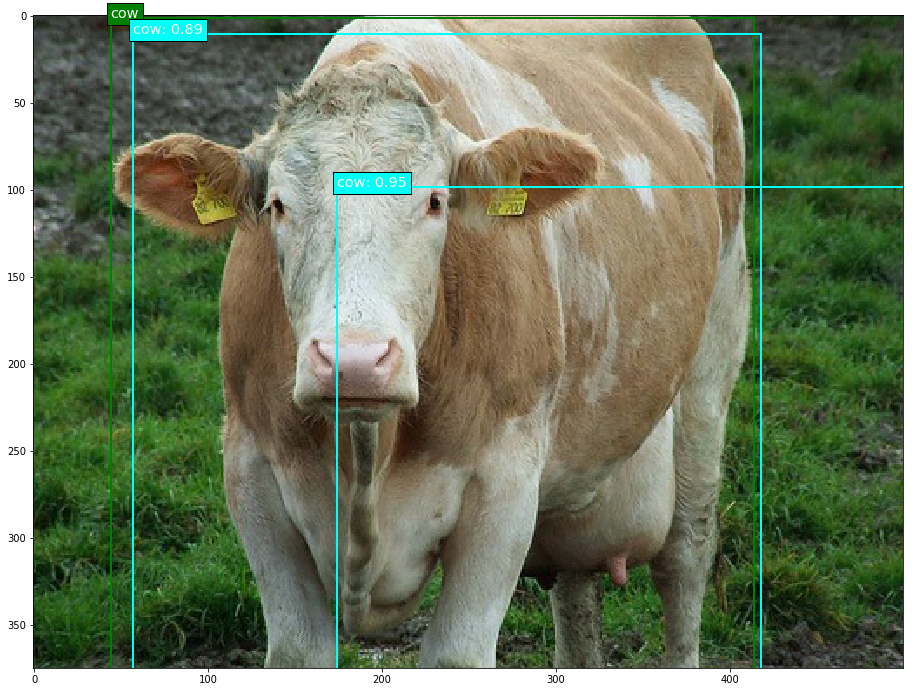

In [219]:
colors = plt.cm.hsv(np.linspace(0, 1, n_classes+1)).tolist()
classes = ['background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat',
           'chair', 'cow', 'diningtable', 'dog',
           'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

plt.figure(figsize=(20,12))
plt.imshow(batch_original_images[i])

current_axis = plt.gca()

for box in batch_original_labels[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    label = '{}'.format(classes[int(box[0])])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'green', 'alpha':1.0})

for box in y_pred_decoded_inv[i]:
    xmin = box[2]
    ymin = box[3]
    xmax = box[4]
    ymax = box[5]
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})

# INFERENCE

In [220]:
img_height = 300
img_width = 300

In [221]:
dataset = DataGenerator()

# TODO: Set the paths to the datasets here.

VOC_2007_images_dir         = './VOC2007_Test/JPEGImages/'
VOC_2007_annotations_dir    = './VOC2007_Test/Annotations/'

VOC_2007_test_image_set_filename     = './VOC2007_Test/ImageSets/Main/test.txt'
# The XML parser needs to now what object class names to look for and in which order to map them to integers.
classes = ['background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat',
           'chair', 'cow', 'diningtable', 'dog',
           'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

dataset.parse_xml(images_dirs=[VOC_2007_images_dir],
                  image_set_filenames=[VOC_2007_test_image_set_filename],
                  annotations_dirs=[VOC_2007_annotations_dir],
                  classes=classes,
                  include_classes='all',
                  exclude_truncated=False,
                  exclude_difficult=True,
                  ret=False)

convert_to_3_channels = ConvertTo3Channels()
resize = Resize(height=img_height, width=img_width)

generator = dataset.generate(batch_size=1,
                             shuffle=True,
                             transformations=[convert_to_3_channels,
                                              resize],
                             returns={'processed_images',
                                      'filenames',
                                      'inverse_transform',
                                      'original_images',
                                      'original_labels'},
                             keep_images_without_gt=False)

Processing image set 'test.txt': 100%|██████████| 4952/4952 [00:09<00:00, 550.15it/s]


In [222]:
batch_images, batch_filenames, batch_inverse_transforms, batch_original_images, batch_original_labels = next(generator)

i = 0 # Which batch item to look at

print("Image:", batch_filenames[i])
print()
print("Ground truth boxes:\n")
print(np.array(batch_original_labels[i]))


Image: ./VOC2007_Test/JPEGImages/004267.jpg

Ground truth boxes:

[[ 12  13  46 360 256]]


In [223]:
y_pred = model.predict(batch_images)

In [224]:
# 4: Decode the raw predictions in `y_pred`.

y_pred_decoded = decode_detections(y_pred,
                                   confidence_thresh=0.5,
                                   iou_threshold=0.4,
                                   top_k=200,
                                   normalize_coords=normalize_coords,
                                   img_height=img_height,
                                   img_width=img_width)

In [225]:
y_pred_decoded_inv = apply_inverse_transforms(y_pred_decoded, batch_inverse_transforms)

In [226]:

np.set_printoptions(precision=2, suppress=True, linewidth=90)
print("Predicted boxes:\n")
print('   class   conf xmin   ymin   xmax   ymax')
print(y_pred_decoded_inv[i])

Predicted boxes:

   class   conf xmin   ymin   xmax   ymax
[[ 12.     0.91 226.   131.   480.   342.  ]
 [ 12.     0.87  53.    47.   365.   262.  ]]


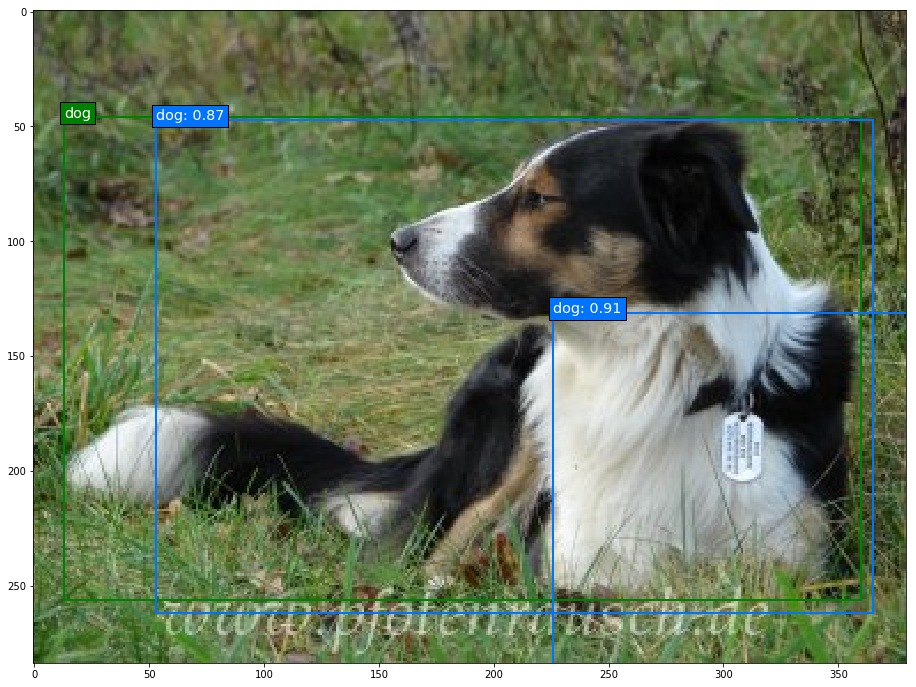

In [227]:
# 5: Draw the predicted boxes onto the image

# Set the colors for the bounding boxes
colors = plt.cm.hsv(np.linspace(0, 1, n_classes+1)).tolist()
classes = ['background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat',
           'chair', 'cow', 'diningtable', 'dog',
           'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

plt.figure(figsize=(20,12))
plt.imshow(batch_original_images[i])

current_axis = plt.gca()

for box in batch_original_labels[i]:
    xmin = box[1]
    ymin = box[2]
    xmax = box[3]
    ymax = box[4]
    label = '{}'.format(classes[int(box[0])])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='green', fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':'green', 'alpha':1.0})

for box in y_pred_decoded_inv[i]:
    xmin = box[2]
    ymin = box[3]
    xmax = box[4]
    ymax = box[5]
    color = colors[int(box[0])]
    label = '{}: {:.2f}'.format(classes[int(box[0])], box[1])
    current_axis.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color=color, fill=False, linewidth=2))  
    current_axis.text(xmin, ymin, label, size='x-large', color='white', bbox={'facecolor':color, 'alpha':1.0})


# DETECTION

In [250]:
dataset = DataGenerator()

# TODO: Set the paths to the datasets here.

VOC_2007_images_dir         = './VOC2007_Test/JPEGImages/'
VOC_2007_annotations_dir    = './VOC2007_Test/Annotations/'

VOC_2007_test_image_set_filename     = './VOC2007_Test/ImageSets/Main/test.txt'
# The XML parser needs to now what object class names to look for and in which order to map them to integers.
classes = ['background',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat',
           'chair', 'cow', 'diningtable', 'dog',
           'horse', 'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor']

dataset.parse_xml(images_dirs=[VOC_2007_images_dir],
                  image_set_filenames=[VOC_2007_test_image_set_filename],
                  annotations_dirs=[VOC_2007_annotations_dir],
                  classes=classes,
                  include_classes='all',
                  exclude_truncated=False,
                  exclude_difficult=True,
                  ret=False)

convert_to_3_channels = ConvertTo3Channels()
resize = Resize(height=img_height, width=img_width)

generator = dataset.generate(batch_size=1,
                             shuffle=False,
                             transformations=[convert_to_3_channels,
                                              resize],
                             returns={'processed_images',
                                      'filenames',
                                      'inverse_transform',
                                      'original_images',
                                      'original_labels'},
                             keep_images_without_gt=False)


for j in range(dataset.get_dataset_size()):
    
    #batch_X, batch_image_ids,batch_filenames, batch_inverse_coord_transform, batch_original_images, batch_original_labels = next(generator)
    batch_images, batch_filenames, batch_inverse_transforms, batch_original_images, batch_original_labels = next(generator)
    y_pred = model.predict(batch_images)
    y_pred_decoded = decode_detections(y_pred,
                                       confidence_thresh=0.5,
                                   iou_threshold=0.4,
                                   top_k=200,
                                   normalize_coords=normalize_coords,
                                   img_height=img_height,
                                   img_width=img_width)


    y_pred_decoded_inv = apply_inverse_transforms(y_pred_decoded, batch_inverse_transforms)

    df=pd.DataFrame((y_pred_decoded_inv)[0])
    df=df.round(2)

    for i in range(len(df)):
        df[0][i]=classes[int(df[0][i])]
    df.to_csv('{}'.format(batch_filenames[0].split("/")[-1].replace("jpg","txt")), header=None, index=None, sep=' ', mode='a')


Processing image set 'test.txt': 100%|██████████| 4952/4952 [00:09<00:00, 522.39it/s]


/home/purva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [246]:
dataset.get_dataset_size()

4952

In [247]:
import pandas as pd

# GROUND TRUTH

In [251]:
import sys
import os
import glob
import xml.etree.ElementTree as ET
os.pardir="/home/purva/Desktop/purva/Single_shot_detector"
parent_path = os.path.abspath( os.pardir)

In [254]:
parent_path

'/home/purva/Desktop/purva/Single_shot_detector'

In [267]:
GT_PATH = os.path.join(parent_path, 'input','ground-truth')
GT_PATH

'/home/purva/Desktop/purva/Single_shot_detector/input/ground-truth'

In [262]:
os.chdir(GT_PATH)

In [263]:
if not os.path.exists("backup"):
  os.makedirs("backup")

In [264]:
xml_list = glob.glob('*.xml')
xml_list

['006364.xml',
 '004711.xml',
 '007700.xml',
 '001267.xml',
 '001219.xml',
 '009714.xml',
 '000586.xml',
 '005377.xml',
 '002408.xml',
 '008136.xml',
 '005869.xml',
 '004989.xml',
 '008902.xml',
 '000668.xml',
 '007173.xml',
 '005570.xml',
 '006092.xml',
 '003275.xml',
 '002705.xml',
 '007143.xml',
 '009727.xml',
 '006401.xml',
 '009777.xml',
 '004063.xml',
 '007787.xml',
 '006452.xml',
 '000924.xml',
 '003224.xml',
 '006774.xml',
 '006464.xml',
 '000080.xml',
 '006796.xml',
 '008893.xml',
 '001625.xml',
 '000922.xml',
 '000049.xml',
 '004833.xml',
 '003448.xml',
 '004071.xml',
 '004854.xml',
 '006063.xml',
 '007199.xml',
 '004202.xml',
 '007966.xml',
 '005670.xml',
 '007832.xml',
 '006770.xml',
 '007057.xml',
 '004661.xml',
 '002861.xml',
 '002857.xml',
 '001080.xml',
 '004431.xml',
 '000594.xml',
 '009387.xml',
 '003246.xml',
 '001575.xml',
 '004130.xml',
 '008941.xml',
 '004964.xml',
 '002487.xml',
 '001347.xml',
 '005069.xml',
 '000058.xml',
 '008651.xml',
 '000018.xml',
 '005872.x

In [265]:
if len(xml_list) == 0:
  print("Error: no .xml files found in ground-truth")
  sys.exit()

In [266]:
for tmp_file in xml_list:
  #print(tmp_file)
  # 1. create new file (VOC format)
  with open(tmp_file.replace(".xml", ".txt"), "a") as new_f:
    root = ET.parse(tmp_file).getroot()
    for obj in root.findall('object'):
      obj_name = obj.find('name').text
      bndbox = obj.find('bndbox')
      left = bndbox.find('xmin').text
      top = bndbox.find('ymin').text
      right = bndbox.find('xmax').text
      bottom = bndbox.find('ymax').text
      new_f.write("%s %s %s %s %s\n" % (obj_name, left, top, right, bottom))
  # 2. move old file (xml format) to backup
  os.rename(tmp_file, os.path.join("backup", tmp_file))
print("Conversion completed!")

Conversion completed!


# Evaluation code

In [271]:
cd '/home/purva/Desktop/purva/Single_shot_detector'

/home/purva/Desktop/purva/Single_shot_detector


In [272]:
import glob
import json
import os
import shutil
import operator
import sys
import argparse
import math

import numpy as np

MINOVERLAP = 0.5 # default value (defined in the PASCAL VOC2012 challenge)
ignore = []

specific_iou_flagged = False
set_class_iou= None
no_animation = True
show_animation=True
import matplotlib.pyplot as plt
draw_plot = True
no_plot = False

In [273]:
GT_PATH = os.path.join(os.getcwd(), 'input', 'ground-truth')
DR_PATH = os.path.join(os.getcwd(), 'input', 'detection-results')
IMG_PATH = '/home/purva/Desktop/purva/Single_shot_detector/VOC2007_Test/JPEGImages/'

In [274]:
GT_PATH

'/home/purva/Desktop/purva/Single_shot_detector/input/ground-truth'

In [275]:
DR_PATH

'/home/purva/Desktop/purva/Single_shot_detector/input/detection-results'

In [276]:
cd /home/purva/Desktop/purva/Single_shot_detector/input/detection-results

/home/purva/Desktop/purva/Single_shot_detector/input/detection-results


In [287]:
path="/home/purva/Desktop/purva/Single_shot_detector/input/detection-results/"
list_=[]
import os
for file in os.listdir(path):
    if file.endswith(".txt"):
        list_.append(os.path.join(path, file))
len(list_)

3597

In [288]:
a=0
for file in list_:
    fh = open(file, "r")
    lines = fh.readlines()
    fh.close()
    if lines==[]:
        a=a+1
        os.remove(file)
        
        
print(a)

0


In [289]:
os.chdir(GT_PATH)
gt_files = glob.glob('*.txt')
if len(gt_files) == 0:
    print("Error: no .txt files found in", GT_PATH)
    sys.exit()
os.chdir(DR_PATH)
dr_files = glob.glob('*.txt')
if len(dr_files) == 0:
    print("Error: no .txt files found in", DR_PATH)
    sys.exit()

gt_files = set(gt_files)
dr_files = set(dr_files)
print('total ground-truth files:', len(gt_files))
print('total detection-results files:', len(dr_files))
print()

backup_folder = 'backup_no_matches_found'

total ground-truth files: 3597
total detection-results files: 3597



In [290]:
gt_backup = gt_files - dr_files
dr_backup = dr_files - gt_files

def backup(src_folder, backup_files, backup_folder):
    # non-intersection files (txt format) will be moved to a backup folder
    if not backup_files:
        print('No backup required for', src_folder)
        return
    os.chdir(src_folder)
    ## create the backup dir if it doesn't exist already
    if not os.path.exists(backup_folder):
        os.makedirs(backup_folder)
    for file in backup_files:
        os.rename(file, backup_folder + '/' + file)
    
backup(GT_PATH, gt_backup, backup_folder)
backup(DR_PATH, dr_backup, backup_folder)
if gt_backup:
    print('total ground-truth backup files:', len(gt_backup))
if dr_backup:
    print('total detection-results backup files:', len(dr_backup))

intersection = gt_files & dr_files
print('total intersected files:', len(intersection))
print("Intersection completed!")

No backup required for /home/purva/Desktop/purva/Single_shot_detector/input/ground-truth
No backup required for /home/purva/Desktop/purva/Single_shot_detector/input/detection-results
total intersected files: 3597
Intersection completed!


In [291]:
gt_backup = gt_files - dr_files
dr_backup = dr_files - gt_files

def backup(src_folder, backup_files, backup_folder):
    # non-intersection files (txt format) will be moved to a backup folder
    if not backup_files:
        print('No backup required for', src_folder)
        return
    os.chdir(src_folder)
    ## create the backup dir if it doesn't exist already
    if not os.path.exists(backup_folder):
        os.makedirs(backup_folder)
    for file in backup_files:
        os.rename(file, backup_folder + '/' + file)
    
backup(GT_PATH, gt_backup, backup_folder)
backup(DR_PATH, dr_backup, backup_folder)
if gt_backup:
    print('total ground-truth backup files:', len(gt_backup))
if dr_backup:
    print('total detection-results backup files:', len(dr_backup))

intersection = gt_files & dr_files
print('total intersected files:', len(intersection))
print("Intersection completed!")

No backup required for /home/purva/Desktop/purva/Single_shot_detector/input/ground-truth
No backup required for /home/purva/Desktop/purva/Single_shot_detector/input/detection-results
total intersected files: 3597
Intersection completed!


In [292]:
cd '/home/purva/Desktop/purva/Single_shot_detector'


/home/purva/Desktop/purva/Single_shot_detector


In [293]:
GT_PATH = os.path.join(os.getcwd(), 'input', 'ground-truth')
DR_PATH = os.path.join(os.getcwd(), 'input', 'detection-results')
IMG_PATH = '/home/purva/Desktop/purva/Single_shot_detector/VOC2007_Test/JPEGImages/'

In [294]:
no_animation = True
show_animation=True
import matplotlib.pyplot as plt
draw_plot = True
no_plot = False

In [295]:
def log_average_miss_rate(precision, fp_cumsum, num_images):
    
    if precision.size == 0:
        lamr = 0
        mr = 1
        fppi = 0
        return lamr, mr, fppi

    fppi = fp_cumsum / float(num_images)
    mr = (1 - precision)

    fppi_tmp = np.insert(fppi, 0, -1.0)
    mr_tmp = np.insert(mr, 0, 1.0)

    # Use 9 evenly spaced reference points in log-space
    ref = np.logspace(-2.0, 0.0, num = 9)
    for i, ref_i in enumerate(ref):
        # np.where() will always find at least 1 index, since min(ref) = 0.01 and min(fppi_tmp) = -1.0
        j = np.where(fppi_tmp <= ref_i)[-1][-1]
        ref[i] = mr_tmp[j]

    # log(0) is undefined, so we use the np.maximum(1e-10, ref)
    lamr = math.exp(np.mean(np.log(np.maximum(1e-10, ref))))

    return lamr, mr, fppi


In [296]:
def is_float_between_0_and_1(value):
    try:
        val = float(value)
        if val > 0.0 and val < 1.0:
            return True
        else:
            return False
    except ValueError:
        return False

In [297]:
def error(msg):
    print(msg)
    sys.exit(0)

In [298]:
def voc_ap(rec, prec):
    """
    --- Official matlab code VOC2012---
    mrec=[0 ; rec ; 1];
    mpre=[0 ; prec ; 0];
    for i=numel(mpre)-1:-1:1
            mpre(i)=max(mpre(i),mpre(i+1));
    end
    i=find(mrec(2:end)~=mrec(1:end-1))+1;
    ap=sum((mrec(i)-mrec(i-1)).*mpre(i));
    """
    rec.insert(0, 0.0) # insert 0.0 at begining of list
    rec.append(1.0) # insert 1.0 at end of list
    mrec = rec[:]
    prec.insert(0, 0.0) # insert 0.0 at begining of list
    prec.append(0.0) # insert 0.0 at end of list
    mpre = prec[:]
    """
     This part makes the precision monotonically decreasing
        (goes from the end to the beginning)
        matlab: for i=numel(mpre)-1:-1:1
                    mpre(i)=max(mpre(i),mpre(i+1));
    """
    # matlab indexes start in 1 but python in 0, so I have to do:
    #     range(start=(len(mpre) - 2), end=0, step=-1)
    # also the python function range excludes the end, resulting in:
    #     range(start=(len(mpre) - 2), end=-1, step=-1)
    for i in range(len(mpre)-2, -1, -1):
        mpre[i] = max(mpre[i], mpre[i+1])
    """
     This part creates a list of indexes where the recall changes
        matlab: i=find(mrec(2:end)~=mrec(1:end-1))+1;
    """
    i_list = []
    for i in range(1, len(mrec)):
        if mrec[i] != mrec[i-1]:
            i_list.append(i) # if it was matlab would be i + 1
    """
     The Average Precision (AP) is the area under the curve
        (numerical integration)
        matlab: ap=sum((mrec(i)-mrec(i-1)).*mpre(i));
    """
    ap = 0.0
    for i in i_list:
        ap += ((mrec[i]-mrec[i-1])*mpre[i])
    return ap, mrec, mpre


In [299]:
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content]
    return content

In [300]:
def adjust_axes(r, t, fig, axes):
    # get text width for re-scaling
    bb = t.get_window_extent(renderer=r)
    text_width_inches = bb.width / fig.dpi
    # get axis width in inches
    current_fig_width = fig.get_figwidth()
    new_fig_width = current_fig_width + text_width_inches
    propotion = new_fig_width / current_fig_width
    # get axis limit
    x_lim = axes.get_xlim()
    axes.set_xlim([x_lim[0], x_lim[1]*propotion])


In [301]:
def draw_text_in_image(img, text, pos, color, line_width):
    font = cv2.FONT_HERSHEY_PLAIN
    fontScale = 1
    lineType = 1
    bottomLeftCornerOfText = pos
    cv2.putText(img, text,
            bottomLeftCornerOfText,
            font,
            fontScale,
            color,
            lineType)
    text_width, _ = cv2.getTextSize(text, font, fontScale, lineType)[0]
    return img, (line_width + text_width)

In [302]:
def draw_plot_func(dictionary, n_classes, window_title, plot_title, x_label, output_path, to_show, plot_color, true_p_bar):
    # sort the dictionary by decreasing value, into a list of tuples
    sorted_dic_by_value = sorted(dictionary.items(), key=operator.itemgetter(1))
    # unpacking the list of tuples into two lists
    sorted_keys, sorted_values = zip(*sorted_dic_by_value)
    # 
    if true_p_bar != "":
        """
         Special case to draw in:
            - green -> TP: True Positives (object detected and matches ground-truth)
            - red -> FP: False Positives (object detected but does not match ground-truth)
            - orange -> FN: False Negatives (object not detected but present in the ground-truth)
        """
        fp_sorted = []
        tp_sorted = []
        for key in sorted_keys:
            fp_sorted.append(dictionary[key] - true_p_bar[key])
            tp_sorted.append(true_p_bar[key])
        plt.barh(range(n_classes), fp_sorted, align='center', color='crimson', label='False Positive')
        plt.barh(range(n_classes), tp_sorted, align='center', color='forestgreen', label='True Positive', left=fp_sorted)
        # add legend
        plt.legend(loc='lower right')
        """
         Write number on side of bar
        """
        fig = plt.gcf() # gcf - get current figure
        axes = plt.gca()
        r = fig.canvas.get_renderer()
        for i, val in enumerate(sorted_values):
            fp_val = fp_sorted[i]
            tp_val = tp_sorted[i]
            fp_str_val = " " + str(fp_val)
            tp_str_val = fp_str_val + " " + str(tp_val)
            # trick to paint multicolor with offset:
            # first paint everything and then repaint the first number
            t = plt.text(val, i, tp_str_val, color='forestgreen', va='center', fontweight='bold')
            plt.text(val, i, fp_str_val, color='crimson', va='center', fontweight='bold')
            if i == (len(sorted_values)-1): # largest bar
                adjust_axes(r, t, fig, axes)
    else:
        plt.barh(range(n_classes), sorted_values, color=plot_color)
        """
         Write number on side of bar
        """
        fig = plt.gcf() # gcf - get current figure
        axes = plt.gca()
        r = fig.canvas.get_renderer()
        for i, val in enumerate(sorted_values):
            str_val = " " + str(val) # add a space before
            if val < 1.0:
                str_val = " {0:.2f}".format(val)
            t = plt.text(val, i, str_val, color=plot_color, va='center', fontweight='bold')
            # re-set axes to show number inside the figure
            if i == (len(sorted_values)-1): # largest bar
                adjust_axes(r, t, fig, axes)
    # set window title
    fig.canvas.set_window_title(window_title)
    # write classes in y axis
    tick_font_size = 12
    plt.yticks(range(n_classes), sorted_keys, fontsize=tick_font_size)
    """
     Re-scale height accordingly
    """
    init_height = fig.get_figheight()
    # comput the matrix height in points and inches
    dpi = fig.dpi
    height_pt = n_classes * (tick_font_size * 1.4) # 1.4 (some spacing)
    height_in = height_pt / dpi
    # compute the required figure height 
    top_margin = 0.15 # in percentage of the figure height
    bottom_margin = 0.05 # in percentage of the figure height
    figure_height = height_in / (1 - top_margin - bottom_margin)
    # set new height
    if figure_height > init_height:
        fig.set_figheight(figure_height)

    # set plot title
    plt.title(plot_title, fontsize=14)
    # set axis titles
    # plt.xlabel('classes')
    plt.xlabel(x_label, fontsize='large')
    # adjust size of window
    fig.tight_layout()
    # save the plot
    fig.savefig(output_path)
    # show image
    if to_show:
        plt.show()
    # close the plot
    plt.close()


In [303]:
TEMP_FILES_PATH = ".temp_files"
if not os.path.exists(TEMP_FILES_PATH): # if it doesn't exist already
    os.makedirs(TEMP_FILES_PATH)
results_files_path = "results"
if os.path.exists(results_files_path): # if it exist already
    # reset the results directory
    shutil.rmtree(results_files_path)

In [304]:
os.path.abspath(TEMP_FILES_PATH)

'/home/purva/Desktop/purva/Single_shot_detector/.temp_files'

In [305]:
os.makedirs(results_files_path)
if draw_plot:
    os.makedirs(os.path.join(results_files_path, "classes"))
if show_animation:
    os.makedirs(os.path.join(results_files_path, "images", "detections_one_by_one"))

In [306]:
ground_truth_files_list = glob.glob(GT_PATH + '/*.txt')
if len(ground_truth_files_list) == 0:
    error("Error: No ground-truth files found!")
ground_truth_files_list.sort()
# dictionary with counter per class
gt_counter_per_class = {}
counter_images_per_class = {}

In [307]:
txt_file=ground_truth_files_list[0]
file_id = txt_file.split(".txt", 1)[0]
file_id = os.path.basename(os.path.normpath(file_id))
temp_path = os.path.join(DR_PATH, (file_id + ".txt"))

lines_list = file_lines_to_list(txt_file)
lines_list

['dog 48 240 195 371', 'person 8 12 352 498']

In [308]:
for txt_file in ground_truth_files_list:
    #print(txt_file)
    file_id = txt_file.split(".txt", 1)[0]
    file_id = os.path.basename(os.path.normpath(file_id))
    # check if there is a correspondent detection-results file
    temp_path = os.path.join(DR_PATH, (file_id + ".txt"))
    if not os.path.exists(temp_path):
        error_msg = "Error. File not found: {}\n".format(temp_path)
        error_msg += "(You can avoid this error message by running extra/intersect-gt-and-dr.py)"
        error(error_msg)
    lines_list = file_lines_to_list(txt_file)
    # create ground-truth dictionary
    bounding_boxes = []
    is_difficult = False
    already_seen_classes = []
    for line in lines_list:
        try:
            if "difficult" in line:
                    class_name, left, top, right, bottom, _difficult = line.split()
                    is_difficult = True
            else:
                    class_name, left, top, right, bottom = line.split()
        except ValueError:
            error_msg = "Error: File " + txt_file + " in the wrong format.\n"
            error_msg += " Expected: <class_name> <left> <top> <right> <bottom> ['difficult']\n"
            error_msg += " Received: " + line
            error_msg += "\n\nIf you have a <class_name> with spaces between words you should remove them\n"
            error_msg += "by running the script \"remove_space.py\" or \"rename_class.py\" in the \"extra/\" folder."
            error(error_msg)
        # check if class is in the ignore list, if yes skip
        if class_name in ignore:
            continue
        bbox = left + " " + top + " " + right + " " +bottom
        if is_difficult:
                bounding_boxes.append({"class_name":class_name, "bbox":bbox, "used":False, "difficult":True})
                is_difficult = False
        else:
                bounding_boxes.append({"class_name":class_name, "bbox":bbox, "used":False})
                # count that object
                if class_name in gt_counter_per_class:
                    gt_counter_per_class[class_name] += 1
                else:
                    # if class didn't exist yet
                    gt_counter_per_class[class_name] = 1

                if class_name not in already_seen_classes:
                    if class_name in counter_images_per_class:
                        counter_images_per_class[class_name] += 1
                    else:
                        # if class didn't exist yet
                        counter_images_per_class[class_name] = 1
                    already_seen_classes.append(class_name)


    # dump bounding_boxes into a ".json" file
    with open(TEMP_FILES_PATH + "/" + file_id + "_ground_truth.json", 'w') as outfile:
        json.dump(bounding_boxes, outfile)
gt_classes = list(gt_counter_per_class.keys())
gt_classes = sorted(gt_classes)
n_classes = len(gt_classes)

In [309]:
dr_files_list = glob.glob(DR_PATH + '/*.txt')
dr_files_list.sort()
for class_index, class_name in enumerate(gt_classes):
    bounding_boxes = []
    for txt_file in dr_files_list:
        #print(txt_file)
        # the first time it checks if all the corresponding ground-truth files exist
        file_id = txt_file.split(".txt",1)[0]
        file_id = os.path.basename(os.path.normpath(file_id))
        temp_path = os.path.join(GT_PATH, (file_id + ".txt"))
        if class_index == 0:
            if not os.path.exists(temp_path):
                error_msg = "Error. File not found: {}\n".format(temp_path)
                error_msg += "(You can avoid this error message by running extra/intersect-gt-and-dr.py)"
                error(error_msg)
        lines = file_lines_to_list(txt_file)
        for line in lines:
            try:
                tmp_class_name, confidence, left, top, right, bottom = line.split()
            except ValueError:
                error_msg = "Error: File " + txt_file + " in the wrong format.\n"
                error_msg += " Expected: <class_name> <confidence> <left> <top> <right> <bottom>\n"
                error_msg += " Received: " + line
                error(error_msg)
            if tmp_class_name == class_name:
                #print("match")
                bbox = left + " " + top + " " + right + " " +bottom
                bounding_boxes.append({"confidence":confidence, "file_id":file_id, "bbox":bbox})
                #print(bounding_boxes)
    # sort detection-results by decreasing confidence
    bounding_boxes.sort(key=lambda x:float(x['confidence']), reverse=True)
    with open(TEMP_FILES_PATH + "/" + class_name + "_dr.json", 'w') as outfile:
        json.dump(bounding_boxes, outfile)


In [310]:

txt_file=dr_files_list[1]
file_id = txt_file.split(".txt",1)[0]
file_id = os.path.basename(os.path.normpath(file_id))
temp_path = os.path.join(GT_PATH, (file_id + ".txt"))
lines = file_lines_to_list(txt_file)
for line in lines:
    tmp_class_name, confidence, left, top, right, bottom = line.split()
tmp_class_name 


'car'

5.97% = aeroplane AP 
10.24% = bicycle AP 
7.37% = bird AP 
3.56% = boat AP 
0.17% = bottle AP 
11.80% = bus AP 
6.66% = car AP 
17.55% = cat AP 
0.05% = chair AP 
5.82% = cow AP 
17.10% = diningtable AP 
9.98% = dog AP 
6.92% = horse AP 
8.84% = motorbike AP 
2.09% = person AP 
2.11% = pottedplant AP 
0.95% = sheep AP 
11.16% = sofa AP 
11.95% = train AP 
1.70% = tvmonitor AP 
mAP = 7.10%


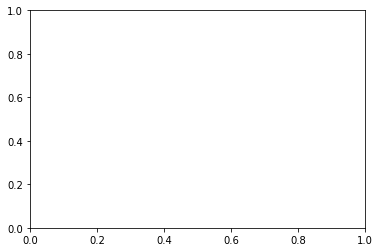

In [311]:
import cv2
sum_AP = 0.0
ap_dictionary = {}
lamr_dictionary = {}
# open file to store the results
with open(results_files_path + "/results.txt", 'w') as results_file:
    results_file.write("# AP and precision/recall per class\n")
    count_true_positives = {}
    for class_index, class_name in enumerate(gt_classes):
        count_true_positives[class_name] = 0
        """
         Load detection-results of that class
        """
        dr_file = TEMP_FILES_PATH + "/" + class_name + "_dr.json"
        dr_data = json.load(open(dr_file))

        """
         Assign detection-results to ground-truth objects
        """
        nd = len(dr_data)
        tp = [0] * nd # creates an array of zeros of size nd
        fp = [0] * nd
        for idx, detection in enumerate(dr_data):
            file_id = detection["file_id"]
            if show_animation:
                # find ground truth image
                ground_truth_img = glob.glob1(IMG_PATH, file_id + ".*")
                #tifCounter = len(glob.glob1(myPath,"*.tif"))
                if len(ground_truth_img) == 0:
                    error("Error. Image not found with id: " + file_id)
                elif len(ground_truth_img) > 1:
                    error("Error. Multiple image with id: " + file_id)
                else: # found image
                    #print(IMG_PATH + "/" + ground_truth_img[0])
                    # Load image
                    img = cv2.imread(IMG_PATH + "/" + ground_truth_img[0])
                    # load image with draws of multiple detections
                    img_cumulative_path = results_files_path + "/images/" + ground_truth_img[0]
                    if os.path.isfile(img_cumulative_path):
                        img_cumulative = cv2.imread(img_cumulative_path)
                    else:
                        img_cumulative = img.copy()
                    # Add bottom border to image
                    bottom_border = 60
                    BLACK = [0, 0, 0]
                    img = cv2.copyMakeBorder(img, 0, bottom_border, 0, 0, cv2.BORDER_CONSTANT, value=BLACK)
            # assign detection-results to ground truth object if any
            # open ground-truth with that file_id
            gt_file = TEMP_FILES_PATH + "/" + file_id + "_ground_truth.json"
            ground_truth_data = json.load(open(gt_file))
            ovmax = -1
            gt_match = -1
            # load detected object bounding-box
            bb = [ float(x) for x in detection["bbox"].split() ]
            for obj in ground_truth_data:
                # look for a class_name match
                if obj["class_name"] == class_name:
                    bbgt = [ float(x) for x in obj["bbox"].split() ]
                    bi = [max(bb[0],bbgt[0]), max(bb[1],bbgt[1]), min(bb[2],bbgt[2]), min(bb[3],bbgt[3])]
                    iw = bi[2] - bi[0] + 1
                    ih = bi[3] - bi[1] + 1
                    if iw > 0 and ih > 0:
                        # compute overlap (IoU) = area of intersection / area of union
                        ua = (bb[2] - bb[0] + 1) * (bb[3] - bb[1] + 1) + (bbgt[2] - bbgt[0]
                                        + 1) * (bbgt[3] - bbgt[1] + 1) - iw * ih
                        ov = iw * ih / ua
                        if ov > ovmax:
                            ovmax = ov
                            gt_match = obj

            # assign detection as true positive/don't care/false positive
            if show_animation:
                status = "NO MATCH FOUND!" # status is only used in the animation
            # set minimum overlap
            min_overlap = MINOVERLAP
            if specific_iou_flagged:
                if class_name in specific_iou_classes:
                    index = specific_iou_classes.index(class_name)
                    min_overlap = float(iou_list[index])
            if ovmax >= min_overlap:
                if "difficult" not in gt_match:
                        if not bool(gt_match["used"]):
                            # true positive
                            tp[idx] = 1
                            gt_match["used"] = True
                            count_true_positives[class_name] += 1
                            # update the ".json" file
                            with open(gt_file, 'w') as f:
                                    f.write(json.dumps(ground_truth_data))
                            if show_animation:
                                status = "MATCH!"
                        else:
                            # false positive (multiple detection)
                            fp[idx] = 1
                            if show_animation:
                                status = "REPEATED MATCH!"
            else:
                # false positive
                fp[idx] = 1
                if ovmax > 0:
                    status = "INSUFFICIENT OVERLAP"

            """
             Draw image to show animation
            """
            if show_animation:
                height, widht = img.shape[:2]
                # colors (OpenCV works with BGR)
                white = (255,255,255)
                light_blue = (255,200,100)
                green = (0,255,0)
                light_red = (30,30,255)
                # 1st line
                margin = 10
                v_pos = int(height - margin - (bottom_border / 2.0))
                text = "Image: " + ground_truth_img[0] + " "
                img, line_width = draw_text_in_image(img, text, (margin, v_pos), white, 0)
                text = "Class [" + str(class_index) + "/" + str(n_classes) + "]: " + class_name + " "
                img, line_width = draw_text_in_image(img, text, (margin + line_width, v_pos), light_blue, line_width)
                if ovmax != -1:
                    color = light_red
                    if status == "INSUFFICIENT OVERLAP":
                        text = "IoU: {0:.2f}% ".format(ovmax*100) + "< {0:.2f}% ".format(min_overlap*100)
                    else:
                        text = "IoU: {0:.2f}% ".format(ovmax*100) + ">= {0:.2f}% ".format(min_overlap*100)
                        color = green
                    img, _ = draw_text_in_image(img, text, (margin + line_width, v_pos), color, line_width)
                # 2nd line
                v_pos += int(bottom_border / 2.0)
                rank_pos = str(idx+1) # rank position (idx starts at 0)
                text = "Detection #rank: " + rank_pos + " confidence: {0:.2f}% ".format(float(detection["confidence"])*100)
                img, line_width = draw_text_in_image(img, text, (margin, v_pos), white, 0)
                color = light_red
                if status == "MATCH!":
                    color = green
                text = "Result: " + status + " "
                img, line_width = draw_text_in_image(img, text, (margin + line_width, v_pos), color, line_width)

                font = cv2.FONT_HERSHEY_SIMPLEX
                if ovmax > 0: # if there is intersections between the bounding-boxes
                    bbgt = [ int(round(float(x))) for x in gt_match["bbox"].split() ]
                    cv2.rectangle(img,(bbgt[0],bbgt[1]),(bbgt[2],bbgt[3]),light_blue,2)
                    cv2.rectangle(img_cumulative,(bbgt[0],bbgt[1]),(bbgt[2],bbgt[3]),light_blue,2)
                    cv2.putText(img_cumulative, class_name, (bbgt[0],bbgt[1] - 5), font, 0.6, light_blue, 1, cv2.LINE_AA)
                bb = [int(i) for i in bb]
                cv2.rectangle(img,(bb[0],bb[1]),(bb[2],bb[3]),color,2)
                cv2.rectangle(img_cumulative,(bb[0],bb[1]),(bb[2],bb[3]),color,2)
                cv2.putText(img_cumulative, class_name, (bb[0],bb[1] - 5), font, 0.6, color, 1, cv2.LINE_AA)
                # show image
                cv2.imshow("Animation", img)
                cv2.waitKey(20) # show for 20 ms
                # save image to results
                output_img_path = results_files_path + "/images/detections_one_by_one/" + class_name + "_detection" + str(idx) + ".jpg"
                cv2.imwrite(output_img_path, img)
                # save the image with all the objects drawn to it
                cv2.imwrite(img_cumulative_path, img_cumulative)

        #print(tp)
        # compute precision/recall
        cumsum = 0
        for idx, val in enumerate(fp):
            fp[idx] += cumsum
            cumsum += val
        cumsum = 0
        for idx, val in enumerate(tp):
            tp[idx] += cumsum
            cumsum += val
        #print(tp)
        rec = tp[:]
        for idx, val in enumerate(tp):
            rec[idx] = float(tp[idx]) / gt_counter_per_class[class_name]
        #print(rec)
        prec = tp[:]
        for idx, val in enumerate(tp):
            prec[idx] = float(tp[idx]) / (fp[idx] + tp[idx])
        #print(prec)

        ap, mrec, mprec = voc_ap(rec[:], prec[:])
        sum_AP += ap
        text = "{0:.2f}%".format(ap*100) + " = " + class_name + " AP " #class_name + " AP = {0:.2f}%".format(ap*100)
        """
         Write to results.txt
        """
        rounded_prec = [ '%.2f' % elem for elem in prec ]
        rounded_rec = [ '%.2f' % elem for elem in rec ]
        results_file.write(text + "\n Precision: " + str(rounded_prec) + "\n Recall :" + str(rounded_rec) + "\n\n")
        print(text)
        ap_dictionary[class_name] = ap

        n_images = counter_images_per_class[class_name]
        lamr, mr, fppi = log_average_miss_rate(np.array(rec), np.array(fp), n_images)
        lamr_dictionary[class_name] = lamr

        """
         Draw plot
        """
        if draw_plot:
            plt.plot(rec, prec, '-o')
            # add a new penultimate point to the list (mrec[-2], 0.0)
            # since the last line segment (and respective area) do not affect the AP value
            area_under_curve_x = mrec[:-1] + [mrec[-2]] + [mrec[-1]]
            area_under_curve_y = mprec[:-1] + [0.0] + [mprec[-1]]
            plt.fill_between(area_under_curve_x, 0, area_under_curve_y, alpha=0.2, edgecolor='r')
            # set window title
            fig = plt.gcf() # gcf - get current figure
            fig.canvas.set_window_title('AP ' + class_name)
            # set plot title
            plt.title('class: ' + text)
            #plt.suptitle('This is a somewhat long figure title', fontsize=16)
            # set axis titles
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            # optional - set axes
            axes = plt.gca() # gca - get current axes
            axes.set_xlim([0.0,1.0])
            axes.set_ylim([0.0,1.05]) # .05 to give some extra space
            # Alternative option -> wait for button to be pressed
            #while not plt.waitforbuttonpress(): pass # wait for key display
            # Alternative option -> normal display
            #plt.show()
            # save the plot
            fig.savefig(results_files_path + "/classes/" + class_name + ".png")
            plt.cla() # clear axes for next plot

    if show_animation:
        cv2.destroyAllWindows()

    results_file.write("\n# mAP of all classes\n")
    mAP = sum_AP / n_classes
    text = "mAP = {0:.2f}%".format(mAP*100)
    results_file.write(text + "\n")
    print(text)


In [312]:
"""
 Count total of detection-results
"""
# iterate through all the files
det_counter_per_class = {}
for txt_file in dr_files_list:
    # get lines to list
    lines_list = file_lines_to_list(txt_file)
    for line in lines_list:
        class_name = line.split()[0]
        # check if class is in the ignore list, if yes skip
       
        # count that object
        if class_name in det_counter_per_class:
            det_counter_per_class[class_name] += 1
        else:
            # if class didn't exist yet
            det_counter_per_class[class_name] = 1
print(det_counter_per_class)
dr_classes = list(det_counter_per_class.keys())

{'person': 2351, 'car': 907, 'chair': 124, 'dog': 394, 'horse': 332, 'cat': 416, 'train': 285, 'bird': 250, 'bus': 212, 'pottedplant': 110, 'aeroplane': 226, 'motorbike': 257, 'boat': 167, 'sofa': 189, 'sheep': 67, 'diningtable': 172, 'bicycle': 164, 'cow': 77, 'tvmonitor': 109, 'bottle': 96}


In [313]:
"""
 Plot the total number of occurences of each class in the ground-truth
"""
if draw_plot:
    window_title = "ground-truth-info"
    plot_title = "ground-truth\n"
    plot_title += "(" + str(len(ground_truth_files_list)) + " files and " + str(n_classes) + " classes)"
    x_label = "Number of objects per class"
    output_path = results_files_path + "/ground-truth-info.png"
    to_show = False
    plot_color = 'forestgreen'
    draw_plot_func(
        gt_counter_per_class,
        n_classes,
        window_title,
        plot_title,
        x_label,
        output_path,
        to_show,
        plot_color,
        '',
        )


In [314]:

"""
 Write number of ground-truth objects per class to results.txt
"""
with open(results_files_path + "/results.txt", 'a') as results_file:
    results_file.write("\n# Number of ground-truth objects per class\n")
    for class_name in sorted(gt_counter_per_class):
        results_file.write(class_name + ": " + str(gt_counter_per_class[class_name]) + "\n")


In [315]:
"""
 Finish counting true positives
"""
for class_name in dr_classes:
    # if class exists in detection-result but not in ground-truth then there are no true positives in that class
    if class_name not in gt_classes:
        count_true_positives[class_name] = 0
print(count_true_positives)

{'aeroplane': 52, 'bicycle': 61, 'bird': 72, 'boat': 28, 'bottle': 7, 'bus': 63, 'car': 238, 'cat': 142, 'chair': 5, 'cow': 20, 'diningtable': 70, 'dog': 119, 'horse': 81, 'motorbike': 80, 'person': 386, 'pottedplant': 22, 'sheep': 7, 'sofa': 65, 'train': 84, 'tvmonitor': 12}


In [316]:
"""
 Plot the total number of occurences of each class in the "detection-results" folder
"""
if draw_plot:
    window_title = "detection-results-info"
    # Plot title
    plot_title = "detection-results\n"
    plot_title += "(" + str(len(dr_files_list)) + " files and "
    count_non_zero_values_in_dictionary = sum(int(x) > 0 for x in list(det_counter_per_class.values()))
    plot_title += str(count_non_zero_values_in_dictionary) + " detected classes)"
    # end Plot title
    x_label = "Number of objects per class"
    output_path = results_files_path + "/detection-results-info.png"
    to_show = False
    plot_color = 'forestgreen'
    true_p_bar = count_true_positives
    draw_plot_func(
        det_counter_per_class,
        len(det_counter_per_class),
        window_title,
        plot_title,
        x_label,
        output_path,
        to_show,
        plot_color,
        true_p_bar
        )


In [317]:
"""
 Write number of detected objects per class to results.txt
"""
with open(results_files_path + "/results.txt", 'a') as results_file:
    results_file.write("\n# Number of detected objects per class\n")
    for class_name in sorted(dr_classes):
        n_det = det_counter_per_class[class_name]
        text = class_name + ": " + str(n_det)
        text += " (tp:" + str(count_true_positives[class_name]) + ""
        text += ", fp:" + str(n_det - count_true_positives[class_name]) + ")\n"
        results_file.write(text)

In [318]:
"""
 Draw log-average miss rate plot (Show lamr of all classes in decreasing order)
"""
draw_plot=True
if draw_plot:
    window_title = "lamr"
    plot_title = "log-average miss rate"
    x_label = "log-average miss rate"
    output_path = results_files_path + "/lamr.png"
    to_show = False
    plot_color = 'royalblue'
    draw_plot_func(
        lamr_dictionary,
        n_classes,
        window_title,
        plot_title,
        x_label,
        output_path,
        to_show,
        plot_color,
        ""
        )


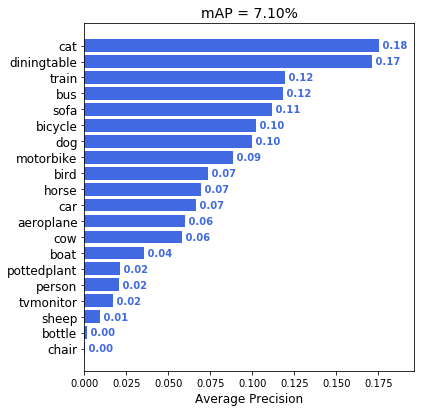

In [319]:
"""
 Draw mAP plot (Show AP's of all classes in decreasing order)
"""
if draw_plot:
    window_title = "mAP"
    plot_title = "mAP = {0:.2f}%".format(mAP*100)
    x_label = "Average Precision"
    output_path = results_files_path + "/mAP.png"
    to_show = True
    plot_color = 'royalblue'
    draw_plot_func(
        ap_dictionary,
        n_classes,
        window_title,
        plot_title,
        x_label,
        output_path,
        to_show,
        plot_color,
        ""
        )